In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import torch 
import pickle as pic
import networkx as nx
import os 
import copy
import time 

from tqdm import trange
from IPython.display import display

from cassiopeia.TreeSolver.Cassiopeia_Tree import Cassiopeia_Tree
from cassiopeia.TreeSolver.score_triplets import score_triplets
from Cassiopeia.TreeSolver.Node import Node 
from Cassiopeia.TreeSolver.lineage_solver.lineage_solver import solve_lineage_instance


import importlib
import hierarchical
importlib.reload(hierarchical)
from hierarchical import cluster_nx

/Users/sitarapersad/.local/lib/python3.7/site-packages/cassiopeia/TreeSolver/lineage_solver/ILP_solver.py:11: UserWarning: No module called gurobipy found. ILP solver will exit automatically if used.
  warnings.warn("No module called gurobipy found. ILP solver will exit automatically if used.")


In [7]:
def dict_to_dist(priors):
    arr = []
    for site in priors:
        state = priors[site]
        arr.append(list(state.values()))

    probs = torch.DoubleTensor(arr)

    return torch.distributions.Categorical(probs)

In [101]:
graphs_400 = []
priors_400 = []
priors_400_dict = []


from Cassiopeia.TreeSolver.Node import Node 
from Cassiopeia.TreeSolver.lineage_solver.lineage_solver import solve_lineage_instance

results = {'cass':[],'our':[],'base':[], 'cass_t':[],'our_t':[],'n_chars':[]}


directory = '/Users/sitarapersad/benchmark_networks/400_samples/characters/trees/' 


priors_dir = '/'.join(directory.split('/')[:-2])+'/priors/'
for f in os.listdir(directory):
    if f.endswith(".pkl"):
        true_network = nx.read_gpickle(directory+f)
        priors = nx.read_gpickle(priors_dir+f[:-4]+'_priors.pkl')
        
        priors_400_dict.append(copy.deepcopy(priors))
        new_priors = dict_to_dist(priors)
        
        G = true_network
        graphs_400.append(G)
        priors_400.append(new_priors)
        
        
        leaves = [x for x in G.nodes() if G.out_degree(x)==0]
        
        print('Tree contains {0} leaves.'.format(len(leaves)))
        
        character_matrix = pd.DataFrame([x.char_vec for x in leaves]).replace('-', np.nan).astype(np.float64)
    
        names = [x.name for x in leaves]
        character_matrix.index = names 

        
        cm = pd.DataFrame([x.char_vec for x in leaves]).astype(str)
        cm.index = names 
        cm_uniq = cm.drop_duplicates(inplace=False)
        target_nodes = cm_uniq.values.tolist()
        target_nodes = list(map(lambda x, n: Node(n,x), target_nodes, cm_uniq.index))
        
        # # Why is the score_triplets not 1??
    
        print('Baseline:', score_triplets(true_network, true_network, number_of_trials = 5000, min_size_depth = 20))

        t = time.time()
        tree, steps = cluster_nx(character_matrix, new_priors)
        our_time = time.time()-t
        
        our_tree = Cassiopeia_Tree(method ='simulated', network = tree)
        our_score = score_triplets(true_network, tree, number_of_trials = 5000, min_size_depth = 20)
        print('Our Score:', our_score)
        print('Our Time: ', hier_time)
           
        
        t = time.time()
        reconstructed_network_greedy = solve_lineage_instance(target_nodes, 
                                                              method="greedy", 
                                                              prior_probabilities=priors)
        cass_time = time.time()-t
        cass_tree = reconstructed_network_greedy[0]
        cass_score = score_triplets(true_network, cass_tree, number_of_trials = 5000, min_size_depth = 20)
        print('Cassiopeia Score: ', cass_score)
        print('Cassiopeia Time: ', cass_time)
        
        
        results['cass'].append(cass_score)
        results['our'].append(our_score)
        results['base'].append(base_score)
        results['cass_t'].append(cass_time)
        results['our_t'].append(our_time)
        results['n_chars'].append(cm.shape[1])
        


Tree contains 1073 leaves.
Baseline: 0.8776550401680577
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1071 [00:00<?, ?it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:18<00:00, 57.57it/s]


Our Score: 0.31614930449015605
Our Time:  94.52921199798584
Cassiopeia Score:  0.6076932491002033
Cassiopeia Time:  3.5845749378204346
Tree contains 1067 leaves.
Baseline: 0.473545771932674
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.64it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.84it/s]


Our Score: 0.1510605992505155
Our Time:  94.52921199798584
Cassiopeia Score:  0.7902529264999667
Cassiopeia Time:  1.3597419261932373
Tree contains 1065 leaves.
Baseline: 0.8586508803234623
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1063 [00:00<?, ?it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:18<00:00, 56.75it/s]


Our Score: 0.3203563558767817
Our Time:  94.52921199798584
Cassiopeia Score:  0.9467187894317939
Cassiopeia Time:  4.178045988082886
Tree contains 1060 leaves.
Baseline: 0.6116607558813285
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.75it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 76.55it/s]


Our Score: 0.24969270887020337
Our Time:  94.52921199798584
Cassiopeia Score:  0.8675951192184065
Cassiopeia Time:  1.4196128845214844
Tree contains 1056 leaves.
Baseline: 0.8618700084917478
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:44, 23.66it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:15<00:00, 67.23it/s] 


Our Score: 0.3347614495774005
Our Time:  94.52921199798584
Cassiopeia Score:  0.9571860849662741
Cassiopeia Time:  3.0840158462524414
Tree contains 1068 leaves.
Baseline: 0.7925267659043307
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.40it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:17<00:00, 59.85it/s] 


Our Score: 0.3372291003736459
Our Time:  94.52921199798584
Cassiopeia Score:  0.9503731014273381
Cassiopeia Time:  2.877553939819336
Tree contains 1060 leaves.
Baseline: 0.6888173748188374
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 29.26it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:12<00:00, 84.91it/s]


Our Score: 0.29399105574031265
Our Time:  94.52921199798584
Cassiopeia Score:  0.9118718156116294
Cassiopeia Time:  0.8032698631286621
Tree contains 1064 leaves.
Baseline: 0.7054656534321606
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:32, 32.16it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:11<00:00, 93.40it/s]


Our Score: 0.25923087154657004
Our Time:  94.52921199798584
Cassiopeia Score:  0.8353755836076817
Cassiopeia Time:  0.8493921756744385
Tree contains 1061 leaves.
Baseline: 0.2889908256880734
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:35, 29.90it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:12<00:00, 86.30it/s]


Our Score: 0.16096220482260407
Our Time:  94.52921199798584
Cassiopeia Score:  0.8081802721088436
Cassiopeia Time:  1.043978214263916
Tree contains 1061 leaves.
Baseline: 0.7498489924369321
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1059 [00:00<00:32, 31.98it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:11<00:00, 90.87it/s] 


Our Score: 0.3298549621100785
Our Time:  94.52921199798584
Cassiopeia Score:  0.9182506255041432
Cassiopeia Time:  0.8963139057159424
Tree contains 1063 leaves.
Baseline: 0.8277368693828508
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 24.99it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 68.00it/s]


Our Score: 0.33249643945948015
Our Time:  94.52921199798584
Cassiopeia Score:  0.9758078383937299
Cassiopeia Time:  3.1028451919555664
Tree contains 1055 leaves.
Baseline: 0.7076242578633424
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:35, 29.27it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:12<00:00, 81.78it/s] 


Our Score: 0.2375447694597633
Our Time:  94.52921199798584
Cassiopeia Score:  0.9000437819046558
Cassiopeia Time:  1.6058611869812012
Tree contains 1063 leaves.
Baseline: 0.7708339269305649
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1061 [00:00<?, ?it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:16<00:00, 65.16it/s] 


Our Score: 0.31248953623054054
Our Time:  94.52921199798584
Cassiopeia Score:  0.91589104011567
Cassiopeia Time:  2.69248104095459
Tree contains 1059 leaves.
Baseline: 0.8479515271317006
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1057 [00:00<?, ?it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 66.13it/s]


Our Score: 0.2933338017375718
Our Time:  94.52921199798584
Cassiopeia Score:  0.938826005937162
Cassiopeia Time:  3.72050404548645
Tree contains 1057 leaves.
Baseline: 0.8053205489753713
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1055 [00:00<?, ?it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:15<00:00, 66.41it/s]


Our Score: 0.2513683917725967
Our Time:  94.52921199798584
Cassiopeia Score:  0.8945737603690397
Cassiopeia Time:  3.8247857093811035
Tree contains 1068 leaves.
Baseline: 0.675489911124807
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:38, 27.58it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 75.81it/s]


Our Score: 0.25688353535597147
Our Time:  94.52921199798584
Cassiopeia Score:  0.8854351304569464
Cassiopeia Time:  1.3815200328826904
Tree contains 1065 leaves.
Baseline: 0.9020352264059358
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1063 [00:00<?, ?it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 70.09it/s] 


Our Score: 0.27262370692463805
Our Time:  94.52921199798584
Cassiopeia Score:  0.9755385295223826
Cassiopeia Time:  3.4325671195983887
Tree contains 1067 leaves.
Baseline: 0.4498300816585986
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.45it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.78it/s]


Our Score: 0.1543645034211072
Our Time:  94.52921199798584
Cassiopeia Score:  0.8768875395338085
Cassiopeia Time:  1.342585802078247
Tree contains 1064 leaves.
Baseline: 0.8056794658736406
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:42, 24.99it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:18<00:00, 58.17it/s]


Our Score: 0.30292178745538173
Our Time:  94.52921199798584
Cassiopeia Score:  0.9457353589437582
Cassiopeia Time:  4.378591775894165
Tree contains 1058 leaves.
Baseline: 0.8497995583779806
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:45, 23.39it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:17<00:00, 60.89it/s] 


Our Score: 0.33045105642671796
Our Time:  94.52921199798584
Cassiopeia Score:  0.9673483387456474
Cassiopeia Time:  4.142236232757568
Tree contains 1056 leaves.
Baseline: 0.17818950075498
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1054 [00:00<00:29, 35.09it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:11<00:00, 94.31it/s]


Our Score: 0.5177598863367274
Our Time:  94.52921199798584
Cassiopeia Score:  0.9326627218934911
Cassiopeia Time:  0.6599991321563721
Tree contains 1067 leaves.
Baseline: 0.8052023844261953
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:45, 23.45it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 67.82it/s] 


Our Score: 0.31204339131465003
Our Time:  94.52921199798584
Cassiopeia Score:  0.9057363134462957
Cassiopeia Time:  2.8827662467956543
Tree contains 1067 leaves.
Baseline: 0.9125
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:45, 23.53it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 67.20it/s]


Our Score: 0.3093616848288364
Our Time:  94.52921199798584
Cassiopeia Score:  0.9163687623026997
Cassiopeia Time:  2.8291149139404297
Tree contains 1064 leaves.
Baseline: 0.6892670984106303
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:36, 29.17it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:13<00:00, 79.75it/s]


Our Score: 0.26414554798345785
Our Time:  94.52921199798584
Cassiopeia Score:  0.7845674920312146
Cassiopeia Time:  1.638904094696045
Tree contains 1065 leaves.
Baseline: 0.4158731640527757
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1063 [00:00<00:31, 34.00it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:12<00:00, 88.49it/s]


Our Score: 0.18925123616670592
Our Time:  94.52921199798584
Cassiopeia Score:  0.7937005778588808
Cassiopeia Time:  0.9386041164398193
Tree contains 1060 leaves.
Baseline: 0.6700405039097214
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:32, 32.27it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:11<00:00, 89.00it/s]


Our Score: 0.24237474073185786
Our Time:  94.52921199798584
Cassiopeia Score:  0.8679193007770492
Cassiopeia Time:  0.931854248046875
Tree contains 1064 leaves.
Baseline: 0.8416532822861922
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:43, 24.54it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 67.55it/s]


Our Score: 0.27362851366455204
Our Time:  94.52921199798584
Cassiopeia Score:  0.9834136704250435
Cassiopeia Time:  2.869351863861084
Tree contains 1056 leaves.
Baseline: 0.630330398976732
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1054 [00:00<00:35, 30.00it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 80.53it/s]


Our Score: 0.3117214932677036
Our Time:  94.52921199798584
Cassiopeia Score:  0.9096723813122232
Cassiopeia Time:  1.402198076248169
Tree contains 1068 leaves.
Baseline: 0.8300232020488405
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:44, 24.13it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 66.99it/s] 


Our Score: 0.2863838908252869
Our Time:  94.52921199798584
Cassiopeia Score:  0.9365568413371153
Cassiopeia Time:  2.881730079650879
Tree contains 1062 leaves.
Baseline: 0.20965569587786445
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:28, 37.27it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:09<00:00, 111.32it/s]


Our Score: 0.38478509458821186
Our Time:  94.52921199798584
Cassiopeia Score:  0.7816516472152459
Cassiopeia Time:  0.4844789505004883
Tree contains 1057 leaves.
Baseline: 0.7319519522869454
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1055 [00:00<?, ?it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:16<00:00, 62.55it/s] 


Our Score: 0.312079328328539
Our Time:  94.52921199798584
Cassiopeia Score:  0.9298796066538002
Cassiopeia Time:  3.606934070587158
Tree contains 1058 leaves.
Baseline: 0.5466255291786093
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:35, 29.74it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 79.89it/s]


Our Score: 0.19996417604912997
Our Time:  94.52921199798584
Cassiopeia Score:  0.7436464607328613
Cassiopeia Time:  1.4616472721099854
Tree contains 1070 leaves.
Baseline: 0.9272302904564316
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1068 [00:00<?, ?it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:17<00:00, 60.82it/s]


Our Score: 0.33203579592663307
Our Time:  94.52921199798584
Cassiopeia Score:  0.9315552030899668
Cassiopeia Time:  4.149856090545654
Tree contains 1066 leaves.
Baseline: 0.8493497210414609
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:44, 23.64it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 66.14it/s] 


Our Score: 0.3109984455923345
Our Time:  94.52921199798584
Cassiopeia Score:  0.9910036365976179
Cassiopeia Time:  2.936619997024536
Tree contains 1063 leaves.
Baseline: 0.8301302746218001
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.55it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.50it/s]


Our Score: 0.32532935905641536
Our Time:  94.52921199798584
Cassiopeia Score:  0.9200227730192988
Cassiopeia Time:  2.420391082763672
Tree contains 1068 leaves.
Baseline: 0.9171876166502108
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1066 [00:00<?, ?it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:17<00:00, 61.31it/s] 


Our Score: 0.34349972378102517
Our Time:  94.52921199798584
Cassiopeia Score:  0.9655143699306562
Cassiopeia Time:  3.8345539569854736
Tree contains 1061 leaves.
Baseline: 0.645994927853033
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:36, 28.92it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 78.09it/s]


Our Score: 0.2285700828958069
Our Time:  94.52921199798584
Cassiopeia Score:  0.9290912640706631
Cassiopeia Time:  1.4621508121490479
Tree contains 1050 leaves.
Baseline: 0.9848484848484849
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1048 [00:00<00:46, 22.61it/s]

Starting with 1050 nodes


Performing agglomerative clustering: 100%|██████████| 1048/1048 [00:16<00:00, 62.79it/s]


Our Score: 0.3416506650047523
Our Time:  94.52921199798584
Cassiopeia Score:  0.9773473652783997
Cassiopeia Time:  3.8280880451202393
Tree contains 1066 leaves.
Baseline: 0.9090811965811967
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:45, 23.56it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 66.40it/s] 


Our Score: 0.30080159035944987
Our Time:  94.52921199798584
Cassiopeia Score:  0.9714865074378412
Cassiopeia Time:  3.0732760429382324
Tree contains 1059 leaves.
Baseline: 0.5379106535049828
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.73it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 79.67it/s]


Our Score: 0.20592472968850084
Our Time:  94.52921199798584
Cassiopeia Score:  0.7938208500541902
Cassiopeia Time:  1.5346219539642334
Tree contains 1067 leaves.
Baseline: 0.8275063173935688
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:45, 23.19it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:16<00:00, 66.20it/s]


Our Score: 0.3248455989226397
Our Time:  94.52921199798584
Cassiopeia Score:  0.8929002056783154
Cassiopeia Time:  2.7683498859405518
Tree contains 1059 leaves.
Baseline: 0.6728149189489395
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:33, 30.99it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:12<00:00, 87.51it/s] 


Our Score: 0.2597668729431433
Our Time:  94.52921199798584
Cassiopeia Score:  0.9144470001181307
Cassiopeia Time:  0.908616304397583
Tree contains 1069 leaves.
Baseline: 0.39986074676306554
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1067 [00:00<00:32, 32.73it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:11<00:00, 88.92it/s] 


Our Score: 0.1787000924142036
Our Time:  94.52921199798584
Cassiopeia Score:  0.8134391606246023
Cassiopeia Time:  0.9457840919494629
Tree contains 1069 leaves.
Baseline: 0.7044062170612158
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:39, 26.63it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:13<00:00, 78.50it/s]


Our Score: 0.2526300778257859
Our Time:  94.52921199798584
Cassiopeia Score:  0.9806294417980542
Cassiopeia Time:  1.4281511306762695
Tree contains 1070 leaves.
Baseline: 0.712065931090503
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:45, 23.46it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:16<00:00, 65.78it/s] 


Our Score: 0.3055668463325454
Our Time:  94.52921199798584
Cassiopeia Score:  0.8803749760543642
Cassiopeia Time:  2.774306058883667
Tree contains 1069 leaves.
Baseline: 0.8542242703533027
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1067 [00:00<?, ?it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 66.91it/s]


Our Score: 0.3311345868097325
Our Time:  94.52921199798584
Cassiopeia Score:  0.9652243670719712
Cassiopeia Time:  2.9074039459228516
Tree contains 1064 leaves.
Baseline: 0.8972887162494174
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1062 [00:00<?, ?it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:17<00:00, 61.89it/s] 


Our Score: 0.3308494169671977
Our Time:  94.52921199798584
Cassiopeia Score:  0.9534198759746546
Cassiopeia Time:  3.826043128967285
Tree contains 1050 leaves.
Baseline: 0.826954261287619
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1048 [00:00<?, ?it/s]

Starting with 1050 nodes


Performing agglomerative clustering: 100%|██████████| 1048/1048 [00:16<00:00, 64.07it/s]


Our Score: 0.3025474009466897
Our Time:  94.52921199798584
Cassiopeia Score:  0.9152314529573093
Cassiopeia Time:  3.610229969024658
Tree contains 1055 leaves.
Baseline: 0.5418430727896206
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:36, 29.08it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 80.25it/s] 


Our Score: 0.1963714883724037
Our Time:  94.52921199798584
Cassiopeia Score:  0.7642447510333689
Cassiopeia Time:  1.4048728942871094
Tree contains 1054 leaves.
Baseline: 0.8739063166880068
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:41, 25.48it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 73.32it/s]


Our Score: 0.349341086652142
Our Time:  94.52921199798584
Cassiopeia Score:  0.9527122675893209
Cassiopeia Time:  2.120718002319336
Tree contains 1064 leaves.
Baseline: 0.3606004901960784
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:32, 32.24it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:13<00:00, 79.06it/s] 


Our Score: 0.16167291733840175
Our Time:  94.52921199798584
Cassiopeia Score:  0.8091033434650456
Cassiopeia Time:  1.4469671249389648
Tree contains 1067 leaves.
Baseline: 0.7281433592766787
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:17<00:00, 61.12it/s]


Our Score: 0.25557154276578736
Our Time:  94.52921199798584
Cassiopeia Score:  0.8349306422376103
Cassiopeia Time:  3.7330451011657715
Tree contains 1066 leaves.
Baseline: 0.8959617351198212
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:46, 22.74it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:17<00:00, 61.67it/s]


Our Score: 0.3640360072397916
Our Time:  94.52921199798584
Cassiopeia Score:  0.8998285149762729
Cassiopeia Time:  3.387233018875122
Tree contains 1060 leaves.
Baseline: 0.8637497480346704
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:43, 24.21it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 67.68it/s] 


Our Score: 0.33470227731600793
Our Time:  94.52921199798584
Cassiopeia Score:  0.9814558118363046
Cassiopeia Time:  2.8827130794525146
Tree contains 1069 leaves.
Baseline: 0.7305752835406872
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:40, 26.48it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:13<00:00, 77.92it/s]


Our Score: 0.31061968219199165
Our Time:  94.52921199798584
Cassiopeia Score:  0.9112828797358836
Cassiopeia Time:  1.495131254196167
Tree contains 1069 leaves.
Baseline: 0.8428385204019225
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:46, 22.80it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:16<00:00, 65.68it/s] 


Our Score: 0.36583475380176145
Our Time:  94.52921199798584
Cassiopeia Score:  0.9844444444444443
Cassiopeia Time:  2.9844508171081543
Tree contains 1062 leaves.
Baseline: 0.8882086931263039
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:43, 24.18it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 66.50it/s] 


Our Score: 0.28408158061716116
Our Time:  94.52921199798584
Cassiopeia Score:  0.9117308080630476
Cassiopeia Time:  3.0625901222229004
Tree contains 1062 leaves.
Baseline: 0.550272787611351
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:34, 30.55it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:12<00:00, 87.28it/s]


Our Score: 0.21105728578261782
Our Time:  94.52921199798584
Cassiopeia Score:  0.8711937464061665
Cassiopeia Time:  0.8779158592224121
Tree contains 1058 leaves.
Baseline: 0.4927114881736618
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1056 [00:00<00:33, 31.31it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:12<00:00, 87.37it/s] 


Our Score: 0.18341954184002807
Our Time:  94.52921199798584
Cassiopeia Score:  0.7666304448504127
Cassiopeia Time:  0.8703799247741699
Tree contains 1062 leaves.
Baseline: 0.5374626884741637
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:34, 30.92it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:12<00:00, 86.02it/s]


Our Score: 0.21419593398534373
Our Time:  94.52921199798584
Cassiopeia Score:  0.8580932000825982
Cassiopeia Time:  0.8637120723724365
Tree contains 1057 leaves.
Baseline: 0.5469905058578064
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1055 [00:00<00:33, 31.29it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:11<00:00, 88.07it/s]


Our Score: 0.24916964785414042
Our Time:  94.52921199798584
Cassiopeia Score:  0.5909372187218722
Cassiopeia Time:  0.9225351810455322
Tree contains 1063 leaves.
Baseline: 0.8209872135564273
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:45, 23.24it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 66.53it/s] 


Our Score: 0.3245504491767511
Our Time:  94.52921199798584
Cassiopeia Score:  0.8883285070785071
Cassiopeia Time:  3.0423409938812256
Tree contains 1063 leaves.
Baseline: 0.8512486427795874
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:45, 23.35it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 66.70it/s]


Our Score: 0.30421383291578286
Our Time:  94.52921199798584
Cassiopeia Score:  0.9619426972822259
Cassiopeia Time:  2.940152168273926
Tree contains 1062 leaves.
Baseline: 0.7019966999000403
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:43, 24.20it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:16<00:00, 64.64it/s] 


Our Score: 0.28962409081431145
Our Time:  94.52921199798584
Cassiopeia Score:  0.8655877758809156
Cassiopeia Time:  2.762524366378784
Tree contains 1063 leaves.
Baseline: 0.7898989898989899
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:33, 31.47it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:13<00:00, 79.51it/s]


Our Score: 0.29503230298320265
Our Time:  94.52921199798584
Cassiopeia Score:  0.8466674066054378
Cassiopeia Time:  1.4019749164581299
Tree contains 1062 leaves.
Baseline: 0.9416087398082897
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1060 [00:00<?, ?it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:16<00:00, 64.28it/s] 


Our Score: 0.3550205331824904
Our Time:  94.52921199798584
Cassiopeia Score:  0.8969917406901643
Cassiopeia Time:  3.9988300800323486
Tree contains 1059 leaves.
Baseline: 0.62481132539055
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:36, 28.91it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 79.52it/s]


Our Score: 0.22975240555149232
Our Time:  94.52921199798584
Cassiopeia Score:  0.9122191410481956
Cassiopeia Time:  1.3863859176635742
Tree contains 1066 leaves.
Baseline: 0.843525489560168
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1064 [00:00<?, ?it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 65.34it/s]


Our Score: 0.33041612364202666
Our Time:  94.52921199798584
Cassiopeia Score:  0.9808000525452369
Cassiopeia Time:  4.228993892669678
Tree contains 1055 leaves.
Baseline: 0.32547760159700456
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1053 [00:00<00:30, 34.43it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:10<00:00, 98.46it/s] 


Our Score: 0.1369091257989441
Our Time:  94.52921199798584
Cassiopeia Score:  0.6491079695638905
Cassiopeia Time:  0.4861431121826172
Tree contains 1057 leaves.
Baseline: 0.8279902821565567
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:41, 25.52it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.33it/s]


Our Score: 0.3101933688060553
Our Time:  94.52921199798584
Cassiopeia Score:  0.9651273418322539
Cassiopeia Time:  2.006643772125244
Tree contains 1063 leaves.
Baseline: 0.8608900617800104
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 24.99it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.19it/s]


Our Score: 0.3383333393943967
Our Time:  94.52921199798584
Cassiopeia Score:  0.9460003282578958
Cassiopeia Time:  2.408163070678711
Tree contains 1066 leaves.
Baseline: 0.4607598297128085
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:36, 28.68it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:13<00:00, 79.48it/s]


Our Score: 0.17801504510087449
Our Time:  94.52921199798584
Cassiopeia Score:  0.7941848065789401
Cassiopeia Time:  1.3559269905090332
Tree contains 1067 leaves.
Baseline: 0.7361985096280278
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:38, 27.72it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:13<00:00, 78.15it/s]


Our Score: 0.2875861446830066
Our Time:  94.52921199798584
Cassiopeia Score:  0.9694261783293449
Cassiopeia Time:  1.442796230316162
Tree contains 1061 leaves.
Baseline: 0.8104729924705198
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 62.22it/s] 


Our Score: 0.31127694328118394
Our Time:  94.52921199798584
Cassiopeia Score:  0.9026363819318662
Cassiopeia Time:  3.453376054763794
Tree contains 1061 leaves.
Baseline: 0.9240117306765225
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 61.86it/s]


Our Score: 0.3442217277361052
Our Time:  94.52921199798584
Cassiopeia Score:  0.8985207065411254
Cassiopeia Time:  4.575151205062866
Tree contains 1068 leaves.
Baseline: 0.924869132028618
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1066 [00:00<?, ?it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:17<00:00, 60.69it/s] 


Our Score: 0.3554540112151793
Our Time:  94.52921199798584
Cassiopeia Score:  0.9892284569138277
Cassiopeia Time:  3.8615071773529053
Tree contains 1061 leaves.
Baseline: 0.8973985458974255
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:42, 24.92it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.67it/s] 


Our Score: 0.30255076532977054
Our Time:  94.52921199798584
Cassiopeia Score:  0.9580017837589143
Cassiopeia Time:  2.131505012512207
Tree contains 1064 leaves.
Baseline: 0.17551170534031954
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:31, 33.18it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:11<00:00, 95.95it/s]


Our Score: 0.5282685512367491
Our Time:  94.52921199798584
Cassiopeia Score:  0.8389811738648948
Cassiopeia Time:  0.6122150421142578
Tree contains 1057 leaves.
Baseline: 0.3836335172401514
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1055 [00:00<00:30, 34.29it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:10<00:00, 97.96it/s]


Our Score: 0.3684479141392014
Our Time:  94.52921199798584
Cassiopeia Score:  0.8788819445426916
Cassiopeia Time:  0.38936400413513184
Tree contains 1061 leaves.
Baseline: 0.9219544187571733
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 66.63it/s] 


Our Score: 0.3422778046480027
Our Time:  94.52921199798584
Cassiopeia Score:  0.9654647696816372
Cassiopeia Time:  2.9857380390167236
Tree contains 1068 leaves.
Baseline: 0.957523909145248
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:45, 23.20it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:16<00:00, 65.78it/s]


Our Score: 0.3494439824772635
Our Time:  94.52921199798584
Cassiopeia Score:  0.9384592818349099
Cassiopeia Time:  2.858332872390747
Tree contains 1058 leaves.
Baseline: 0.3695764847520227
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1056 [00:00<00:31, 33.80it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:10<00:00, 102.02it/s]


Our Score: 0.4714010139661591
Our Time:  94.52921199798584
Cassiopeia Score:  0.7806524610753806
Cassiopeia Time:  0.4148600101470947
Tree contains 1059 leaves.
Baseline: 0.1834800325019713
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:31, 33.93it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:10<00:00, 103.89it/s]


Our Score: 0.38549003549003547
Our Time:  94.52921199798584
Cassiopeia Score:  0.7430868326345337
Cassiopeia Time:  0.5109491348266602
Tree contains 1071 leaves.
Baseline: 0.8743810142532358
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1069 [00:00<?, ?it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:17<00:00, 61.42it/s]


Our Score: 0.30574211957336606
Our Time:  94.52921199798584
Cassiopeia Score:  0.8657706279956607
Cassiopeia Time:  3.7333741188049316
Tree contains 1067 leaves.
Baseline: 0.6995737529711449
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 24.75it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.61it/s] 


Our Score: 0.23604567395715112
Our Time:  94.52921199798584
Cassiopeia Score:  0.9065823919573254
Cassiopeia Time:  2.0885701179504395
Tree contains 1056 leaves.
Baseline: 0.8141905842069395
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1054 [00:00<?, ?it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:16<00:00, 62.05it/s] 


Our Score: 0.2899034709566663
Our Time:  94.52921199798584
Cassiopeia Score:  0.9515988426834374
Cassiopeia Time:  3.7370166778564453
Tree contains 1061 leaves.
Baseline: 0.946584699453552
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 61.70it/s] 


Our Score: 0.3424736227699762
Our Time:  94.52921199798584
Cassiopeia Score:  0.9443162143367797
Cassiopeia Time:  3.953032970428467
Tree contains 1060 leaves.
Baseline: 0.8520411144613514
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.93it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:12<00:00, 82.21it/s]


Our Score: 0.3010875110073319
Our Time:  94.52921199798584
Cassiopeia Score:  0.8856147277051227
Cassiopeia Time:  1.433440923690796
Tree contains 1063 leaves.
Baseline: 0.45655831704015637
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:36, 28.66it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:13<00:00, 78.96it/s]


Our Score: 0.18383693818165298
Our Time:  94.52921199798584
Cassiopeia Score:  0.7116847507760792
Cassiopeia Time:  1.4794929027557373
Tree contains 1055 leaves.
Baseline: 0.9287025703794369
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:41, 25.57it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 73.29it/s]


Our Score: 0.35240858179427703
Our Time:  94.52921199798584
Cassiopeia Score:  0.9817532410400569
Cassiopeia Time:  2.093979835510254
Tree contains 1073 leaves.
Baseline: 0.8694497692976395
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:43, 24.41it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 72.13it/s] 


Our Score: 0.30824299805706645
Our Time:  94.52921199798584
Cassiopeia Score:  0.8900202394975486
Cassiopeia Time:  2.0638809204101562
Tree contains 1069 leaves.
Baseline: 0.29191743076129284
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1067 [00:00<00:32, 32.41it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:10<00:00, 98.18it/s] 


Our Score: 0.41256239893130847
Our Time:  94.52921199798584
Cassiopeia Score:  0.7312836060586347
Cassiopeia Time:  0.4745779037475586
Tree contains 1063 leaves.
Baseline: 0.39551617039102605
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:30, 34.11it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:10<00:00, 97.22it/s]


Our Score: 0.17750459413494826
Our Time:  94.52921199798584
Cassiopeia Score:  0.8472195701707141
Cassiopeia Time:  0.3797628879547119
Tree contains 1065 leaves.
Baseline: 0.9277660324171952
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:42, 24.74it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.76it/s] 


Our Score: 0.37455967702250315
Our Time:  94.52921199798584
Cassiopeia Score:  0.9751533254509878
Cassiopeia Time:  2.264528274536133
Tree contains 1053 leaves.
Baseline: 0.46217972660043327
Computing initial distance matrix


Performing agglomerative clustering:   1%|          | 6/1051 [00:00<00:35, 29.06it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:13<00:00, 80.07it/s]


Our Score: 0.2235930735930736
Our Time:  94.52921199798584
Cassiopeia Score:  0.8331477702518562
Cassiopeia Time:  1.397416114807129
Tree contains 1060 leaves.
Baseline: 0.6091170515478227
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:35, 29.53it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 79.74it/s] 


Our Score: 0.23410451905580018
Our Time:  94.52921199798584
Cassiopeia Score:  0.8441620700820863
Cassiopeia Time:  1.3436076641082764
Tree contains 1067 leaves.
Baseline: 0.9277940840131128
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:17<00:00, 60.58it/s] 


Our Score: 0.34919440392508816
Our Time:  94.52921199798584
Cassiopeia Score:  0.9741296670030273
Cassiopeia Time:  3.922541856765747
Tree contains 1061 leaves.
Baseline: 0.7878862033429394
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:47, 22.15it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 61.35it/s] 


Our Score: 0.2867839746298158
Our Time:  94.52921199798584
Cassiopeia Score:  0.9469879114697097
Cassiopeia Time:  3.6459479331970215
Tree contains 1062 leaves.
Baseline: 0.7192774391482946
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:41, 25.48it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.93it/s]


Our Score: 0.25812993655656724
Our Time:  94.52921199798584
Cassiopeia Score:  0.9313410210914403
Cassiopeia Time:  1.9610960483551025
Tree contains 1070 leaves.
Baseline: 0.4079282664716035
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1068 [00:00<00:29, 35.48it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:10<00:00, 104.37it/s]


Our Score: 0.2436192617976726
Our Time:  94.52921199798584
Cassiopeia Score:  0.6511136511096949
Cassiopeia Time:  0.4076418876647949
Tree contains 1063 leaves.
Baseline: 0.8049056713816016
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:44, 23.71it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 66.84it/s] 


Our Score: 0.28461368485052846
Our Time:  94.52921199798584
Cassiopeia Score:  0.9310596914485341
Cassiopeia Time:  2.656311273574829
Tree contains 1067 leaves.
Baseline: 0.8916574203558353
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:16<00:00, 66.18it/s] 


Our Score: 0.305187657365959
Our Time:  94.52921199798584
Cassiopeia Score:  0.9299203742424911
Cassiopeia Time:  2.8495230674743652
Tree contains 1054 leaves.
Baseline: 0.3338717269176927
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1052 [00:00<00:30, 34.15it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:10<00:00, 96.59it/s]


Our Score: 0.4383556931544548
Our Time:  94.52921199798584
Cassiopeia Score:  0.843031400212248
Cassiopeia Time:  0.5701067447662354
Tree contains 1056 leaves.
Baseline: 0.7663565388520746
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:40, 25.85it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 72.86it/s] 


Our Score: 0.24349079161033965
Our Time:  94.52921199798584
Cassiopeia Score:  0.8805380237034304
Cassiopeia Time:  1.991276741027832
Tree contains 1067 leaves.
Baseline: 0.7844742895619392
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:44, 23.79it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:17<00:00, 61.93it/s] 


Our Score: 0.3100548806210327
Our Time:  94.52921199798584
Cassiopeia Score:  0.9171766412750016
Cassiopeia Time:  3.729804039001465
Tree contains 1063 leaves.
Baseline: 0.7503885795343082
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:46, 22.53it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:17<00:00, 61.69it/s] 


Our Score: 0.29303221996952666
Our Time:  94.52921199798584
Cassiopeia Score:  0.774319029570135
Cassiopeia Time:  3.506937265396118
Tree contains 1069 leaves.
Baseline: 0.6611501197003311
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:38, 27.90it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:13<00:00, 78.43it/s]


Our Score: 0.24563414298525735
Our Time:  94.52921199798584
Cassiopeia Score:  0.8154420528679478
Cassiopeia Time:  1.3954479694366455
Tree contains 1065 leaves.
Baseline: 0.49545806980157703
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:37, 28.54it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:13<00:00, 78.83it/s] 


Our Score: 0.1973100039212186
Our Time:  94.52921199798584
Cassiopeia Score:  0.8666553133514987
Cassiopeia Time:  1.3913371562957764
Tree contains 1076 leaves.
Baseline: 0.8431374160923453
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1074 [00:00<00:42, 25.26it/s]

Starting with 1076 nodes


Performing agglomerative clustering: 100%|██████████| 1074/1074 [00:14<00:00, 73.65it/s] 


Our Score: 0.3033469758353575
Our Time:  94.52921199798584
Cassiopeia Score:  0.8676236063541443
Cassiopeia Time:  2.0939078330993652
Tree contains 1054 leaves.
Baseline: 0.17253655435473617
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1052 [00:00<00:30, 34.16it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:10<00:00, 98.27it/s]


Our Score: 0.5172129457843744
Our Time:  94.52921199798584
Cassiopeia Score:  0.7706914344685243
Cassiopeia Time:  0.7531120777130127
Tree contains 1072 leaves.
Baseline: 0.2763505414062588
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1070 [00:00<00:29, 36.32it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:11<00:00, 96.33it/s] 


Our Score: 0.4481168582290432
Our Time:  94.52921199798584
Cassiopeia Score:  0.9060704896321333
Cassiopeia Time:  0.4826788902282715
Tree contains 1059 leaves.
Baseline: 0.533522830061454
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:33, 31.20it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:12<00:00, 87.31it/s]


Our Score: 0.22465971166948928
Our Time:  94.52921199798584
Cassiopeia Score:  0.6462706290301747
Cassiopeia Time:  0.9719939231872559
Tree contains 1057 leaves.
Baseline: 0.7255847415448723
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:41, 25.25it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 73.35it/s]


Our Score: 0.2193343287798821
Our Time:  94.52921199798584
Cassiopeia Score:  0.9173469076399865
Cassiopeia Time:  2.0350239276885986
Tree contains 1053 leaves.
Baseline: 0.5398257792296175
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:36, 29.03it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:13<00:00, 79.82it/s] 


Our Score: 0.2040944950340121
Our Time:  94.52921199798584
Cassiopeia Score:  0.8218229623137598
Cassiopeia Time:  1.4233601093292236
Tree contains 1057 leaves.
Baseline: 0.5474685328554401
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:36, 28.44it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 79.99it/s]


Our Score: 0.16575427939064302
Our Time:  94.52921199798584
Cassiopeia Score:  0.7171154804360119
Cassiopeia Time:  1.4253718852996826
Tree contains 1059 leaves.
Baseline: 0.9493541530412035
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:41, 25.32it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 72.79it/s] 


Our Score: 0.391065334045154
Our Time:  94.52921199798584
Cassiopeia Score:  0.9690130008470681
Cassiopeia Time:  2.1704251766204834
Tree contains 1062 leaves.
Baseline: 0.8103401360544217
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1060 [00:00<?, ?it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:17<00:00, 61.37it/s]


Our Score: 0.34265042184825034
Our Time:  94.52921199798584
Cassiopeia Score:  0.9462599791620218
Cassiopeia Time:  3.8783857822418213
Tree contains 1075 leaves.
Baseline: 0.7417535838953272
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1073 [00:00<?, ?it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:17<00:00, 60.23it/s] 


Our Score: 0.260634093177311
Our Time:  94.52921199798584
Cassiopeia Score:  0.9337306491445608
Cassiopeia Time:  3.3693110942840576
Tree contains 1070 leaves.
Baseline: 0.26572532071582033
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1068 [00:00<00:35, 30.34it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:11<00:00, 94.23it/s] 


Our Score: 0.4492038414685313
Our Time:  94.52921199798584
Cassiopeia Score:  0.7921608986647831
Cassiopeia Time:  0.5870840549468994
Tree contains 1069 leaves.
Baseline: 0.7558922513648983
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1067 [00:00<?, ?it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:16<00:00, 65.86it/s] 


Our Score: 0.22951992474636293
Our Time:  94.52921199798584
Cassiopeia Score:  0.7937610986113534
Cassiopeia Time:  2.688892126083374
Tree contains 1064 leaves.
Baseline: 0.1269554753309266
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:35, 29.57it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:12<00:00, 86.71it/s]


Our Score: 0.048584621561935354
Our Time:  94.52921199798584
Cassiopeia Score:  0.6187939698492462
Cassiopeia Time:  1.2663578987121582
Tree contains 1063 leaves.
Baseline: 0.5321379853565099
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:34, 31.07it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:11<00:00, 90.71it/s]


Our Score: 0.225188961140796
Our Time:  94.52921199798584
Cassiopeia Score:  0.6256432838763318
Cassiopeia Time:  0.9844951629638672
Tree contains 1065 leaves.
Baseline: 0.763599010808812
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:45, 23.51it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:16<00:00, 65.81it/s] 


Our Score: 0.2901530841939641
Our Time:  94.52921199798584
Cassiopeia Score:  0.9302213310392944
Cassiopeia Time:  2.787661075592041
Tree contains 1063 leaves.
Baseline: 0.37523916798601376
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:32, 32.91it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:10<00:00, 100.17it/s]


Our Score: 0.15208104395604397
Our Time:  94.52921199798584
Cassiopeia Score:  0.736488843084653
Cassiopeia Time:  0.41942620277404785
Tree contains 1059 leaves.
Baseline: 0.9587571870853605
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:47, 22.05it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:17<00:00, 61.72it/s] 


Our Score: 0.3811325604636263
Our Time:  94.52921199798584
Cassiopeia Score:  0.9823817557486699
Cassiopeia Time:  3.760211944580078
Tree contains 1061 leaves.
Baseline: 0.8574991432680532
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:47, 22.41it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 61.21it/s] 


Our Score: 0.2855093608080919
Our Time:  94.52921199798584
Cassiopeia Score:  0.9468839884947267
Cassiopeia Time:  3.507213830947876
Tree contains 1064 leaves.
Baseline: 0.74356268147413
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.45it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 67.91it/s]


Our Score: 0.29944965135693513
Our Time:  94.52921199798584
Cassiopeia Score:  0.8220107616551505
Cassiopeia Time:  2.051396131515503
Tree contains 1060 leaves.
Baseline: 0.4768002453485995
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.55it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 79.04it/s]


Our Score: 0.17137491487912837
Our Time:  94.52921199798584
Cassiopeia Score:  0.8595546176486921
Cassiopeia Time:  1.4605298042297363
Tree contains 1070 leaves.
Baseline: 0.6204632634160181
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:37, 28.19it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:13<00:00, 80.92it/s]


Our Score: 0.2623916382838787
Our Time:  94.52921199798584
Cassiopeia Score:  0.934646613472124
Cassiopeia Time:  1.3878810405731201
Tree contains 1076 leaves.
Baseline: 0.751738199849777
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1074 [00:00<00:42, 25.36it/s]

Starting with 1076 nodes


Performing agglomerative clustering: 100%|██████████| 1074/1074 [00:15<00:00, 70.10it/s] 


Our Score: 0.2690449393653814
Our Time:  94.52921199798584
Cassiopeia Score:  0.9056403074980762
Cassiopeia Time:  2.0038700103759766
Tree contains 1053 leaves.
Baseline: 0.7066270107214518
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1051 [00:00<00:33, 31.14it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:11<00:00, 88.23it/s]


Our Score: 0.2868275080052099
Our Time:  94.52921199798584
Cassiopeia Score:  0.9300881180788131
Cassiopeia Time:  0.8639640808105469
Tree contains 1078 leaves.
Baseline: 0.23809776221039788
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1076 [00:00<00:32, 33.07it/s]

Starting with 1078 nodes


Performing agglomerative clustering: 100%|██████████| 1076/1076 [00:11<00:00, 93.94it/s] 


Our Score: 0.4230075890770703
Our Time:  94.52921199798584
Cassiopeia Score:  0.7526179141189092
Cassiopeia Time:  0.533480167388916
Tree contains 1069 leaves.
Baseline: 0.35421476497405613
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1067 [00:00<00:32, 32.77it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:11<00:00, 95.40it/s] 


Our Score: 0.4452256936841194
Our Time:  94.52921199798584
Cassiopeia Score:  0.8182627995579007
Cassiopeia Time:  0.4694206714630127
Tree contains 1060 leaves.
Baseline: 0.7680122352789078
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:41, 25.62it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 72.54it/s] 


Our Score: 0.296284686745163
Our Time:  94.52921199798584
Cassiopeia Score:  0.9668242961705072
Cassiopeia Time:  3.044760227203369
Tree contains 1047 leaves.
Baseline: 0.8201194935802361
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1045 [00:00<00:39, 26.16it/s]

Starting with 1047 nodes


Performing agglomerative clustering: 100%|██████████| 1045/1045 [00:14<00:00, 74.02it/s] 


Our Score: 0.3159717744569118
Our Time:  94.52921199798584
Cassiopeia Score:  0.9352099005346078
Cassiopeia Time:  1.9796242713928223
Tree contains 1066 leaves.
Baseline: 0.5416666131183173
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:36, 28.77it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:13<00:00, 78.44it/s]


Our Score: 0.23014324854423762
Our Time:  94.52921199798584
Cassiopeia Score:  0.9025702509332227
Cassiopeia Time:  1.45210599899292
Tree contains 1060 leaves.
Baseline: 0.5540058711985666
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 29.26it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 78.56it/s]


Our Score: 0.23033712576231177
Our Time:  94.52921199798584
Cassiopeia Score:  0.6775715987002692
Cassiopeia Time:  1.5612893104553223
Tree contains 1058 leaves.
Baseline: 0.6796263386953069
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 29.12it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 78.75it/s]


Our Score: 0.28564303811176756
Our Time:  94.52921199798584
Cassiopeia Score:  0.9038102341537614
Cassiopeia Time:  1.4355709552764893
Tree contains 1051 leaves.
Baseline: 0.6914147661673639
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1049 [00:00<00:40, 25.55it/s]

Starting with 1051 nodes


Performing agglomerative clustering: 100%|██████████| 1049/1049 [00:14<00:00, 73.73it/s] 


Our Score: 0.3033548979600121
Our Time:  94.52921199798584
Cassiopeia Score:  0.9174757554411723
Cassiopeia Time:  2.138449192047119
Tree contains 1061 leaves.
Baseline: 0.8885937149270482
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 61.25it/s] 


Our Score: 0.36785402273825424
Our Time:  94.52921199798584
Cassiopeia Score:  0.9508713990864942
Cassiopeia Time:  3.6408169269561768
Tree contains 1075 leaves.
Baseline: 0.8874619249453429
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1073 [00:00<?, ?it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:17<00:00, 60.08it/s] 


Our Score: 0.33250472675957965
Our Time:  94.52921199798584
Cassiopeia Score:  0.9535591594346435
Cassiopeia Time:  3.8833160400390625
Tree contains 1064 leaves.
Baseline: 0.2483146330542901
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:34, 30.27it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:11<00:00, 95.26it/s]


Our Score: 0.40832375996756315
Our Time:  94.52921199798584
Cassiopeia Score:  0.9020837640410723
Cassiopeia Time:  0.4684579372406006
Tree contains 1070 leaves.
Baseline: 0.2109491937078144
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1068 [00:00<00:29, 35.64it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:11<00:00, 94.67it/s]


Our Score: 0.15039488232506715
Our Time:  94.52921199798584
Cassiopeia Score:  0.6322697199490452
Cassiopeia Time:  0.4566221237182617
Tree contains 1064 leaves.
Baseline: 0.8913895387022854
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:45, 23.49it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:16<00:00, 65.89it/s]


Our Score: 0.32053806688929753
Our Time:  94.52921199798584
Cassiopeia Score:  0.9807692307692308
Cassiopeia Time:  2.8230488300323486
Tree contains 1060 leaves.
Baseline: 0.8287109524387993
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:43, 24.20it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 66.78it/s]


Our Score: 0.29031397625193134
Our Time:  94.52921199798584
Cassiopeia Score:  0.9275288522730882
Cassiopeia Time:  2.8825809955596924
Tree contains 1058 leaves.
Baseline: 0.2306313132910149
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:35, 29.52it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:11<00:00, 95.70it/s]


Our Score: 0.3825548512427215
Our Time:  94.52921199798584
Cassiopeia Score:  0.7357857453551233
Cassiopeia Time:  0.4948458671569824
Tree contains 1068 leaves.
Baseline: 0.32497379789906833
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1066 [00:00<00:35, 30.25it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:11<00:00, 94.38it/s]


Our Score: 0.41025269202915143
Our Time:  94.52921199798584
Cassiopeia Score:  0.7937147472329716
Cassiopeia Time:  0.539963960647583
Tree contains 1059 leaves.
Baseline: 0.8663615430797165
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:41, 25.67it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 69.82it/s] 


Our Score: 0.3904451801773291
Our Time:  94.52921199798584
Cassiopeia Score:  0.9717475911516068
Cassiopeia Time:  3.6659960746765137
Tree contains 1065 leaves.
Baseline: 0.6048924457479519
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1063 [00:00<?, ?it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:17<00:00, 61.53it/s]


Our Score: 0.21543725021532567
Our Time:  94.52921199798584
Cassiopeia Score:  0.9254505922671283
Cassiopeia Time:  3.407310962677002
Tree contains 1068 leaves.
Baseline: 0.7994412296215887
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 24.91it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.46it/s] 


Our Score: 0.27323724412766964
Our Time:  94.52921199798584
Cassiopeia Score:  0.8255019972822446
Cassiopeia Time:  1.8931610584259033
Tree contains 1062 leaves.
Baseline: 0.7396394480101101
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 29.04it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 79.19it/s]


Our Score: 0.27395246434360915
Our Time:  94.52921199798584
Cassiopeia Score:  0.8766544923179272
Cassiopeia Time:  1.2939770221710205
Tree contains 1058 leaves.
Baseline: 0.48122622352457334
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:35, 29.61it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 79.94it/s]


Our Score: 0.1781485284052019
Our Time:  94.52921199798584
Cassiopeia Score:  0.580644664787272
Cassiopeia Time:  1.3658852577209473
Tree contains 1057 leaves.
Baseline: 0.48826434579570344
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:36, 28.89it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 80.08it/s] 


Our Score: 0.17742690621495516
Our Time:  94.52921199798584
Cassiopeia Score:  0.7271082418916279
Cassiopeia Time:  1.324491024017334
Tree contains 1062 leaves.
Baseline: 0.7069667337170474
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:42, 24.86it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.72it/s] 


Our Score: 0.33987702324255203
Our Time:  94.52921199798584
Cassiopeia Score:  0.9072811108121842
Cassiopeia Time:  1.8934071063995361
Tree contains 1064 leaves.
Baseline: 0.706987162635822
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.75it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.60it/s] 


Our Score: 0.27069339698532596
Our Time:  94.52921199798584
Cassiopeia Score:  0.8353014845499462
Cassiopeia Time:  2.858981132507324
Tree contains 1065 leaves.
Baseline: 0.60634457938975
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1063 [00:00<00:31, 34.02it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:10<00:00, 96.64it/s]


Our Score: 0.3022934906116352
Our Time:  94.52921199798584
Cassiopeia Score:  0.7992209031083188
Cassiopeia Time:  0.39375805854797363
Tree contains 1063 leaves.
Baseline: 0.22537957192787847
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:30, 35.20it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:10<00:00, 97.09it/s]


Our Score: 0.4005445929697999
Our Time:  94.52921199798584
Cassiopeia Score:  0.8628112072833135
Cassiopeia Time:  0.48366880416870117
Tree contains 1061 leaves.
Baseline: 0.7969437969437969
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:41, 25.39it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.89it/s]


Our Score: 0.31105471979177884
Our Time:  94.52921199798584
Cassiopeia Score:  0.8490855230328884
Cassiopeia Time:  2.0055370330810547
Tree contains 1060 leaves.
Baseline: 0.5968881410625424
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:33, 31.08it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:11<00:00, 91.56it/s] 


Our Score: 0.19810810425095438
Our Time:  94.52921199798584
Cassiopeia Score:  0.8407781664893816
Cassiopeia Time:  0.8617541790008545
Tree contains 1066 leaves.
Baseline: 0.761909940650506
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.34it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.29it/s]


Our Score: 0.31615858895526905
Our Time:  94.52921199798584
Cassiopeia Score:  0.7309537217072588
Cassiopeia Time:  1.8952298164367676
Tree contains 1063 leaves.
Baseline: 0.5581579000863807
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 25.02it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.75it/s]


Our Score: 0.1600047876867789
Our Time:  94.52921199798584
Cassiopeia Score:  0.8639123235550535
Cassiopeia Time:  1.8854601383209229
Tree contains 1065 leaves.
Baseline: 0.8137705285295608
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:37, 28.16it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:13<00:00, 78.57it/s]


Our Score: 0.3078623512208518
Our Time:  94.52921199798584
Cassiopeia Score:  0.88358772068398
Cassiopeia Time:  1.3545360565185547
Tree contains 1066 leaves.
Baseline: 0.8052704353004106
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:36, 28.73it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:13<00:00, 78.95it/s]


Our Score: 0.30016814632280336
Our Time:  94.52921199798584
Cassiopeia Score:  0.8654177435625556
Cassiopeia Time:  1.437812328338623
Tree contains 1062 leaves.
Baseline: 0.8885155068571244
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:41, 25.22it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 66.98it/s]


Our Score: 0.341532539870251
Our Time:  94.52921199798584
Cassiopeia Score:  0.8812207444351943
Cassiopeia Time:  3.336251974105835
Tree contains 1065 leaves.
Baseline: 0.8960997442455243
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:47, 22.29it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:17<00:00, 61.43it/s]


Our Score: 0.3300021001775712
Our Time:  94.52921199798584
Cassiopeia Score:  0.9420107350024811
Cassiopeia Time:  3.5037808418273926
Tree contains 1066 leaves.
Baseline: 0.42452008570157335
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1064 [00:00<00:32, 32.28it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:11<00:00, 96.02it/s]


Our Score: 0.4777343506808735
Our Time:  94.52921199798584
Cassiopeia Score:  0.8562163964269084
Cassiopeia Time:  0.3759322166442871
Tree contains 1058 leaves.
Baseline: 0.38441565407653683
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1056 [00:00<00:32, 32.08it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:10<00:00, 97.55it/s] 


Our Score: 0.4300890017419036
Our Time:  94.52921199798584
Cassiopeia Score:  0.7293442611029096
Cassiopeia Time:  0.5702011585235596
Tree contains 1061 leaves.
Baseline: 0.5289779739592588
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1059 [00:00<00:33, 31.70it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:12<00:00, 87.74it/s]


Our Score: 0.2252459934188924
Our Time:  94.52921199798584
Cassiopeia Score:  0.7460717125031171
Cassiopeia Time:  0.8216969966888428
Tree contains 1058 leaves.
Baseline: 0.4414607040555982
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1056 [00:00<00:33, 31.67it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:12<00:00, 87.71it/s] 


Our Score: 0.1769577816411363
Our Time:  94.52921199798584
Cassiopeia Score:  0.8061156276164066
Cassiopeia Time:  0.9766559600830078
Tree contains 1063 leaves.
Baseline: 0.36454600364434764
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:31, 33.17it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:10<00:00, 96.86it/s] 


Our Score: 0.3547163960978762
Our Time:  94.52921199798584
Cassiopeia Score:  0.7627854393293916
Cassiopeia Time:  0.4430549144744873
Tree contains 1063 leaves.
Baseline: 0.31775377105825797
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:33, 31.60it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:11<00:00, 95.46it/s] 


Our Score: 0.17699892815632337
Our Time:  94.52921199798584
Cassiopeia Score:  0.5990491283676704
Cassiopeia Time:  0.5074789524078369
Tree contains 1064 leaves.
Baseline: 0.9016600408294831
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1062 [00:00<?, ?it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:17<00:00, 61.73it/s]


Our Score: 0.33593234895173996
Our Time:  94.52921199798584
Cassiopeia Score:  0.8915443386530668
Cassiopeia Time:  3.5492701530456543
Tree contains 1062 leaves.
Baseline: 0.7360526397744822
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:41, 25.58it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:16<00:00, 63.48it/s]


Our Score: 0.25829146760374305
Our Time:  94.52921199798584
Cassiopeia Score:  0.9015609482265806
Cassiopeia Time:  4.67460298538208
Tree contains 1072 leaves.
Baseline: 0.7076100716766756
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:42, 24.93it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:13<00:00, 77.15it/s] 


Our Score: 0.2530189761501834
Our Time:  94.52921199798584
Cassiopeia Score:  0.7642237046461382
Cassiopeia Time:  1.3915510177612305
Tree contains 1053 leaves.
Baseline: 0.6538645437117309
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:36, 28.75it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:13<00:00, 80.59it/s]


Our Score: 0.2353493688086381
Our Time:  94.52921199798584
Cassiopeia Score:  0.903246135376781
Cassiopeia Time:  1.302623987197876
Tree contains 1057 leaves.
Baseline: 0.8311601983944369
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:42, 24.70it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 73.31it/s] 


Our Score: 0.2828439924075354
Our Time:  94.52921199798584
Cassiopeia Score:  0.8311199054782649
Cassiopeia Time:  1.8771519660949707
Tree contains 1054 leaves.
Baseline: 0.8459308364289622
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:40, 26.00it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 73.70it/s]


Our Score: 0.3295418427959417
Our Time:  94.52921199798584
Cassiopeia Score:  0.9250000305890117
Cassiopeia Time:  1.9621729850769043
Tree contains 1062 leaves.
Baseline: 0.7710965839069704
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.27it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.07it/s]


Our Score: 0.3030489239737088
Our Time:  94.52921199798584
Cassiopeia Score:  0.9301791003976797
Cassiopeia Time:  1.9747509956359863
Tree contains 1062 leaves.
Baseline: 0.4790133551376397
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:33, 31.38it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:12<00:00, 86.71it/s] 


Our Score: 0.18070175438596492
Our Time:  94.52921199798584
Cassiopeia Score:  0.7457499707499707
Cassiopeia Time:  0.8873751163482666
Tree contains 1063 leaves.
Baseline: 0.33262832057152464
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:31, 33.74it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:10<00:00, 97.16it/s]


Our Score: 0.46312900325102024
Our Time:  94.52921199798584
Cassiopeia Score:  0.757600226872444
Cassiopeia Time:  0.4210221767425537
Tree contains 1057 leaves.
Baseline: 0.8172269860714123
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:41, 25.17it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 73.29it/s] 


Our Score: 0.3105663176275656
Our Time:  94.52921199798584
Cassiopeia Score:  0.9103305223232814
Cassiopeia Time:  2.0789051055908203
Tree contains 1063 leaves.
Baseline: 0.49313778797593316
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:33, 31.21it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:12<00:00, 87.49it/s]


Our Score: 0.26564553890526416
Our Time:  94.52921199798584
Cassiopeia Score:  0.7666962174940899
Cassiopeia Time:  0.9189052581787109
Tree contains 1058 leaves.
Baseline: 0.8369581358609953
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:41, 25.55it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 73.00it/s] 


Our Score: 0.28581816794996806
Our Time:  94.52921199798584
Cassiopeia Score:  0.9593868751044758
Cassiopeia Time:  2.003495931625366
Tree contains 1059 leaves.
Baseline: 0.867193016225031
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:36, 28.61it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 79.60it/s] 


Our Score: 0.33190308920012196
Our Time:  94.52921199798584
Cassiopeia Score:  0.8755800183885483
Cassiopeia Time:  1.330920934677124
Tree contains 1063 leaves.
Baseline: 0.7987817067638533
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:48, 21.96it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:17<00:00, 61.83it/s]


Our Score: 0.3577046814197991
Our Time:  94.52921199798584
Cassiopeia Score:  0.888385244016035
Cassiopeia Time:  3.4439711570739746
Tree contains 1066 leaves.
Baseline: 0.2852743372027185
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1064 [00:00<00:34, 30.57it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:11<00:00, 96.18it/s]


Our Score: 0.4104175107869689
Our Time:  94.52921199798584
Cassiopeia Score:  0.7852888980242166
Cassiopeia Time:  0.5882768630981445
Tree contains 1064 leaves.
Baseline: 0.3259729870475997
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:30, 34.78it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:10<00:00, 100.95it/s]


Our Score: 0.45531183361675714
Our Time:  94.52921199798584
Cassiopeia Score:  0.823225072566094
Cassiopeia Time:  0.4975879192352295
Tree contains 1062 leaves.
Baseline: 0.9438775510204082
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:43, 24.23it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 66.71it/s]


Our Score: 0.35603785115121966
Our Time:  94.52921199798584
Cassiopeia Score:  0.9579797648269153
Cassiopeia Time:  2.7322349548339844
Tree contains 1064 leaves.
Baseline: 0.5330130574033013
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:34, 31.04it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:11<00:00, 88.88it/s] 


Our Score: 0.26442977431634784
Our Time:  94.52921199798584
Cassiopeia Score:  0.8670024288135038
Cassiopeia Time:  0.8506360054016113
Tree contains 1057 leaves.
Baseline: 0.2726478389764394
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1055 [00:00<00:33, 31.17it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:11<00:00, 88.51it/s] 


Our Score: 0.1845660249915569
Our Time:  94.52921199798584
Cassiopeia Score:  0.8225911250030764
Cassiopeia Time:  0.9834189414978027
Tree contains 1066 leaves.
Baseline: 0.8482541545827004
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:45, 23.55it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 66.39it/s] 


Our Score: 0.25697783030337396
Our Time:  94.52921199798584
Cassiopeia Score:  0.9574560632688928
Cassiopeia Time:  3.858480930328369
Tree contains 1062 leaves.
Baseline: 0.2715536924397684
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:31, 33.56it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:10<00:00, 96.90it/s]


Our Score: 0.2005272706054594
Our Time:  94.52921199798584
Cassiopeia Score:  0.4149956408020924
Cassiopeia Time:  0.6152892112731934
Tree contains 1059 leaves.
Baseline: 0.2532598741887429
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:31, 33.72it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:10<00:00, 97.54it/s]


Our Score: 0.5343528368794326
Our Time:  94.52921199798584
Cassiopeia Score:  0.7672139634642408
Cassiopeia Time:  0.5191779136657715
Tree contains 1056 leaves.
Baseline: 0.9118357487922705
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1054 [00:00<?, ?it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:16<00:00, 62.37it/s] 


Our Score: 0.31406693185435147
Our Time:  94.52921199798584
Cassiopeia Score:  0.9612878497113166
Cassiopeia Time:  3.579310178756714
Tree contains 1063 leaves.
Baseline: 0.49102761162243747
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 28.33it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:13<00:00, 79.35it/s]


Our Score: 0.19017747858017137
Our Time:  94.52921199798584
Cassiopeia Score:  0.8080908707788983
Cassiopeia Time:  1.3538661003112793
Tree contains 1063 leaves.
Baseline: 0.44547121205600887
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:33, 31.65it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:12<00:00, 86.72it/s]


Our Score: 0.21138075548560012
Our Time:  94.52921199798584
Cassiopeia Score:  0.7204665060555291
Cassiopeia Time:  0.8403539657592773
Tree contains 1068 leaves.
Baseline: 0.8626003247903451
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.61it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.24it/s]


Our Score: 0.3144669290147053
Our Time:  94.52921199798584
Cassiopeia Score:  0.8716396206401062
Cassiopeia Time:  2.015650749206543
Tree contains 1071 leaves.
Baseline: 0.8173957723967908
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:43, 24.66it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 71.48it/s]


Our Score: 0.31279321207156413
Our Time:  94.52921199798584
Cassiopeia Score:  0.8892726945770293
Cassiopeia Time:  1.9366309642791748
Tree contains 1067 leaves.
Baseline: 0.8035727069081409
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.26it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.43it/s]


Our Score: 0.329470635486471
Our Time:  94.52921199798584
Cassiopeia Score:  0.9765893502871872
Cassiopeia Time:  1.931046962738037
Tree contains 1067 leaves.
Baseline: 0.8027153376249011
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.34it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.94it/s] 


Our Score: 0.29108303263006735
Our Time:  94.52921199798584
Cassiopeia Score:  0.9644752165740439
Cassiopeia Time:  2.019822120666504
Tree contains 1055 leaves.
Baseline: 0.7230845038561268
Computing initial distance matrix
Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:11<00:00, 88.50it/s]


Our Score: 0.2658633650470996
Our Time:  94.52921199798584
Cassiopeia Score:  0.9301982659776158
Cassiopeia Time:  0.8177096843719482
Tree contains 1067 leaves.
Baseline: 0.7011545818830359
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:37, 27.97it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:13<00:00, 78.48it/s] 


Our Score: 0.2714240058000866
Our Time:  94.52921199798584
Cassiopeia Score:  0.7226617009200295
Cassiopeia Time:  1.3279521465301514
Tree contains 1055 leaves.
Baseline: 0.9557245080500895
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1053 [00:00<?, ?it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:16<00:00, 62.43it/s] 


Our Score: 0.36179606270014375
Our Time:  94.52921199798584
Cassiopeia Score:  0.9834938909774436
Cassiopeia Time:  3.647010087966919
Tree contains 1063 leaves.
Baseline: 0.6689463019250254
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:31, 33.20it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:10<00:00, 97.27it/s]


Our Score: 0.3087771900127956
Our Time:  94.52921199798584
Cassiopeia Score:  0.6905480768492277
Cassiopeia Time:  0.36426591873168945
Tree contains 1060 leaves.
Baseline: 0.25009196020152197
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:33, 31.37it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:10<00:00, 97.82it/s]


Our Score: 0.4278729994000227
Our Time:  94.52921199798584
Cassiopeia Score:  0.8714237324542924
Cassiopeia Time:  0.5055148601531982
Tree contains 1069 leaves.
Baseline: 0.5309042140139824
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:36, 29.46it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:12<00:00, 86.42it/s]


Our Score: 0.2577295107389315
Our Time:  94.52921199798584
Cassiopeia Score:  0.6630368835200379
Cassiopeia Time:  0.8862888813018799
Tree contains 1056 leaves.
Baseline: 0.40108465757014244
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1054 [00:00<00:34, 30.46it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:11<00:00, 87.86it/s]


Our Score: 0.1526356794748533
Our Time:  94.52921199798584
Cassiopeia Score:  0.6517985982271697
Cassiopeia Time:  1.07155179977417
Tree contains 1060 leaves.
Baseline: 0.44635024738060913
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:31, 33.62it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:10<00:00, 97.29it/s] 


Our Score: 0.19365521123053406
Our Time:  94.52921199798584
Cassiopeia Score:  0.757073007708347
Cassiopeia Time:  0.49181389808654785
Tree contains 1059 leaves.
Baseline: 0.5851089985000012
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:28, 36.57it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:09<00:00, 107.73it/s]


Our Score: 0.2420785512807658
Our Time:  94.52921199798584
Cassiopeia Score:  0.5476044754493746
Cassiopeia Time:  0.48013901710510254
Tree contains 1068 leaves.
Baseline: 0.9435540069686411
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.60it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:17<00:00, 61.93it/s]


Our Score: 0.35939770849460595
Our Time:  94.52921199798584
Cassiopeia Score:  0.9354115144391884
Cassiopeia Time:  3.706958770751953
Tree contains 1055 leaves.
Baseline: 0.5625895315111821
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:35, 29.49it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 79.79it/s] 


Our Score: 0.2425920438737024
Our Time:  94.52921199798584
Cassiopeia Score:  0.7407672194051107
Cassiopeia Time:  1.3275790214538574
Tree contains 1061 leaves.
Baseline: 0.8885776286138813
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:42, 24.96it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.69it/s]


Our Score: 0.35644224431385246
Our Time:  94.52921199798584
Cassiopeia Score:  0.7482294321595634
Cassiopeia Time:  3.2715351581573486
Tree contains 1059 leaves.
Baseline: 0.6646259950526355
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:34, 30.79it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:11<00:00, 88.34it/s]


Our Score: 0.24157928189286174
Our Time:  94.52921199798584
Cassiopeia Score:  0.7482064429201826
Cassiopeia Time:  0.9056239128112793
Tree contains 1065 leaves.
Baseline: 0.9044444444444444
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:42, 24.74it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.31it/s]


Our Score: 0.35316142960408936
Our Time:  94.52921199798584
Cassiopeia Score:  0.8994071579503105
Cassiopeia Time:  1.9455368518829346
Tree contains 1063 leaves.
Baseline: 0.4235155877139156
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:34, 30.73it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:11<00:00, 93.94it/s]


Our Score: 0.1747624900021459
Our Time:  94.52921199798584
Cassiopeia Score:  0.7744732697502511
Cassiopeia Time:  0.9807920455932617
Tree contains 1065 leaves.
Baseline: 0.7858259633406199
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:43, 24.63it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.15it/s] 


Our Score: 0.32517065117130317
Our Time:  94.52921199798584
Cassiopeia Score:  0.8651587970107697
Cassiopeia Time:  1.9341418743133545
Tree contains 1063 leaves.
Baseline: 0.7837819774837121
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 25.05it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.65it/s]


Our Score: 0.27358969485064605
Our Time:  94.52921199798584
Cassiopeia Score:  0.884751215828328
Cassiopeia Time:  1.8076438903808594
Tree contains 1062 leaves.
Baseline: 0.5837301210570244
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 29.23it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 79.02it/s] 


Our Score: 0.29878726549510987
Our Time:  94.52921199798584
Cassiopeia Score:  0.8279449591833444
Cassiopeia Time:  1.3084380626678467
Tree contains 1065 leaves.
Baseline: 0.8121399461349715
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:37, 28.15it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:13<00:00, 78.70it/s] 


Our Score: 0.3460394447026106
Our Time:  94.52921199798584
Cassiopeia Score:  0.9548065392028491
Cassiopeia Time:  1.3278419971466064
Tree contains 1072 leaves.
Baseline: 0.9502801120448179
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:48, 22.12it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:17<00:00, 61.30it/s] 


Our Score: 0.38763419406010907
Our Time:  94.52921199798584
Cassiopeia Score:  0.9351345129668833
Cassiopeia Time:  3.4858717918395996
Tree contains 1058 leaves.
Baseline: 0.7679702481910117
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:46, 22.52it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:17<00:00, 61.81it/s]


Our Score: 0.24788676971667303
Our Time:  94.52921199798584
Cassiopeia Score:  0.7494121719947479
Cassiopeia Time:  3.2806692123413086
Tree contains 1065 leaves.
Baseline: 0.7295532561058302
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:43, 24.53it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.20it/s]


Our Score: 0.25444628870930386
Our Time:  94.52921199798584
Cassiopeia Score:  0.954295318788423
Cassiopeia Time:  1.9109282493591309
Tree contains 1062 leaves.
Baseline: 0.23653459152803796
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:32, 32.93it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:10<00:00, 97.34it/s]


Our Score: 0.13688512740988001
Our Time:  94.52921199798584
Cassiopeia Score:  0.7012647721734893
Cassiopeia Time:  0.49024200439453125
Tree contains 1057 leaves.
Baseline: 0.35812743256477475
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1055 [00:00<00:31, 33.70it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:10<00:00, 98.28it/s] 


Our Score: 0.3220048998764907
Our Time:  94.52921199798584
Cassiopeia Score:  0.4523117091266302
Cassiopeia Time:  0.46027612686157227
Tree contains 1061 leaves.
Baseline: 0.35079093176622994
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1059 [00:00<00:31, 34.02it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:10<00:00, 97.24it/s]


Our Score: 0.47000944983675264
Our Time:  94.52921199798584
Cassiopeia Score:  0.8638136180509061
Cassiopeia Time:  0.45125675201416016
Tree contains 1057 leaves.
Baseline: 0.4575650690324149
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1055 [00:00<00:33, 31.48it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:11<00:00, 88.27it/s] 


Our Score: 0.12689812336884773
Our Time:  94.52921199798584
Cassiopeia Score:  0.4464976414421358
Cassiopeia Time:  1.0091009140014648
Tree contains 1060 leaves.
Baseline: 0.7275790332855551
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:33, 31.03it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:12<00:00, 87.35it/s]


Our Score: 0.32523598110423896
Our Time:  94.52921199798584
Cassiopeia Score:  0.7595821110214516
Cassiopeia Time:  0.8393867015838623
Tree contains 1063 leaves.
Baseline: 0.3330400514384087
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:34, 30.92it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:10<00:00, 97.62it/s] 


Our Score: 0.44232155029701037
Our Time:  94.52921199798584
Cassiopeia Score:  0.7762131532363581
Cassiopeia Time:  0.45518994331359863
Tree contains 1063 leaves.
Baseline: 0.32284101554089967
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:30, 34.10it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:10<00:00, 96.99it/s] 


Our Score: 0.40326142249352576
Our Time:  94.52921199798584
Cassiopeia Score:  0.8728907414119448
Cassiopeia Time:  0.485551118850708
Tree contains 1065 leaves.
Baseline: 0.25309576687529445
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1063 [00:00<00:31, 33.60it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:10<00:00, 97.28it/s] 


Our Score: 0.5312373635260816
Our Time:  94.52921199798584
Cassiopeia Score:  0.8553560621343554
Cassiopeia Time:  0.5830211639404297
Tree contains 1056 leaves.
Baseline: 0.8128761196614827
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:42, 24.71it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:15<00:00, 69.80it/s] 


Our Score: 0.31709220187424664
Our Time:  94.52921199798584
Cassiopeia Score:  0.9696996366752512
Cassiopeia Time:  3.548955202102661
Tree contains 1065 leaves.
Baseline: 0.7009867426632903
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:42, 24.71it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.13it/s] 


Our Score: 0.2607734401003361
Our Time:  94.52921199798584
Cassiopeia Score:  0.8390730214378507
Cassiopeia Time:  1.9616310596466064
Tree contains 1058 leaves.
Baseline: 0.893907995518162
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:46, 22.80it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:17<00:00, 62.04it/s]


Our Score: 0.3414133792670869
Our Time:  94.52921199798584
Cassiopeia Score:  0.9379245913984509
Cassiopeia Time:  3.4433329105377197
Tree contains 1056 leaves.
Baseline: 0.7338864468864469
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:35, 29.73it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 79.68it/s]


Our Score: 0.2913102769802743
Our Time:  94.52921199798584
Cassiopeia Score:  0.7744221867353351
Cassiopeia Time:  1.345442771911621
Tree contains 1071 leaves.
Baseline: 0.5788671192156322
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:38, 28.04it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:13<00:00, 78.15it/s] 


Our Score: 0.19955878577846234
Our Time:  94.52921199798584
Cassiopeia Score:  0.8470771457958719
Cassiopeia Time:  1.3147778511047363
Tree contains 1066 leaves.
Baseline: 0.7014621624311527
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:42, 25.12it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.00it/s] 


Our Score: 0.30813768695886423
Our Time:  94.52921199798584
Cassiopeia Score:  0.8072234160666989
Cassiopeia Time:  1.9141130447387695
Tree contains 1063 leaves.
Baseline: 0.5942247685370518
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:34, 30.95it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:12<00:00, 87.31it/s] 


Our Score: 0.24033543203126426
Our Time:  94.52921199798584
Cassiopeia Score:  0.7591385383397654
Cassiopeia Time:  0.8092269897460938
Tree contains 1064 leaves.
Baseline: 0.6909252467541567
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 27.88it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.45it/s]


Our Score: 0.2774306413650822
Our Time:  94.52921199798584
Cassiopeia Score:  0.8481374112138506
Cassiopeia Time:  1.95377516746521
Tree contains 1059 leaves.
Baseline: 0.8177230378317335
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:45, 23.39it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 67.07it/s]


Our Score: 0.31500999171362154
Our Time:  94.52921199798584
Cassiopeia Score:  0.8703665556746996
Cassiopeia Time:  2.5545639991760254
Tree contains 1062 leaves.
Baseline: 0.7722314798547409
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:41, 25.50it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.45it/s]


Our Score: 0.2762967468543934
Our Time:  94.52921199798584
Cassiopeia Score:  0.9502691186364656
Cassiopeia Time:  2.0317020416259766
Tree contains 1067 leaves.
Baseline: 0.4255903908794788
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1065 [00:00<00:33, 32.01it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:11<00:00, 95.83it/s]


Our Score: 0.22006103763987794
Our Time:  94.52921199798584
Cassiopeia Score:  0.6954044158071824
Cassiopeia Time:  0.39113879203796387
Tree contains 1060 leaves.
Baseline: 0.7958335610013751
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:44, 23.94it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 67.07it/s] 


Our Score: 0.33102592169553907
Our Time:  94.52921199798584
Cassiopeia Score:  0.9466035723305724
Cassiopeia Time:  2.7758536338806152
Tree contains 1060 leaves.
Baseline: 0.6493920138071703
Computing initial distance matrix


Performing agglomerative clustering:   1%|          | 6/1058 [00:00<00:35, 29.36it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 79.58it/s] 


Our Score: 0.2498336148657955
Our Time:  94.52921199798584
Cassiopeia Score:  0.6794606398938848
Cassiopeia Time:  1.590698003768921
Tree contains 1049 leaves.
Baseline: 0.8095381514302749
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1047 [00:00<00:44, 23.66it/s]

Starting with 1049 nodes


Performing agglomerative clustering: 100%|██████████| 1047/1047 [00:15<00:00, 68.36it/s]


Our Score: 0.3039686757931704
Our Time:  94.52921199798584
Cassiopeia Score:  0.8815425801240421
Cassiopeia Time:  2.541264772415161
Tree contains 1060 leaves.
Baseline: 0.48390212713921943
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:34, 30.60it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:11<00:00, 89.98it/s] 


Our Score: 0.4211257710933793
Our Time:  94.52921199798584
Cassiopeia Score:  0.8695822391360414
Cassiopeia Time:  0.915341854095459
Tree contains 1054 leaves.
Baseline: 0.6900067165611207
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1052 [00:00<00:33, 31.49it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:11<00:00, 88.15it/s] 


Our Score: 0.26418256682709423
Our Time:  94.52921199798584
Cassiopeia Score:  0.8371338055314639
Cassiopeia Time:  0.8621747493743896
Tree contains 1060 leaves.
Baseline: 0.6167448086416678
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:33, 31.38it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:12<00:00, 87.24it/s] 


Our Score: 0.23705307099871484
Our Time:  94.52921199798584
Cassiopeia Score:  0.5783822220750179
Cassiopeia Time:  0.9793851375579834
Tree contains 1066 leaves.
Baseline: 0.6734153652630417
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1064 [00:00<00:30, 34.31it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:11<00:00, 94.28it/s]


Our Score: 0.3200539351854199
Our Time:  94.52921199798584
Cassiopeia Score:  0.8520570748847766
Cassiopeia Time:  0.9020271301269531
Tree contains 1058 leaves.
Baseline: 0.5159323100217855
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1056 [00:00<00:33, 31.51it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:12<00:00, 87.32it/s] 


Our Score: 0.1409053285377693
Our Time:  94.52921199798584
Cassiopeia Score:  0.672826426434697
Cassiopeia Time:  1.0176100730895996
Tree contains 1064 leaves.
Baseline: 0.3613669846601789
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:33, 31.64it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:11<00:00, 94.74it/s]


Our Score: 0.16347195660720593
Our Time:  94.52921199798584
Cassiopeia Score:  0.7209461915043718
Cassiopeia Time:  1.0570333003997803
Tree contains 1066 leaves.
Baseline: 0.9203389830508475
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:45, 23.25it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 65.68it/s] 


Our Score: 0.36405503361797903
Our Time:  94.52921199798584
Cassiopeia Score:  0.9397972452484249
Cassiopeia Time:  2.618628978729248
Tree contains 1057 leaves.
Baseline: 0.673124858767387
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:36, 28.57it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 80.02it/s]


Our Score: 0.25787851614278384
Our Time:  94.52921199798584
Cassiopeia Score:  0.8232521059133263
Cassiopeia Time:  1.3568449020385742
Tree contains 1056 leaves.
Baseline: 0.8106780628501649
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:43, 24.24it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:15<00:00, 67.28it/s]


Our Score: 0.2723754420743253
Our Time:  94.52921199798584
Cassiopeia Score:  0.9812908124953332
Cassiopeia Time:  2.6139681339263916
Tree contains 1064 leaves.
Baseline: 0.5263697346168295
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:33, 31.27it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:11<00:00, 95.61it/s]


Our Score: 0.42978572236753654
Our Time:  94.52921199798584
Cassiopeia Score:  0.7538563190823057
Cassiopeia Time:  0.425961971282959
Tree contains 1058 leaves.
Baseline: 0.8286227158200143
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:41, 25.53it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 72.86it/s] 


Our Score: 0.30642170566402205
Our Time:  94.52921199798584
Cassiopeia Score:  0.9560357196393773
Cassiopeia Time:  1.9730250835418701
Tree contains 1061 leaves.
Baseline: 0.863657752227253
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 66.93it/s]


Our Score: 0.3561650490650399
Our Time:  94.52921199798584
Cassiopeia Score:  0.9437504343666537
Cassiopeia Time:  2.502265214920044
Tree contains 1060 leaves.
Baseline: 0.8151925958555465
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:43, 24.03it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 67.40it/s] 


Our Score: 0.30261627175918987
Our Time:  94.52921199798584
Cassiopeia Score:  0.9718208279850118
Cassiopeia Time:  4.135177135467529
Tree contains 1067 leaves.
Baseline: 0.6608832312257301
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.33it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 75.89it/s] 


Our Score: 0.23694417160803716
Our Time:  94.52921199798584
Cassiopeia Score:  0.7092012154180939
Cassiopeia Time:  1.8261730670928955
Tree contains 1070 leaves.
Baseline: 0.7868617262356928
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1068 [00:00<00:34, 31.08it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:13<00:00, 77.99it/s]


Our Score: 0.2605389654436145
Our Time:  94.52921199798584
Cassiopeia Score:  0.9190071813668038
Cassiopeia Time:  1.4371991157531738
Tree contains 1064 leaves.
Baseline: 0.21235857625284546
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:29, 36.19it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:10<00:00, 96.69it/s]


Our Score: 0.5230433880008304
Our Time:  94.52921199798584
Cassiopeia Score:  0.8127986702680241
Cassiopeia Time:  0.6049892902374268
Tree contains 1068 leaves.
Baseline: 0.6786957720919825
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1066 [00:00<?, ?it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:16<00:00, 65.84it/s]


Our Score: 0.28200230953468775
Our Time:  94.52921199798584
Cassiopeia Score:  0.9696552808893234
Cassiopeia Time:  2.533895969390869
Tree contains 1057 leaves.
Baseline: 0.40051529790660223
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1055 [00:00<00:33, 31.41it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:11<00:00, 88.18it/s]


Our Score: 0.17515740447919959
Our Time:  94.52921199798584
Cassiopeia Score:  0.8754019292604501
Cassiopeia Time:  1.1444270610809326
Tree contains 1062 leaves.
Baseline: 0.524808924718486
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:30, 34.58it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:10<00:00, 97.64it/s] 


Our Score: 0.15446192221543475
Our Time:  94.52921199798584
Cassiopeia Score:  0.6487565142819447
Cassiopeia Time:  0.9390499591827393
Tree contains 1064 leaves.
Baseline: 0.5777752978435012
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:33, 31.42it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:12<00:00, 86.68it/s]


Our Score: 0.2588226248738205
Our Time:  94.52921199798584
Cassiopeia Score:  0.4615762855258654
Cassiopeia Time:  0.9425549507141113
Tree contains 1055 leaves.
Baseline: 0.7308087389092545
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1053 [00:00<00:32, 31.97it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:11<00:00, 88.14it/s]


Our Score: 0.301173103828608
Our Time:  94.52921199798584
Cassiopeia Score:  0.589455583828601
Cassiopeia Time:  0.8863768577575684
Tree contains 1072 leaves.
Baseline: 0.8182296010437115
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:45, 23.61it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 68.76it/s] 


Our Score: 0.32143646934203746
Our Time:  94.52921199798584
Cassiopeia Score:  0.9165475811645121
Cassiopeia Time:  2.534073829650879
Tree contains 1065 leaves.
Baseline: 0.3807694650951688
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1063 [00:00<00:33, 31.73it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:11<00:00, 96.04it/s]


Our Score: 0.5099876753886993
Our Time:  94.52921199798584
Cassiopeia Score:  0.8777555991795752
Cassiopeia Time:  0.47043800354003906
Tree contains 1061 leaves.
Baseline: 0.5733922058324539
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 28.25it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 79.21it/s] 


Our Score: 0.23988428045827762
Our Time:  94.52921199798584
Cassiopeia Score:  0.7681258958432872
Cassiopeia Time:  1.4081029891967773
Tree contains 1068 leaves.
Baseline: 0.6924255313495385
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.41it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.48it/s] 


Our Score: 0.28725970627971337
Our Time:  94.52921199798584
Cassiopeia Score:  0.9039237438428881
Cassiopeia Time:  1.9776041507720947
Tree contains 1062 leaves.
Baseline: 0.7441854082451722
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:43, 24.05it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 66.56it/s] 


Our Score: 0.29686261548523263
Our Time:  94.52921199798584
Cassiopeia Score:  0.9677189227751025
Cassiopeia Time:  4.107091188430786
Tree contains 1068 leaves.
Baseline: 0.8412494510320597
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.46it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.65it/s]


Our Score: 0.31737372517302187
Our Time:  94.52921199798584
Cassiopeia Score:  0.903406762560149
Cassiopeia Time:  2.6457979679107666
Tree contains 1073 leaves.
Baseline: 0.6842220440451964
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:43, 24.42it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:15<00:00, 70.67it/s] 


Our Score: 0.26107411496160543
Our Time:  94.52921199798584
Cassiopeia Score:  0.8756013830523841
Cassiopeia Time:  1.8999269008636475
Tree contains 1059 leaves.
Baseline: 0.8722167658776955
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:47, 22.13it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:17<00:00, 62.08it/s] 


Our Score: 0.31948817606486846
Our Time:  94.52921199798584
Cassiopeia Score:  0.9267800146165437
Cassiopeia Time:  3.2893009185791016
Tree contains 1072 leaves.
Baseline: 0.2814918511549134
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1070 [00:00<00:35, 30.09it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:11<00:00, 94.55it/s]


Our Score: 0.4201727229941747
Our Time:  94.52921199798584
Cassiopeia Score:  0.8053757253153023
Cassiopeia Time:  0.5218970775604248
Tree contains 1061 leaves.
Baseline: 0.8299258542875564
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:45, 23.30it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 66.62it/s] 


Our Score: 0.3008646940026021
Our Time:  94.52921199798584
Cassiopeia Score:  0.9597273556718608
Cassiopeia Time:  2.510535955429077
Tree contains 1058 leaves.
Baseline: 0.45764111551510483
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1056 [00:00<00:33, 31.55it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:12<00:00, 87.59it/s] 


Our Score: 0.18663305700702182
Our Time:  94.52921199798584
Cassiopeia Score:  0.6468562625946549
Cassiopeia Time:  1.0893340110778809
Tree contains 1069 leaves.
Baseline: 0.7204867778424111
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:38, 27.66it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:12<00:00, 85.98it/s] 


Our Score: 0.22048368677479985
Our Time:  94.52921199798584
Cassiopeia Score:  0.6150691745778252
Cassiopeia Time:  0.8653028011322021
Tree contains 1063 leaves.
Baseline: 0.4540961421011141
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:33, 31.52it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:12<00:00, 86.98it/s]


Our Score: 0.21286992760481477
Our Time:  94.52921199798584
Cassiopeia Score:  0.8620194168974656
Cassiopeia Time:  0.8415648937225342
Tree contains 1059 leaves.
Baseline: 0.5460667551397157
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:30, 34.75it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:11<00:00, 89.74it/s] 


Our Score: 0.2604906736643264
Our Time:  94.52921199798584
Cassiopeia Score:  0.5346943769722549
Cassiopeia Time:  1.048022747039795
Tree contains 1063 leaves.
Baseline: 0.8320040086016771
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:44, 23.64it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 66.60it/s] 


Our Score: 0.3153020261397731
Our Time:  94.52921199798584
Cassiopeia Score:  0.955774104689006
Cassiopeia Time:  2.4259488582611084
Tree contains 1064 leaves.
Baseline: 0.3026700892740949
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:31, 33.33it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:11<00:00, 96.09it/s]


Our Score: 0.4409136881139834
Our Time:  94.52921199798584
Cassiopeia Score:  0.8305033172787516
Cassiopeia Time:  0.3895909786224365
Tree contains 1063 leaves.
Baseline: 0.8423489529694472
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1061 [00:00<?, ?it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:17<00:00, 61.68it/s] 


Our Score: 0.29084412726912773
Our Time:  94.52921199798584
Cassiopeia Score:  0.9384813192053726
Cassiopeia Time:  3.799229383468628
Tree contains 1070 leaves.
Baseline: 0.7809927602895884
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:43, 24.71it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 70.94it/s] 


Our Score: 0.30692015663767075
Our Time:  94.52921199798584
Cassiopeia Score:  0.9547877889854706
Cassiopeia Time:  1.8891148567199707
Tree contains 1058 leaves.
Baseline: 0.9164858316734584
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:43, 24.22it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:15<00:00, 67.06it/s] 


Our Score: 0.3641599030312198
Our Time:  94.52921199798584
Cassiopeia Score:  0.9322117389838809
Cassiopeia Time:  2.5866639614105225
Tree contains 1062 leaves.
Baseline: 0.8384403570169013
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:44, 23.91it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 67.13it/s] 


Our Score: 0.31152115408287784
Our Time:  94.52921199798584
Cassiopeia Score:  0.8818644902287532
Cassiopeia Time:  2.6728100776672363
Tree contains 1057 leaves.
Baseline: 0.5225744977189895
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:41, 25.33it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.53it/s]


Our Score: 0.22361124808169097
Our Time:  94.52921199798584
Cassiopeia Score:  0.7392949831027464
Cassiopeia Time:  1.8928608894348145
Tree contains 1066 leaves.
Baseline: 0.8216783216783218
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:48, 21.95it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:17<00:00, 61.33it/s]


Our Score: 0.33507549656572055
Our Time:  94.52921199798584
Cassiopeia Score:  0.9309939651076835
Cassiopeia Time:  3.3444910049438477
Tree contains 1063 leaves.
Baseline: 0.48538779848146907
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:35, 29.78it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:10<00:00, 96.54it/s]


Our Score: 0.4143305333673425
Our Time:  94.52921199798584
Cassiopeia Score:  0.8778226657705225
Cassiopeia Time:  0.33724498748779297
Tree contains 1069 leaves.
Baseline: 0.8620593880933465
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1067 [00:00<?, ?it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:16<00:00, 66.48it/s]


Our Score: 0.2903933559258214
Our Time:  94.52921199798584
Cassiopeia Score:  0.9049809488767258
Cassiopeia Time:  2.7604098320007324
Tree contains 1063 leaves.
Baseline: 0.7788155317868489
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:45, 23.27it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 66.61it/s]


Our Score: 0.30413487097109176
Our Time:  94.52921199798584
Cassiopeia Score:  0.8353942158303851
Cassiopeia Time:  2.395620107650757
Tree contains 1061 leaves.
Baseline: 0.40225810079070207
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1059 [00:00<00:33, 31.08it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:12<00:00, 86.91it/s] 


Our Score: 0.4818820861678004
Our Time:  94.52921199798584
Cassiopeia Score:  0.7887374934175883
Cassiopeia Time:  0.9991097450256348
Tree contains 1063 leaves.
Baseline: 0.5965279730016223
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:33, 31.38it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:12<00:00, 86.97it/s] 


Our Score: 0.28871510238311043
Our Time:  94.52921199798584
Cassiopeia Score:  0.5895580808080808
Cassiopeia Time:  0.9158840179443359
Tree contains 1060 leaves.
Baseline: 0.40617507094960037
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:33, 31.17it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:12<00:00, 87.06it/s]


Our Score: 0.1549283646623429
Our Time:  94.52921199798584
Cassiopeia Score:  0.8157805526050945
Cassiopeia Time:  0.9140331745147705
Tree contains 1065 leaves.
Baseline: 0.34367264053635893
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1063 [00:00<00:34, 30.84it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:12<00:00, 86.72it/s]


Our Score: 0.12970293883914777
Our Time:  94.52921199798584
Cassiopeia Score:  0.8227465891299486
Cassiopeia Time:  1.0569889545440674
Tree contains 1065 leaves.
Baseline: 0.7706807081807082
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:45, 23.41it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:16<00:00, 66.21it/s]


Our Score: 0.29285511116053947
Our Time:  94.52921199798584
Cassiopeia Score:  0.9342607030677949
Cassiopeia Time:  2.4971120357513428
Tree contains 1062 leaves.
Baseline: 0.8054596442246528
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:44, 23.95it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 66.65it/s]


Our Score: 0.3104156551436047
Our Time:  94.52921199798584
Cassiopeia Score:  0.8935791848365787
Cassiopeia Time:  2.5502729415893555
Tree contains 1060 leaves.
Baseline: 0.21816383232271358
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:32, 32.85it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:10<00:00, 97.05it/s]


Our Score: 0.4317590537698759
Our Time:  94.52921199798584
Cassiopeia Score:  0.7988555568995874
Cassiopeia Time:  0.5034749507904053
Tree contains 1060 leaves.
Baseline: 0.6821672468416318
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:46, 22.46it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:17<00:00, 62.00it/s]


Our Score: 0.26737497661374754
Our Time:  94.52921199798584
Cassiopeia Score:  0.9262055611897582
Cassiopeia Time:  3.3483080863952637
Tree contains 1063 leaves.
Baseline: 0.697509730572409
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 24.96it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.32it/s] 


Our Score: 0.2758396654053335
Our Time:  94.52921199798584
Cassiopeia Score:  0.9231647422806336
Cassiopeia Time:  1.8477182388305664
Tree contains 1061 leaves.
Baseline: 0.7421791904154298
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:44, 23.50it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 66.63it/s] 


Our Score: 0.284056904398642
Our Time:  94.52921199798584
Cassiopeia Score:  0.7585375265815539
Cassiopeia Time:  2.59450101852417


In [30]:
sns.set(font_scale=2, rc={'figure.figsize':(15,10)})

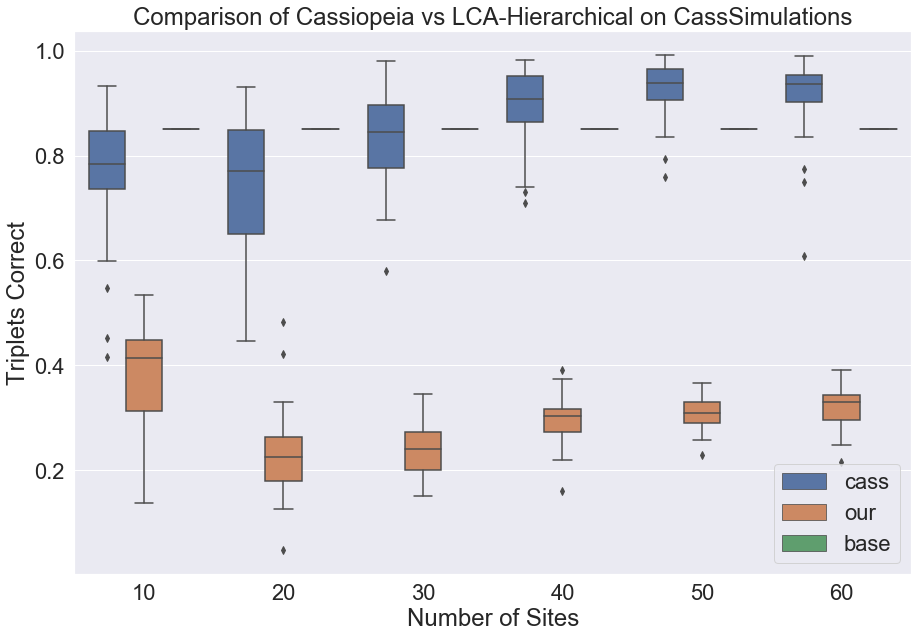

In [31]:
sns.boxplot(x='n_chars', y='value', hue='variable', data=xx)
plt.ylabel('Triplets Correct')
plt.xlabel('Number of Sites')
plt.title('Comparison of Cassiopeia vs LCA-Hierarchical on CassSimulations')
plt.legend()

In [ ]:
results = {'cass':[],'our':[],'base':[], 'cass_t':[],'our_t':[],'n_chars':[]}

for d in ['dispersed_indels','dropout_multiplier','one_minus_mutation_rate','states','depth_of_tree']:
    try:
        directory = '/Users/sitarapersad/benchmark_networks/400_samples/{0}/trees/'.format(d)
        priors_dir = '/'.join(directory.split('/')[:-2])+'/priors/'
        for f in os.listdir(directory):
            if f.endswith(".pkl"):
                true_network = nx.read_gpickle(directory+f)
                priors = nx.read_gpickle(priors_dir+f[:-4]+'_priors.pkl')

                new_priors = dict_to_dist(priors)

                G = true_network

                leaves = [x for x in G.nodes() if G.out_degree(x)==0]

                print('Tree contains {0} leaves.'.format(len(leaves)))
                
                if len(leaves) < 4000:
                    character_matrix = pd.DataFrame([x.char_vec for x in leaves]).replace('-', np.nan).astype(np.float64)

                    names = [x.name for x in leaves]
                    character_matrix.index = names 


                    cm = pd.DataFrame([x.char_vec for x in leaves]).astype(str)
                    cm.index = names 
                    cm_uniq = cm.drop_duplicates(inplace=False)
                    target_nodes = cm_uniq.values.tolist()
                    target_nodes = list(map(lambda x, n: Node(n,x), target_nodes, cm_uniq.index))

                    # # Why is the score_triplets not 1??
                    base_score = score_triplets(true_network, true_network, number_of_trials = 5000, min_size_depth = 20)
                    print('Baseline:', base_score)

                    t = time.time()
                    tree, steps = cluster_nx(character_matrix, new_priors)
                    our_time = time.time()-t

                    our_tree = Cassiopeia_Tree(method ='simulated', network = tree)
                    our_score = score_triplets(true_network, tree, number_of_trials = 5000, min_size_depth = 20)
                    print('Our Score:', our_score)
                    print('Our Time: ', our_time)


                    t = time.time()
                    reconstructed_network_greedy = solve_lineage_instance(target_nodes, 
                                                                          method="greedy", 
                                                                          prior_probabilities=priors)
                    cass_time = time.time()-t
                    cass_tree = reconstructed_network_greedy[0]
                    cass_score = score_triplets(true_network, cass_tree, number_of_trials = 5000, min_size_depth = 20)
                    print('Cassiopeia Score: ', cass_score)
                    print('Cassiopeia Time: ', cass_time)


                    results['cass'].append(cass_score)
                    results['our'].append(our_score)
                    results['base'].append(base_score)
                    results['cass_t'].append(cass_time)
                    results['our_t'].append(our_time)
                    results['n_chars'].append(cm.shape[1])
    except Exception as e:
        print('d:',d)
        print(e)


Tree contains 1055 leaves.
Baseline: 0.45644363008361244
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:38, 27.42it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 75.56it/s]


Our Score: 0.20560579045678384
Our Time:  75.9565999507904
Cassiopeia Score:  0.6899631348478611
Cassiopeia Time:  1.785325050354004
Tree contains 1066 leaves.
Baseline: 0.7481843158590634
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.27it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.74it/s]


Our Score: 0.27788588120560426
Our Time:  76.87018585205078
Cassiopeia Score:  0.9071911646678
Cassiopeia Time:  1.93510103225708
Tree contains 1062 leaves.
Baseline: 0.7257845368646114
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:35, 29.73it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 75.24it/s] 


Our Score: 0.2652321332238135
Our Time:  76.31708097457886
Cassiopeia Score:  0.9553680460284917
Cassiopeia Time:  1.9840879440307617
Tree contains 1067 leaves.
Baseline: 0.7534682109462167
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:37, 28.59it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.87it/s]


Our Score: 0.2877663044827987
Our Time:  77.6262059211731
Cassiopeia Score:  0.8973289352799636
Cassiopeia Time:  1.888484001159668
Tree contains 1064 leaves.
Baseline: 0.7505652580481098
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 27.15it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.12it/s] 


Our Score: 0.2781454878816007
Our Time:  76.42914581298828
Cassiopeia Score:  0.8626422872779242
Cassiopeia Time:  1.9587900638580322
Tree contains 1058 leaves.
Baseline: 0.8091616354629152
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.89it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 73.86it/s]


Our Score: 0.30558024825935176
Our Time:  80.54549717903137
Cassiopeia Score:  0.9691486788802225
Cassiopeia Time:  2.1805760860443115
Tree contains 1066 leaves.
Baseline: 0.8004466598139978
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.85it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 62.77it/s] 


Our Score: 0.2971136677538002
Our Time:  88.09300994873047
Cassiopeia Score:  0.9426129426129427
Cassiopeia Time:  3.030876874923706
Tree contains 1065 leaves.
Baseline: 0.8259830016683967
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.31it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.51it/s]


Our Score: 0.3354111111134468
Our Time:  93.0198450088501
Cassiopeia Score:  0.9666576094852325
Cassiopeia Time:  2.387316942214966
Tree contains 1057 leaves.
Baseline: 0.7566547565359899
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:35, 29.37it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 71.12it/s]


Our Score: 0.22171521615489118
Our Time:  81.74498701095581
Cassiopeia Score:  0.8469198180338319
Cassiopeia Time:  2.173957109451294
Tree contains 1065 leaves.
Baseline: 0.49920155293320057
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.33it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 70.98it/s] 


Our Score: 0.12165223958635915
Our Time:  84.15088820457458
Cassiopeia Score:  0.8129603244604262
Cassiopeia Time:  2.139916181564331
Tree contains 1061 leaves.
Baseline: 0.675991807142415
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.51it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.98it/s]


Our Score: 0.26199878310320734
Our Time:  82.05041480064392
Cassiopeia Score:  0.9605953196040075
Cassiopeia Time:  1.950989007949829
Tree contains 1061 leaves.
Baseline: 0.8260403798173582
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.86it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.04it/s]


Our Score: 0.307746653281904
Our Time:  81.70504093170166
Cassiopeia Score:  0.8856792578184683
Cassiopeia Time:  2.004673957824707
Tree contains 1056 leaves.
Baseline: 0.801121272714409
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.41it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 74.59it/s] 


Our Score: 0.3207684212787254
Our Time:  80.71409392356873
Cassiopeia Score:  0.9579744250122115
Cassiopeia Time:  2.0896542072296143
Tree contains 1054 leaves.
Baseline: 0.8886044296261014
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:35, 29.24it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 72.85it/s]


Our Score: 0.3283295798034557
Our Time:  81.0691249370575
Cassiopeia Score:  0.9371016311754485
Cassiopeia Time:  2.4010958671569824
Tree contains 1060 leaves.
Baseline: 0.7347619047619047
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 27.00it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.21it/s]


Our Score: 0.28488015248004944
Our Time:  85.2411789894104
Cassiopeia Score:  0.9504790299713536
Cassiopeia Time:  2.4498817920684814
Tree contains 1070 leaves.
Baseline: 0.8045983205276399
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:40, 26.24it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 67.56it/s]


Our Score: 0.3155974409502126
Our Time:  90.1576681137085
Cassiopeia Score:  0.8621682690693291
Cassiopeia Time:  2.328274965286255
Tree contains 1055 leaves.
Baseline: 0.7228240566050129
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:38, 27.08it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 74.89it/s]


Our Score: 0.28104584695860885
Our Time:  81.86599493026733
Cassiopeia Score:  0.9484438516646989
Cassiopeia Time:  2.046515941619873
Tree contains 1061 leaves.
Baseline: 0.7787963076665405
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.14it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.94it/s]


Our Score: 0.3031955983395169
Our Time:  83.49466800689697
Cassiopeia Score:  0.8806211064563937
Cassiopeia Time:  2.0827369689941406
Tree contains 1057 leaves.
Baseline: 0.7381267950172276
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.62it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.16it/s] 


Our Score: 0.2515804365068992
Our Time:  82.51818084716797
Cassiopeia Score:  0.9455775365701836
Cassiopeia Time:  2.1610798835754395
Tree contains 1071 leaves.
Baseline: 0.875452022538054
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:42, 25.11it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 71.90it/s] 


Our Score: 0.2893383864331552
Our Time:  84.39594316482544
Cassiopeia Score:  0.9015189317223424
Cassiopeia Time:  2.2207071781158447
Tree contains 1060 leaves.
Baseline: 0.7194186581307507
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.30it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.36it/s]


Our Score: 0.2877655868086394
Our Time:  82.76333498954773
Cassiopeia Score:  0.9328256360195206
Cassiopeia Time:  2.089573860168457
Tree contains 1057 leaves.
Baseline: 0.7870645888623583
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.11it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 73.83it/s]


Our Score: 0.2922005859620698
Our Time:  82.36550784111023
Cassiopeia Score:  0.797443551104071
Cassiopeia Time:  2.0620229244232178
Tree contains 1058 leaves.
Baseline: 0.8813197919225615
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.40it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 73.45it/s]


Our Score: 0.29086659041944163
Our Time:  83.83175468444824
Cassiopeia Score:  0.9402167197745078
Cassiopeia Time:  2.0582802295684814
Tree contains 1062 leaves.
Baseline: 0.642393272230574
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 27.87it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.56it/s]


Our Score: 0.2501646237297482
Our Time:  82.9635877609253
Cassiopeia Score:  0.8439313718356999
Cassiopeia Time:  2.183897018432617
Tree contains 1066 leaves.
Baseline: 0.7094284921195854
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 25.91it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.04it/s]


Our Score: 0.2706306662315043
Our Time:  83.75352191925049
Cassiopeia Score:  0.9225615533154284
Cassiopeia Time:  2.07075834274292
Tree contains 1066 leaves.
Baseline: 0.7311816578483245
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:43, 24.67it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.56it/s] 


Our Score: 0.255027929125228
Our Time:  85.01865601539612
Cassiopeia Score:  0.9518061914751718
Cassiopeia Time:  2.0766761302948
Tree contains 1056 leaves.
Baseline: 0.8277802016649778
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1054 [00:00<?, ?it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 70.43it/s]


Our Score: 0.36453984897488323
Our Time:  82.74909329414368
Cassiopeia Score:  0.9201246004943392
Cassiopeia Time:  2.2008590698242188
Tree contains 1064 leaves.
Baseline: 0.9379391100702577
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.01it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.71it/s]


Our Score: 0.3788567694566948
Our Time:  83.50309824943542
Cassiopeia Score:  0.9209880467842252
Cassiopeia Time:  2.232538938522339
Tree contains 1062 leaves.
Baseline: 0.9057934432114674
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.37it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.74it/s]


Our Score: 0.36810588514180287
Our Time:  82.9501039981842
Cassiopeia Score:  0.9505019232573413
Cassiopeia Time:  2.293231248855591
Tree contains 1056 leaves.
Baseline: 0.8560974209510179
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:38, 27.31it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 73.90it/s]


Our Score: 0.39575298600158937
Our Time:  83.63668608665466
Cassiopeia Score:  0.9562742369504489
Cassiopeia Time:  2.3278138637542725
Tree contains 1066 leaves.
Baseline: 0.6893241864866914
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.03it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.67it/s]


Our Score: 0.25313086207988933
Our Time:  86.89354205131531
Cassiopeia Score:  0.9433403551978862
Cassiopeia Time:  2.087368965148926
Tree contains 1066 leaves.
Baseline: 0.7707507300695345
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.48it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.59it/s]


Our Score: 0.28568543806039104
Our Time:  84.4258279800415
Cassiopeia Score:  0.9144889309510308
Cassiopeia Time:  2.118975877761841
Tree contains 1063 leaves.
Baseline: 0.807967162736229
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:40, 26.37it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.75it/s] 


Our Score: 0.3621919589567146
Our Time:  83.15776705741882
Cassiopeia Score:  0.9413693981899659
Cassiopeia Time:  2.0851569175720215
Tree contains 1066 leaves.
Baseline: 0.7452429641554449
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.49it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.35it/s] 


Our Score: 0.2868748127209772
Our Time:  83.40469813346863
Cassiopeia Score:  0.9342517358010834
Cassiopeia Time:  2.1253459453582764
Tree contains 1061 leaves.
Baseline: 0.7960798137351706
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1059 [00:00<00:34, 30.35it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.36it/s] 


Our Score: 0.2875947580001422
Our Time:  87.61926603317261
Cassiopeia Score:  0.9545278393168403
Cassiopeia Time:  3.4856321811676025
Tree contains 1059 leaves.
Baseline: 0.6807586076543051
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.68it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 69.33it/s]


Our Score: 0.25453076661624513
Our Time:  111.60073113441467
Cassiopeia Score:  0.911469356269888
Cassiopeia Time:  2.1623799800872803
Tree contains 1058 leaves.
Baseline: 0.7205081065454433
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.37it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 73.86it/s] 


Our Score: 0.20528154448312916
Our Time:  82.48039603233337
Cassiopeia Score:  0.8790544764041451
Cassiopeia Time:  1.9903309345245361
Tree contains 1069 leaves.
Baseline: 0.6010781690970618
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.40it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 72.31it/s] 


Our Score: 0.23792523620958136
Our Time:  85.41937613487244
Cassiopeia Score:  0.9107354432303124
Cassiopeia Time:  2.445054054260254
Tree contains 1062 leaves.
Baseline: 0.666069433599266
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.51it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.70it/s]


Our Score: 0.22837749529179052
Our Time:  82.80653166770935
Cassiopeia Score:  0.7961972628996189
Cassiopeia Time:  2.000685930252075
Tree contains 1066 leaves.
Baseline: 0.8694288665879575
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.24it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 75.44it/s]


Our Score: 0.3726276445684805
Our Time:  83.44220805168152
Cassiopeia Score:  0.9805172239834355
Cassiopeia Time:  2.1911187171936035
Tree contains 1071 leaves.
Baseline: 0.843825132589005
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.69it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 73.10it/s] 


Our Score: 0.3157107667102525
Our Time:  83.32799482345581
Cassiopeia Score:  0.9048042651675413
Cassiopeia Time:  2.017563819885254
Tree contains 1059 leaves.
Baseline: 0.8136582091161677
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:35, 29.92it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 76.73it/s] 


Our Score: 0.2745702549817036
Our Time:  80.2548999786377
Cassiopeia Score:  0.9244577240705629
Cassiopeia Time:  2.0818910598754883
Tree contains 1068 leaves.
Baseline: 0.7715854452314747
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.81it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.72it/s]


Our Score: 0.27854701925883263
Our Time:  83.92569088935852
Cassiopeia Score:  0.9036009866426701
Cassiopeia Time:  2.1692490577697754
Tree contains 1056 leaves.
Baseline: 0.9001519018106696
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.96it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 74.45it/s]


Our Score: 0.3336659879445306
Our Time:  82.1072940826416
Cassiopeia Score:  0.9317780371238709
Cassiopeia Time:  2.0676522254943848
Tree contains 1062 leaves.
Baseline: 0.8662789276784539
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.58it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.74it/s]


Our Score: 0.35657592325570014
Our Time:  82.58746814727783
Cassiopeia Score:  0.9213052772063512
Cassiopeia Time:  2.160828113555908
Tree contains 1068 leaves.
Baseline: 0.6425984908864318
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:39, 26.62it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.90it/s]


Our Score: 0.23611337076661787
Our Time:  83.55558609962463
Cassiopeia Score:  0.7891974620485541
Cassiopeia Time:  1.9968960285186768
Tree contains 1057 leaves.
Baseline: 0.8521982374141972
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.16it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.17it/s]


Our Score: 0.2991479155150008
Our Time:  82.81335401535034
Cassiopeia Score:  0.9352861022852721
Cassiopeia Time:  2.119014024734497
Tree contains 1061 leaves.
Baseline: 0.8111371935315597
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.19it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.00it/s] 


Our Score: 0.2952594014759099
Our Time:  83.31674599647522
Cassiopeia Score:  0.9564740380453411
Cassiopeia Time:  2.211620807647705
Tree contains 1062 leaves.
Baseline: 0.7335194039066476
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:40, 26.14it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.10it/s]


Our Score: 0.2822365788968184
Our Time:  83.28865194320679
Cassiopeia Score:  0.8720300281871173
Cassiopeia Time:  2.055629014968872
Tree contains 1062 leaves.
Baseline: 0.9045212765957447
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.11it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.40it/s] 


Our Score: 0.3495659407138536
Our Time:  83.17833685874939
Cassiopeia Score:  0.9493229093955047
Cassiopeia Time:  2.1243550777435303
Tree contains 1063 leaves.
Baseline: 0.8479350522721762
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 28.17it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.02it/s] 


Our Score: 0.2902065658450668
Our Time:  83.16041612625122
Cassiopeia Score:  0.9467339703083225
Cassiopeia Time:  2.1965887546539307
Tree contains 1073 leaves.
Baseline: 0.8125502347228823
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.78it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 72.21it/s] 


Our Score: 0.3014344335875079
Our Time:  84.79574775695801
Cassiopeia Score:  0.9273494303922812
Cassiopeia Time:  2.161041021347046
Tree contains 1075 leaves.
Baseline: 0.7935702280245083
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1073 [00:00<00:41, 25.52it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:14<00:00, 71.58it/s]


Our Score: 0.29409047050241677
Our Time:  85.74828600883484
Cassiopeia Score:  0.8488404242713004
Cassiopeia Time:  2.071038007736206
Tree contains 1064 leaves.
Baseline: 0.9517679677372893
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:36, 28.78it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.04it/s]


Our Score: 0.3817569658741204
Our Time:  84.07167911529541
Cassiopeia Score:  0.9814642709624122
Cassiopeia Time:  2.2360877990722656
Tree contains 1055 leaves.
Baseline: 0.7632036625604119
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.79it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 77.30it/s] 


Our Score: 0.30222147633489704
Our Time:  80.90656805038452
Cassiopeia Score:  0.9370867161072518
Cassiopeia Time:  1.9910459518432617
Tree contains 1061 leaves.
Baseline: 0.7575087759467947
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.63it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.24it/s] 


Our Score: 0.2543837228680991
Our Time:  82.44307398796082
Cassiopeia Score:  0.9446187939794501
Cassiopeia Time:  2.0832347869873047
Tree contains 1063 leaves.
Baseline: 0.8164684141593556
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.11it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.57it/s]


Our Score: 0.3151640369853742
Our Time:  83.59493613243103
Cassiopeia Score:  0.9049848881710743
Cassiopeia Time:  2.0830349922180176
Tree contains 1066 leaves.
Baseline: 0.7593294246206868
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.59it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.31it/s] 


Our Score: 0.2877033876211508
Our Time:  84.16463494300842
Cassiopeia Score:  0.8670894929088981
Cassiopeia Time:  2.071061134338379
Tree contains 1070 leaves.
Baseline: 0.6939872498479344
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:42, 25.09it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 69.18it/s] 


Our Score: 0.23256592228459236
Our Time:  101.94077706336975
Cassiopeia Score:  0.9015285509288686
Cassiopeia Time:  2.2719249725341797
Tree contains 1068 leaves.
Baseline: 0.7989018968747574
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 25.07it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.85it/s] 


Our Score: 0.2590582900231775
Our Time:  84.69658493995667
Cassiopeia Score:  0.9080878451514315
Cassiopeia Time:  2.106131076812744
Tree contains 1061 leaves.
Baseline: 0.7418379384842799
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:42, 24.90it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 68.55it/s]


Our Score: 0.2638252560153638
Our Time:  92.974369764328
Cassiopeia Score:  0.8828286055096068
Cassiopeia Time:  2.331845760345459
Tree contains 1065 leaves.
Baseline: 0.8252711814717092
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.35it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.26it/s] 


Our Score: 0.29794144960479435
Our Time:  88.73658084869385
Cassiopeia Score:  0.9106224872236154
Cassiopeia Time:  2.111499071121216
Tree contains 1069 leaves.
Baseline: 0.8799338381194688
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.45it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 71.48it/s] 


Our Score: 0.34468749316983543
Our Time:  86.40571212768555
Cassiopeia Score:  0.9373130955675432
Cassiopeia Time:  2.255527973175049
Tree contains 1065 leaves.
Baseline: 0.8243779248713361
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.09it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.35it/s] 


Our Score: 0.34506018441426406
Our Time:  85.71544098854065
Cassiopeia Score:  0.955046590757004
Cassiopeia Time:  1.9553861618041992
Tree contains 1057 leaves.
Baseline: 0.8783213951751789
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.49it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 73.84it/s]


Our Score: 0.3738409253469042
Our Time:  83.20954895019531
Cassiopeia Score:  0.9108704698499471
Cassiopeia Time:  2.157531976699829
Tree contains 1066 leaves.
Baseline: 0.5356138964928074
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.72it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 71.27it/s]


Our Score: 0.24481718898385565
Our Time:  86.36882495880127
Cassiopeia Score:  0.9226545396611187
Cassiopeia Time:  2.3373799324035645
Tree contains 1067 leaves.
Baseline: 0.744829573952395
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.65it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 69.65it/s]


Our Score: 0.24900839959921323
Our Time:  86.36177778244019
Cassiopeia Score:  0.7745773657561043
Cassiopeia Time:  1.9372317790985107
Tree contains 1064 leaves.
Baseline: 0.8271902582543315
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 26.52it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.37it/s]


Our Score: 0.3187365493780966
Our Time:  84.00718426704407
Cassiopeia Score:  0.9186405506630226
Cassiopeia Time:  2.1431801319122314
Tree contains 1057 leaves.
Baseline: 0.6012743252314233
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.81it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 76.43it/s]


Our Score: 0.23979179913683568
Our Time:  82.97436738014221
Cassiopeia Score:  0.9207995608887939
Cassiopeia Time:  2.0913710594177246
Tree contains 1071 leaves.
Baseline: 0.8009479657447065
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:42, 24.93it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 70.34it/s] 


Our Score: 0.32348608367698545
Our Time:  87.86143898963928
Cassiopeia Score:  0.923545115637903
Cassiopeia Time:  2.23327898979187
Tree contains 1059 leaves.
Baseline: 0.6632907447777361
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.80it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 68.81it/s] 


Our Score: 0.31740156164903544
Our Time:  87.57541823387146
Cassiopeia Score:  0.873258675533019
Cassiopeia Time:  2.3376080989837646
Tree contains 1072 leaves.
Baseline: 0.7702383300578837
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:41, 25.93it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 68.68it/s]


Our Score: 0.2618558949246738
Our Time:  87.76893186569214
Cassiopeia Score:  0.8707137382435818
Cassiopeia Time:  2.141860008239746
Tree contains 1050 leaves.
Baseline: 0.9188013136288998
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1048 [00:00<00:38, 27.04it/s]

Starting with 1050 nodes


Performing agglomerative clustering: 100%|██████████| 1048/1048 [00:14<00:00, 71.49it/s] 


Our Score: 0.32992891328376506
Our Time:  85.16054010391235
Cassiopeia Score:  0.9266706011476669
Cassiopeia Time:  2.271242141723633
Tree contains 1066 leaves.
Baseline: 0.8060899897593446
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 27.13it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.52it/s] 


Our Score: 0.28525958357855075
Our Time:  86.80620002746582
Cassiopeia Score:  0.8870536620004058
Cassiopeia Time:  2.161025047302246
Tree contains 1062 leaves.
Baseline: 0.7542250227525533
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:42, 24.80it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 70.39it/s] 


Our Score: 0.2866984661538853
Our Time:  88.335618019104
Cassiopeia Score:  0.8294222443943577
Cassiopeia Time:  2.3841450214385986
Tree contains 1067 leaves.
Baseline: 0.7536838160068563
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.41it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 68.92it/s]


Our Score: 0.2664882523292044
Our Time:  89.27508211135864
Cassiopeia Score:  0.9057449275317188
Cassiopeia Time:  2.272024154663086
Tree contains 1057 leaves.
Baseline: 0.9324430199430199
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:39, 26.44it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:15<00:00, 69.17it/s]


Our Score: 0.37713433617027114
Our Time:  87.47530484199524
Cassiopeia Score:  0.941115700981678
Cassiopeia Time:  2.415006160736084
Tree contains 1064 leaves.
Baseline: 0.8650670841611148
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.25it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 70.44it/s] 


Our Score: 0.2659905674398558
Our Time:  88.84141802787781
Cassiopeia Score:  0.8706047428949162
Cassiopeia Time:  2.1839332580566406
Tree contains 1064 leaves.
Baseline: 0.7018822580217806
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:40, 26.00it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 68.09it/s] 


Our Score: 0.25630175231254687
Our Time:  94.2293438911438
Cassiopeia Score:  0.9159830949722682
Cassiopeia Time:  4.020600080490112
Tree contains 1070 leaves.
Baseline: 0.9476343739942066
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:42, 25.13it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:16<00:00, 63.49it/s] 


Our Score: 0.3966527079195327
Our Time:  102.40046787261963
Cassiopeia Score:  0.9400336863363856
Cassiopeia Time:  2.740504026412964
Tree contains 1068 leaves.
Baseline: 0.8261941325730857
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:45, 23.22it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:16<00:00, 66.21it/s]


Our Score: 0.32107033509948185
Our Time:  95.41468596458435
Cassiopeia Score:  0.7500066141628934
Cassiopeia Time:  2.4190688133239746
Tree contains 1062 leaves.
Baseline: 0.7176533631125785
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:35, 29.92it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 68.78it/s]


Our Score: 0.2556779400654029
Our Time:  90.77757215499878
Cassiopeia Score:  0.8871767760330856
Cassiopeia Time:  2.45635724067688
Tree contains 1060 leaves.
Baseline: 0.7601312892786862
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.82it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 66.69it/s] 


Our Score: 0.2663259054948631
Our Time:  89.5653510093689
Cassiopeia Score:  0.9470795709369758
Cassiopeia Time:  2.21584415435791
Tree contains 1060 leaves.
Baseline: 0.7887045039665306
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1058 [00:00<?, ?it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:16<00:00, 65.68it/s]


Our Score: 0.30831125301641144
Our Time:  95.6793429851532
Cassiopeia Score:  0.9494644856204366
Cassiopeia Time:  2.149616241455078
Tree contains 1072 leaves.
Baseline: 0.8150676376319759
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:44, 24.12it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:16<00:00, 64.34it/s] 


Our Score: 0.3186269028938123
Our Time:  92.02831220626831
Cassiopeia Score:  0.9367929683525632
Cassiopeia Time:  3.4585788249969482
Tree contains 1061 leaves.
Baseline: 0.7442006407399258
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:26<00:00, 40.09it/s]


Our Score: 0.2503614262116302
Our Time:  116.02543115615845
Cassiopeia Score:  0.9182496038850134
Cassiopeia Time:  2.7801079750061035
Tree contains 1063 leaves.
Baseline: 0.636357453536296
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1061 [00:00<?, ?it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:19<00:00, 53.82it/s]


Our Score: 0.26781508655918945
Our Time:  115.43463397026062
Cassiopeia Score:  0.8663832689697548
Cassiopeia Time:  3.1519742012023926
Tree contains 1060 leaves.
Baseline: 0.8348347816986573
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:40, 25.90it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:17<00:00, 61.74it/s]


Our Score: 0.28020161022024087
Our Time:  117.82733726501465
Cassiopeia Score:  0.980639647576495
Cassiopeia Time:  3.485377073287964
Tree contains 1070 leaves.
Baseline: 0.6898339377112962
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:42, 24.80it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:17<00:00, 62.66it/s] 


Our Score: 0.26764149977078616
Our Time:  135.89283394813538
Cassiopeia Score:  0.8872457356386771
Cassiopeia Time:  2.245638847351074
Tree contains 1062 leaves.
Baseline: 0.9054678061721416
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:40, 26.15it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:16<00:00, 64.74it/s] 


Our Score: 0.3723374000925968
Our Time:  100.5297908782959
Cassiopeia Score:  0.8025180618441083
Cassiopeia Time:  2.7715959548950195
Tree contains 1060 leaves.
Baseline: 0.7293894232045491
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.61it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 70.48it/s] 


Our Score: 0.2485686185049194
Our Time:  93.07542514801025
Cassiopeia Score:  0.8368521292689873
Cassiopeia Time:  2.009443759918213
Tree contains 1061 leaves.
Baseline: 0.6965816429775957
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.11it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 68.14it/s] 


Our Score: 0.26251978680107607
Our Time:  86.55347990989685
Cassiopeia Score:  0.8661869847069426
Cassiopeia Time:  2.1021668910980225
Tree contains 1072 leaves.
Baseline: 0.9118055555555555
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:37, 28.31it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 70.50it/s] 


Our Score: 0.3361747068024482
Our Time:  85.7450361251831
Cassiopeia Score:  0.9686370695379592
Cassiopeia Time:  2.214354991912842
Tree contains 1062 leaves.
Baseline: 0.805583743192744
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.27it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 70.72it/s]


Our Score: 0.32505876446396714
Our Time:  86.29842114448547
Cassiopeia Score:  0.8194677376634512
Cassiopeia Time:  2.4561848640441895
Tree contains 1070 leaves.
Baseline: 0.6820489535394709
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:44, 23.94it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 67.22it/s]


Our Score: 0.26589535572346973
Our Time:  90.4615581035614
Cassiopeia Score:  0.8518345133923676
Cassiopeia Time:  2.080644130706787
Tree contains 1064 leaves.
Baseline: 0.8273742081544151
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 27.91it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.73it/s]


Our Score: 0.300706031837361
Our Time:  84.076651096344
Cassiopeia Score:  0.9437227652642018
Cassiopeia Time:  2.0451560020446777
Tree contains 1057 leaves.
Baseline: 0.7714699766870393
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.58it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 73.36it/s] 


Our Score: 0.26883438538990495
Our Time:  83.12754201889038
Cassiopeia Score:  0.858027421676538
Cassiopeia Time:  2.043516159057617
Tree contains 1059 leaves.
Baseline: 0.5864473327917682
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:40, 26.11it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 68.75it/s]


Our Score: 0.26974488318984463
Our Time:  88.57187414169312
Cassiopeia Score:  0.7048438863454343
Cassiopeia Time:  2.3351118564605713
Tree contains 1068 leaves.
Baseline: 0.6411711459862027
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 24.78it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 67.79it/s]


Our Score: 0.18521781007539959
Our Time:  86.7773790359497
Cassiopeia Score:  0.8964725865568063
Cassiopeia Time:  2.2310047149658203
Tree contains 1068 leaves.
Baseline: 0.7805107808247854
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 25.00it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 67.70it/s]


Our Score: 0.2991134416204043
Our Time:  87.03089690208435
Cassiopeia Score:  0.9062625176173875
Cassiopeia Time:  2.348836898803711
Tree contains 1066 leaves.
Baseline: 0.7967269215726507
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.45it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 69.58it/s] 


Our Score: 0.27746162970084653
Our Time:  86.40985703468323
Cassiopeia Score:  0.895814397825088
Cassiopeia Time:  2.3418540954589844
Tree contains 1063 leaves.
Baseline: 0.7589349193327865
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 24.86it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 66.37it/s] 


Our Score: 0.2846961327913992
Our Time:  86.55159282684326
Cassiopeia Score:  0.8685581885811189
Cassiopeia Time:  2.142091751098633
Tree contains 1067 leaves.
Baseline: 0.866817275419226
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:20<00:00, 52.71it/s] 


Our Score: 0.2827506083878334
Our Time:  112.92895603179932
Cassiopeia Score:  0.8761264142361703
Cassiopeia Time:  2.316725015640259
Tree contains 1064 leaves.
Baseline: 0.8668104242314734
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:36, 28.75it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 69.85it/s]


Our Score: 0.3099654012885803
Our Time:  100.30443501472473
Cassiopeia Score:  0.935912420134019
Cassiopeia Time:  2.7573821544647217
Tree contains 1060 leaves.
Baseline: 0.7924863773754615
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.88it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 70.08it/s] 


Our Score: 0.25979185753417605
Our Time:  89.08063888549805
Cassiopeia Score:  0.9498006427780906
Cassiopeia Time:  2.4168269634246826
Tree contains 1055 leaves.
Baseline: 0.942043974565234
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:40, 26.08it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:16<00:00, 62.27it/s]


Our Score: 0.39533330396072436
Our Time:  95.94903612136841
Cassiopeia Score:  0.9307047534629156
Cassiopeia Time:  2.5506019592285156
Tree contains 1066 leaves.
Baseline: 0.7330698129410599
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:43, 24.23it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 63.03it/s]


Our Score: 0.30032381870628116
Our Time:  95.74304819107056
Cassiopeia Score:  0.9340136245800063
Cassiopeia Time:  2.5354480743408203
Tree contains 1059 leaves.
Baseline: 0.6988111185991212
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:42, 25.04it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:17<00:00, 60.34it/s]


Our Score: 0.3432412019740787
Our Time:  105.53838586807251
Cassiopeia Score:  0.914966784533812
Cassiopeia Time:  3.043097972869873
Tree contains 1068 leaves.
Baseline: 0.6704951120540161
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1066 [00:00<?, ?it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:17<00:00, 60.54it/s] 


Our Score: 0.23784024539824303
Our Time:  99.45791888237
Cassiopeia Score:  0.8283931895515804
Cassiopeia Time:  2.38887095451355
Tree contains 1061 leaves.
Baseline: 0.7427662683344501
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:44, 23.82it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 60.16it/s]


Our Score: 0.2772426760509925
Our Time:  104.85182785987854
Cassiopeia Score:  0.8426611759868639
Cassiopeia Time:  2.4005229473114014
Tree contains 1067 leaves.
Baseline: 0.6425475542612654
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:17<00:00, 59.37it/s] 


Our Score: 0.24358615244305837
Our Time:  107.66556286811829
Cassiopeia Score:  0.8992517431231585
Cassiopeia Time:  2.8615589141845703
Tree contains 1059 leaves.
Baseline: 0.8236145079931716
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1057 [00:00<?, ?it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:17<00:00, 59.57it/s]


Our Score: 0.2823747432182473
Our Time:  110.70089340209961
Cassiopeia Score:  0.8634832916645939
Cassiopeia Time:  2.6770238876342773
Tree contains 1066 leaves.
Baseline: 0.7398296997470937
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1064 [00:00<?, ?it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:17<00:00, 59.34it/s]


Our Score: 0.2670885237721101
Our Time:  106.70742225646973
Cassiopeia Score:  0.86517090012943
Cassiopeia Time:  2.660133123397827
Tree contains 1058 leaves.
Baseline: 0.8304201637534971
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1056 [00:00<?, ?it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:17<00:00, 59.44it/s]


Our Score: 0.3621921516637105
Our Time:  104.45746779441833
Cassiopeia Score:  0.720275686462243
Cassiopeia Time:  2.6883859634399414
Tree contains 1062 leaves.
Baseline: 0.7854928308350543
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1060 [00:00<?, ?it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:18<00:00, 58.14it/s] 


Our Score: 0.28340536233233654
Our Time:  104.32772040367126
Cassiopeia Score:  0.9409790795611285
Cassiopeia Time:  2.954454183578491
Tree contains 1061 leaves.
Baseline: 0.773732130998567
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 61.12it/s] 


Our Score: 0.31266044862340353
Our Time:  105.206716299057
Cassiopeia Score:  0.9260723154438496
Cassiopeia Time:  2.7962701320648193
Tree contains 1061 leaves.
Baseline: 0.7451581764731693
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.68it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 60.76it/s]


Our Score: 0.27767204104872717
Our Time:  103.17079377174377
Cassiopeia Score:  0.9228474479922584
Cassiopeia Time:  2.5184500217437744
Tree contains 1056 leaves.
Baseline: 0.8562538754539818
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:44, 23.64it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 72.90it/s]


Our Score: 0.3651545765141591
Our Time:  98.74631595611572
Cassiopeia Score:  0.95366687111189
Cassiopeia Time:  2.195728063583374
Tree contains 1067 leaves.
Baseline: 0.7485565698198768
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.49it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.83it/s]


Our Score: 0.29614691926149556
Our Time:  84.13086891174316
Cassiopeia Score:  0.8800074967002134
Cassiopeia Time:  1.9255969524383545
Tree contains 1067 leaves.
Baseline: 0.8561500835858648
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.60it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.27it/s]


Our Score: 0.33960342681307865
Our Time:  83.77005791664124
Cassiopeia Score:  0.8036256980258134
Cassiopeia Time:  1.9370508193969727
Tree contains 1062 leaves.
Baseline: 0.7529239836058361
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.75it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.89it/s]


Our Score: 0.27166972330704736
Our Time:  83.03897500038147
Cassiopeia Score:  0.8360696574907998
Cassiopeia Time:  1.9486026763916016
Tree contains 1061 leaves.
Baseline: 0.8070106063983936
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.57it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.79it/s] 


Our Score: 0.2513611970058764
Our Time:  82.9427740573883
Cassiopeia Score:  0.92587686367601
Cassiopeia Time:  2.2167208194732666
Tree contains 1065 leaves.
Baseline: 0.7777867561089492
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 25.86it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.12it/s] 


Our Score: 0.3066942384634616
Our Time:  84.71889781951904
Cassiopeia Score:  0.9060152807796586
Cassiopeia Time:  2.0408308506011963
Tree contains 1063 leaves.
Baseline: 0.7755941032275637
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:41, 25.28it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.05it/s]


Our Score: 0.2675384769850196
Our Time:  83.01454877853394
Cassiopeia Score:  0.8977535138725637
Cassiopeia Time:  2.283446788787842
Tree contains 1069 leaves.
Baseline: 0.7523111050710364
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:37, 28.13it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 71.74it/s]


Our Score: 0.23167062977928313
Our Time:  84.3920350074768
Cassiopeia Score:  0.938992056915694
Cassiopeia Time:  1.9945249557495117
Tree contains 1064 leaves.
Baseline: 0.6978898976988308
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 27.98it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 71.56it/s]


Our Score: 0.27654238034627904
Our Time:  82.80734086036682
Cassiopeia Score:  0.9174430494969914
Cassiopeia Time:  2.0440990924835205
Tree contains 1062 leaves.
Baseline: 0.7904767934270318
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.57it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 67.81it/s]


Our Score: 0.34104022706480613
Our Time:  86.76983499526978
Cassiopeia Score:  0.925195043158799
Cassiopeia Time:  2.1257941722869873
Tree contains 1072 leaves.
Baseline: 0.6133661755296226
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:40, 26.43it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 67.46it/s] 


Our Score: 0.18646221585655096
Our Time:  87.57091403007507
Cassiopeia Score:  0.9359321516241388
Cassiopeia Time:  2.0699760913848877
Tree contains 1059 leaves.
Baseline: 0.7897821487065239
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:35, 29.80it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.16it/s]


Our Score: 0.2931779376734375
Our Time:  82.77907991409302
Cassiopeia Score:  0.940945492120899
Cassiopeia Time:  2.115568161010742
Tree contains 1068 leaves.
Baseline: 0.776271156464395
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.50it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.86it/s]


Our Score: 0.2839199982116544
Our Time:  83.46726512908936
Cassiopeia Score:  0.9015535955164792
Cassiopeia Time:  2.0402979850769043
Tree contains 1062 leaves.
Baseline: 0.8000500353510632
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:35, 29.69it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.86it/s] 


Our Score: 0.31504046141799547
Our Time:  83.11183619499207
Cassiopeia Score:  0.9297249674404351
Cassiopeia Time:  2.1089980602264404
Tree contains 1067 leaves.
Baseline: 0.8681155994379777
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:37, 27.99it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.55it/s] 


Our Score: 0.32304171436878737
Our Time:  83.56889915466309
Cassiopeia Score:  0.8724731746004272
Cassiopeia Time:  2.1984810829162598
Tree contains 1057 leaves.
Baseline: 0.897425035065772
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1055 [00:00<00:33, 31.18it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.06it/s] 


Our Score: 0.30567148902206537
Our Time:  82.84245920181274
Cassiopeia Score:  0.9405555555555556
Cassiopeia Time:  2.104802131652832
Tree contains 1071 leaves.
Baseline: 0.7331346323393662
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.70it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 70.78it/s]


Our Score: 0.25509904555630736
Our Time:  84.92490601539612
Cassiopeia Score:  0.9432806703301598
Cassiopeia Time:  1.9754078388214111
Tree contains 1065 leaves.
Baseline: 0.6049185314320217
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:44, 24.01it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 70.60it/s]


Our Score: 0.2630465797542045
Our Time:  84.01823496818542
Cassiopeia Score:  0.6720227327319526
Cassiopeia Time:  1.9376740455627441
Tree contains 1058 leaves.
Baseline: 0.7017211127993632
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.31it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 72.83it/s] 


Our Score: 0.25451905766828153
Our Time:  82.56715488433838
Cassiopeia Score:  0.8686292286669837
Cassiopeia Time:  2.2092199325561523
Tree contains 1061 leaves.
Baseline: 0.8401254290198514
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.49it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.41it/s] 


Our Score: 0.2927484803450745
Our Time:  83.39949297904968
Cassiopeia Score:  0.9418612266856272
Cassiopeia Time:  2.0888900756835938
Tree contains 1061 leaves.
Baseline: 0.582439209333806
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.62it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.39it/s] 


Our Score: 0.22212136474143152
Our Time:  82.10131883621216
Cassiopeia Score:  0.8666671652283163
Cassiopeia Time:  1.978830099105835
Tree contains 1067 leaves.
Baseline: 0.8032880802230545
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.32it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 70.23it/s] 


Our Score: 0.2918330605741696
Our Time:  83.94960594177246
Cassiopeia Score:  0.8867320669913602
Cassiopeia Time:  2.133625030517578
Tree contains 1073 leaves.
Baseline: 0.911311475409836
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:38, 27.57it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:15<00:00, 69.36it/s]


Our Score: 0.32238610594905615
Our Time:  86.10685420036316
Cassiopeia Score:  0.9535059473819417
Cassiopeia Time:  2.260124921798706
Tree contains 1056 leaves.
Baseline: 0.5638778638036962
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.54it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:15<00:00, 70.03it/s]


Our Score: 0.2901188594423176
Our Time:  82.83975076675415
Cassiopeia Score:  0.7205136091556671
Cassiopeia Time:  2.1559488773345947
Tree contains 1071 leaves.
Baseline: 0.5821451915229666
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.55it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 72.12it/s]


Our Score: 0.29402077158569456
Our Time:  84.93296194076538
Cassiopeia Score:  0.8479794923086686
Cassiopeia Time:  1.9625909328460693
Tree contains 1065 leaves.
Baseline: 0.7735203290674019
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 25.90it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 69.75it/s] 


Our Score: 0.2677820880554573
Our Time:  84.97845506668091
Cassiopeia Score:  0.9178604276554574
Cassiopeia Time:  2.0436947345733643
Tree contains 1068 leaves.
Baseline: 0.7556940609623823
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.37it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.59it/s]


Our Score: 0.2695688384848167
Our Time:  84.52707600593567
Cassiopeia Score:  0.8439331637784002
Cassiopeia Time:  1.9762523174285889
Tree contains 1066 leaves.
Baseline: 0.749792861119228
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.58it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 69.48it/s]


Our Score: 0.22913680526434319
Our Time:  85.19561076164246
Cassiopeia Score:  0.9148695089746112
Cassiopeia Time:  1.991804838180542
Tree contains 1065 leaves.
Baseline: 0.5726775786833541
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.16it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 70.80it/s] 


Our Score: 0.21570890385550712
Our Time:  83.9946141242981
Cassiopeia Score:  0.8965149133287221
Cassiopeia Time:  2.267397880554199
Tree contains 1066 leaves.
Baseline: 0.7907360286495146
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.50it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 70.60it/s]


Our Score: 0.34650356720140724
Our Time:  84.58005976676941
Cassiopeia Score:  0.9134887549550474
Cassiopeia Time:  1.951686143875122
Tree contains 1068 leaves.
Baseline: 0.7430440576908067
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.05it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 69.61it/s]


Our Score: 0.2601110290250302
Our Time:  85.22380900382996
Cassiopeia Score:  0.8062649608172086
Cassiopeia Time:  2.05989408493042
Tree contains 1063 leaves.
Baseline: 0.7636422803913194
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.12it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 70.82it/s] 


Our Score: 0.2894851498869171
Our Time:  84.32816410064697
Cassiopeia Score:  0.9091128443816404
Cassiopeia Time:  2.1452040672302246
Tree contains 1069 leaves.
Baseline: 0.8376399876208942
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:42, 25.26it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 69.98it/s]


Our Score: 0.30324733856392494
Our Time:  85.64964008331299
Cassiopeia Score:  0.9315141961141569
Cassiopeia Time:  2.11167311668396
Tree contains 1064 leaves.
Baseline: 0.7515200077700077
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.08it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 70.86it/s]


Our Score: 0.3492949351622029
Our Time:  84.33665490150452
Cassiopeia Score:  0.9245502718476857
Cassiopeia Time:  2.320667028427124
Tree contains 1055 leaves.
Baseline: 0.6423171652739933
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.73it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 72.09it/s]


Our Score: 0.1863153916174434
Our Time:  84.1436939239502
Cassiopeia Score:  0.8532821100496012
Cassiopeia Time:  1.9532861709594727
Tree contains 1063 leaves.
Baseline: 0.7556302088906326
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1061 [00:00<?, ?it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:19<00:00, 53.75it/s] 


Our Score: 0.30646306334497747
Our Time:  92.18841505050659
Cassiopeia Score:  0.9171383531368059
Cassiopeia Time:  3.8214728832244873
Tree contains 1063 leaves.
Baseline: 0.7919810451585537
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.79it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 67.78it/s]


Our Score: 0.3196649894808491
Our Time:  108.47594118118286
Cassiopeia Score:  0.9132824250876762
Cassiopeia Time:  2.4614768028259277
Tree contains 1059 leaves.
Baseline: 0.8121372031662268
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:40, 26.05it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:17<00:00, 61.74it/s] 


Our Score: 0.30312953097248563
Our Time:  100.4250180721283
Cassiopeia Score:  0.6988642709878665
Cassiopeia Time:  2.7280147075653076
Tree contains 1065 leaves.
Baseline: 0.8387254901960784
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:44, 23.57it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:17<00:00, 59.96it/s] 


Our Score: 0.2939993939634856
Our Time:  112.27988314628601
Cassiopeia Score:  0.8563022310137716
Cassiopeia Time:  2.9976980686187744
Tree contains 1058 leaves.
Baseline: 0.8388949464661609
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:42, 24.63it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:18<00:00, 57.67it/s] 


Our Score: 0.33868110323795686
Our Time:  104.7310380935669
Cassiopeia Score:  0.9191963209204589
Cassiopeia Time:  3.2770299911499023
Tree contains 1064 leaves.
Baseline: 0.657978806749249
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:45, 23.26it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:19<00:00, 55.88it/s] 


Our Score: 0.22916054833909305
Our Time:  118.56903910636902
Cassiopeia Score:  0.7984635391997023
Cassiopeia Time:  3.2878968715667725
Tree contains 1057 leaves.
Baseline: 0.8482970794696247
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:44, 23.54it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:18<00:00, 56.62it/s]


Our Score: 0.3028564906009609
Our Time:  116.08254218101501
Cassiopeia Score:  0.9116057715201733
Cassiopeia Time:  3.118354320526123
Tree contains 1065 leaves.
Baseline: 0.638716745741746
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1063 [00:00<?, ?it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:19<00:00, 53.34it/s] 


Our Score: 0.2947118673672872
Our Time:  118.70602083206177
Cassiopeia Score:  0.8653982305418517
Cassiopeia Time:  3.3643839359283447
Tree contains 1058 leaves.
Baseline: 0.8335835612561882
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1056 [00:00<?, ?it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:21<00:00, 48.81it/s] 


Our Score: 0.25381869686679265
Our Time:  126.95168375968933
Cassiopeia Score:  0.958454364016196
Cassiopeia Time:  3.635976791381836
Tree contains 1075 leaves.
Baseline: 0.7698877103668212
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1073 [00:00<?, ?it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:19<00:00, 54.02it/s] 


Our Score: 0.24865520312933237
Our Time:  120.13837599754333
Cassiopeia Score:  0.9238159968724055
Cassiopeia Time:  3.0425379276275635
Tree contains 1074 leaves.
Baseline: 0.7272676331108278
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:46, 23.16it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:18<00:00, 56.65it/s] 


Our Score: 0.2958349706248866
Our Time:  119.2522439956665
Cassiopeia Score:  0.8975469434612275
Cassiopeia Time:  3.027509927749634
Tree contains 1054 leaves.
Baseline: 0.7034899570506391
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:41, 25.24it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:17<00:00, 59.43it/s] 


Our Score: 0.2906668188357325
Our Time:  104.33708810806274
Cassiopeia Score:  0.8987372071236507
Cassiopeia Time:  2.7622110843658447
Tree contains 1066 leaves.
Baseline: 0.749950337388761
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:44, 23.71it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 63.33it/s] 


Our Score: 0.2541092313849435
Our Time:  106.43942093849182
Cassiopeia Score:  0.8780165204007292
Cassiopeia Time:  2.984018325805664
Tree contains 1063 leaves.
Baseline: 0.683050181017249
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:41, 25.19it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:17<00:00, 60.23it/s] 


Our Score: 0.21426240956120782
Our Time:  103.13736581802368
Cassiopeia Score:  0.9417153521583902
Cassiopeia Time:  2.715273141860962
Tree contains 1062 leaves.
Baseline: 0.8830985058755677
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:43, 24.54it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:17<00:00, 61.62it/s] 


Our Score: 0.3238614341938179
Our Time:  100.80983710289001
Cassiopeia Score:  0.9405604145626387
Cassiopeia Time:  2.643589973449707
Tree contains 1063 leaves.
Baseline: 0.5875676546391753
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.84it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:16<00:00, 64.51it/s] 


Our Score: 0.19831326747616107
Our Time:  102.55308389663696
Cassiopeia Score:  0.8439876427944727
Cassiopeia Time:  2.651676893234253
Tree contains 1061 leaves.
Baseline: 0.7133483458074753
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:42, 25.03it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:16<00:00, 63.05it/s]


Our Score: 0.30901217231282974
Our Time:  100.73476886749268
Cassiopeia Score:  0.9572229647582043
Cassiopeia Time:  3.028733253479004
Tree contains 1066 leaves.
Baseline: 0.7586672151378034
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.43it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 64.36it/s] 


Our Score: 0.29017984668502733
Our Time:  102.68901109695435
Cassiopeia Score:  0.7663232657359081
Cassiopeia Time:  2.765177011489868
Tree contains 1075 leaves.
Baseline: 0.9006696527845726
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1073 [00:00<00:44, 24.30it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:17<00:00, 62.49it/s] 


Our Score: 0.29824934055104263
Our Time:  101.76942896842957
Cassiopeia Score:  0.8334415342788686
Cassiopeia Time:  2.62490177154541
Tree contains 1066 leaves.
Baseline: 0.7535946195310922
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:42, 24.68it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 63.24it/s] 


Our Score: 0.26231985222743726
Our Time:  99.20037889480591
Cassiopeia Score:  0.9604960812808189
Cassiopeia Time:  2.6308398246765137
Tree contains 1062 leaves.
Baseline: 0.8386415339586097
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:41, 25.40it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:16<00:00, 64.70it/s] 


Our Score: 0.32816171553899876
Our Time:  98.68840503692627
Cassiopeia Score:  0.924955432135567
Cassiopeia Time:  2.7869601249694824
Tree contains 1068 leaves.
Baseline: 0.8295825280285353
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.18it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:16<00:00, 64.65it/s] 


Our Score: 0.29253891983784325
Our Time:  102.70523595809937
Cassiopeia Score:  0.8883877427968474
Cassiopeia Time:  2.791630983352661
Tree contains 1066 leaves.
Baseline: 0.7148793060652802
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1064 [00:00<?, ?it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:25<00:00, 42.32it/s] 


Our Score: 0.2151060444692875
Our Time:  146.33599424362183
Cassiopeia Score:  0.8195497511244039
Cassiopeia Time:  3.59999418258667
Tree contains 1063 leaves.
Baseline: 0.7541924519831982
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1061 [00:00<?, ?it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:26<00:00, 40.30it/s] 


Our Score: 0.2934233179111917
Our Time:  150.60810112953186
Cassiopeia Score:  0.8986765692899233
Cassiopeia Time:  4.012777805328369
Tree contains 1056 leaves.
Baseline: 0.8631119588989157
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:39, 26.92it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:15<00:00, 68.05it/s] 


Our Score: 0.32039062673737084
Our Time:  107.55634117126465
Cassiopeia Score:  0.8936134103911599
Cassiopeia Time:  2.472440004348755
Tree contains 1062 leaves.
Baseline: 0.793251374812943
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.25it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.16it/s] 


Our Score: 0.28745911355538867
Our Time:  90.4046859741211
Cassiopeia Score:  0.7289933394890378
Cassiopeia Time:  2.4127252101898193
Tree contains 1066 leaves.
Baseline: 0.8948075161153104
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.02it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.80it/s] 


Our Score: 0.29838693500065994
Our Time:  90.10145616531372
Cassiopeia Score:  0.9060981628522332
Cassiopeia Time:  2.5170910358428955
Tree contains 1061 leaves.
Baseline: 0.8035665130676776
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 28.13it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.28it/s] 


Our Score: 0.29646621795100697
Our Time:  89.09954571723938
Cassiopeia Score:  0.9785169966701771
Cassiopeia Time:  2.568247079849243
Tree contains 1067 leaves.
Baseline: 0.7166004005464142
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.31it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.18it/s]


Our Score: 0.32075988807140976
Our Time:  89.2023777961731
Cassiopeia Score:  0.9448952858176098
Cassiopeia Time:  2.451219081878662
Tree contains 1073 leaves.
Baseline: 0.6780291970352509
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.70it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 72.60it/s] 


Our Score: 0.2674929308466904
Our Time:  88.97597622871399
Cassiopeia Score:  0.8809917335327037
Cassiopeia Time:  2.2293949127197266
Tree contains 1059 leaves.
Baseline: 0.8891633466135458
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.48it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.56it/s]


Our Score: 0.3148481845514758
Our Time:  87.39494919776917
Cassiopeia Score:  0.9469848827062266
Cassiopeia Time:  2.4654829502105713
Tree contains 1067 leaves.
Baseline: 0.777915133362205
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 25.21it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.26it/s]


Our Score: 0.3363205924242995
Our Time:  87.46327710151672
Cassiopeia Score:  0.9038782599837658
Cassiopeia Time:  2.502465009689331
Tree contains 1057 leaves.
Baseline: 0.770156495246545
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.71it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 75.04it/s] 


Our Score: 0.3633423440824446
Our Time:  86.68646311759949
Cassiopeia Score:  0.9300042916825858
Cassiopeia Time:  2.231674909591675
Tree contains 1075 leaves.
Baseline: 0.7334238961131434
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1073 [00:00<00:40, 26.48it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:14<00:00, 72.76it/s]


Our Score: 0.3046164401659397
Our Time:  87.38549566268921
Cassiopeia Score:  0.8186894195158881
Cassiopeia Time:  2.1960599422454834
Tree contains 1057 leaves.
Baseline: 0.8053325706995975
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:36, 28.98it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 75.07it/s]


Our Score: 0.31256715711492333
Our Time:  84.3485119342804
Cassiopeia Score:  0.9328665667368587
Cassiopeia Time:  2.3171169757843018
Tree contains 1069 leaves.
Baseline: 0.7186446542340046
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.52it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.61it/s]


Our Score: 0.2078512098422053
Our Time:  86.27102398872375
Cassiopeia Score:  0.8393330216270688
Cassiopeia Time:  2.0379912853240967
Tree contains 1068 leaves.
Baseline: 0.7548827075865869
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:39, 26.63it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.71it/s] 


Our Score: 0.2754450105555245
Our Time:  85.05530905723572
Cassiopeia Score:  0.8807925005751093
Cassiopeia Time:  2.104487895965576
Tree contains 1073 leaves.
Baseline: 0.7925758399927343
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.86it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 73.11it/s]


Our Score: 0.33598854744604517
Our Time:  86.49114322662354
Cassiopeia Score:  0.9246919252739367
Cassiopeia Time:  2.179494857788086
Tree contains 1060 leaves.
Baseline: 0.9231388910745292
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.00it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.15it/s]


Our Score: 0.37292984695980397
Our Time:  83.52761912345886
Cassiopeia Score:  0.8394629041217375
Cassiopeia Time:  2.19970703125
Tree contains 1062 leaves.
Baseline: 0.7825748997753785
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.86it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.75it/s] 


Our Score: 0.3362591618715179
Our Time:  82.47654986381531
Cassiopeia Score:  0.9329830697918011
Cassiopeia Time:  2.290722131729126
Tree contains 1058 leaves.
Baseline: 0.8096734083782953
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.10it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.68it/s] 


Our Score: 0.26779568946487337
Our Time:  84.33550500869751
Cassiopeia Score:  0.9293355977807197
Cassiopeia Time:  2.40810489654541
Tree contains 1061 leaves.
Baseline: 0.7688313727864894
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.84it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.87it/s] 


Our Score: 0.2869558316599962
Our Time:  83.55140018463135
Cassiopeia Score:  0.8403642251237011
Cassiopeia Time:  2.0586538314819336
Tree contains 1061 leaves.
Baseline: 0.7858962943620564
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.48it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.76it/s] 


Our Score: 0.3115916262517177
Our Time:  81.82140111923218
Cassiopeia Score:  0.9635877874554659
Cassiopeia Time:  2.177367925643921
Tree contains 1064 leaves.
Baseline: 0.8672058373303397
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:35, 29.69it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:13<00:00, 77.27it/s]


Our Score: 0.32577325129601553
Our Time:  83.71809411048889
Cassiopeia Score:  0.8226964185954154
Cassiopeia Time:  2.0880839824676514
Tree contains 1059 leaves.
Baseline: 0.700342403074436
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:36, 29.04it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 75.76it/s]


Our Score: 0.2832155153352917
Our Time:  83.65668201446533
Cassiopeia Score:  0.6480552059499427
Cassiopeia Time:  2.08986234664917
Tree contains 1071 leaves.
Baseline: 0.7988846067592599
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:37, 28.36it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 75.99it/s] 


Our Score: 0.280525073305252
Our Time:  85.54471492767334
Cassiopeia Score:  0.8773161305160615
Cassiopeia Time:  2.1805529594421387
Tree contains 1068 leaves.
Baseline: 0.9162397274625326
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.22it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.10it/s]


Our Score: 0.35043430369182244
Our Time:  83.09362387657166
Cassiopeia Score:  0.970969387755102
Cassiopeia Time:  2.0469720363616943
Tree contains 1065 leaves.
Baseline: 0.6000787855766119
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.16it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.64it/s] 


Our Score: 0.21059721090283437
Our Time:  80.14247107505798
Cassiopeia Score:  0.8402006962932624
Cassiopeia Time:  2.0059499740600586
Tree contains 1071 leaves.
Baseline: 0.709428992183038
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:40, 26.33it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 74.17it/s]


Our Score: 0.27939093122233166
Our Time:  82.69862294197083
Cassiopeia Score:  0.9317683441052432
Cassiopeia Time:  1.8416252136230469
Tree contains 1063 leaves.
Baseline: 0.7189941040980976
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.44it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.05it/s] 


Our Score: 0.23258845525510483
Our Time:  80.59804892539978
Cassiopeia Score:  0.7273646622541886
Cassiopeia Time:  2.0483901500701904
Tree contains 1063 leaves.
Baseline: 0.778510824617018
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.50it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.67it/s]


Our Score: 0.2585496489296264
Our Time:  79.04659104347229
Cassiopeia Score:  0.7274866132342291
Cassiopeia Time:  1.864903211593628
Tree contains 1056 leaves.
Baseline: 0.7715438521979189
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.84it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 75.98it/s]


Our Score: 0.33074531699959087
Our Time:  78.58422589302063
Cassiopeia Score:  0.9109255728319989
Cassiopeia Time:  1.9173920154571533
Tree contains 1068 leaves.
Baseline: 0.6718865881427458
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:39, 26.72it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.11it/s]


Our Score: 0.2391133113311331
Our Time:  79.70902514457703
Cassiopeia Score:  0.7801505375567616
Cassiopeia Time:  2.0244140625
Tree contains 1065 leaves.
Baseline: 0.8569908964971304
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.88it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.41it/s] 


Our Score: 0.3267182449903038
Our Time:  80.31153512001038
Cassiopeia Score:  0.8895409794143972
Cassiopeia Time:  2.1657700538635254
Tree contains 1063 leaves.
Baseline: 0.7548343033391613
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.48it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:13<00:00, 77.35it/s] 


Our Score: 0.2820587141272691
Our Time:  79.779452085495
Cassiopeia Score:  0.9067005358025174
Cassiopeia Time:  2.075176239013672
Tree contains 1062 leaves.
Baseline: 0.7670043885624888
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.48it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.76it/s]


Our Score: 0.2971646105714824
Our Time:  79.36893081665039
Cassiopeia Score:  0.8987932479506414
Cassiopeia Time:  1.8995940685272217
Tree contains 1053 leaves.
Baseline: 0.5588659886735439
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:41, 25.05it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:13<00:00, 76.05it/s] 


Our Score: 0.21620765911270645
Our Time:  77.94209814071655
Cassiopeia Score:  0.8378384426826316
Cassiopeia Time:  1.829350233078003
Tree contains 1068 leaves.
Baseline: 0.748606576647839
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.08it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.01it/s]


Our Score: 0.2728599117631074
Our Time:  79.75348997116089
Cassiopeia Score:  0.9645672778995711
Cassiopeia Time:  1.9996237754821777
Tree contains 1064 leaves.
Baseline: 0.7561002142611141
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.39it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.65it/s]


Our Score: 0.3420789980469397
Our Time:  79.24213290214539
Cassiopeia Score:  0.7792014574708864
Cassiopeia Time:  2.0679259300231934
Tree contains 1050 leaves.
Baseline: 0.872068612391193
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1048 [00:00<00:36, 28.54it/s]

Starting with 1050 nodes


Performing agglomerative clustering: 100%|██████████| 1048/1048 [00:13<00:00, 76.24it/s] 


Our Score: 0.3197549132252946
Our Time:  77.61203479766846
Cassiopeia Score:  0.7630199697438278
Cassiopeia Time:  2.0202999114990234
Tree contains 1055 leaves.
Baseline: 0.6913647285994374
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 28.28it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 75.83it/s] 


Our Score: 0.30064432642546496
Our Time:  77.01339101791382
Cassiopeia Score:  0.9035993646184254
Cassiopeia Time:  1.8555078506469727
Tree contains 1066 leaves.
Baseline: 0.7745967775767502
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.60it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.29it/s]


Our Score: 0.3111161463027715
Our Time:  78.80455803871155
Cassiopeia Score:  0.8815800308864159
Cassiopeia Time:  1.986846923828125
Tree contains 1059 leaves.
Baseline: 0.782420184537167
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.71it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.39it/s] 


Our Score: 0.2885399556419427
Our Time:  77.84842133522034
Cassiopeia Score:  0.8846184761847673
Cassiopeia Time:  1.8704380989074707
Tree contains 1062 leaves.
Baseline: 0.9239828842611608
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.62it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.58it/s]


Our Score: 0.2975987928401616
Our Time:  78.03140377998352
Cassiopeia Score:  0.8899573900001777
Cassiopeia Time:  2.111643075942993
Tree contains 1058 leaves.
Baseline: 0.8215170136476526
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.92it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.24it/s] 


Our Score: 0.28933284010194593
Our Time:  77.56331205368042
Cassiopeia Score:  0.9022390489811711
Cassiopeia Time:  1.862372875213623
Tree contains 1067 leaves.
Baseline: 0.6345368600949719
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.42it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:13<00:00, 78.46it/s] 


Our Score: 0.23526444306795272
Our Time:  79.01784491539001
Cassiopeia Score:  0.769702834161517
Cassiopeia Time:  1.850965976715088
Tree contains 1073 leaves.
Baseline: 0.6401482734717376
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:40, 26.22it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 73.64it/s]


Our Score: 0.18029173300544898
Our Time:  80.29626393318176
Cassiopeia Score:  0.7530183477516874
Cassiopeia Time:  1.9229521751403809
Tree contains 1070 leaves.
Baseline: 0.7139018075064948
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:35, 29.69it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:13<00:00, 76.45it/s]


Our Score: 0.23635569447136615
Our Time:  78.86924481391907
Cassiopeia Score:  0.7539426700878807
Cassiopeia Time:  1.8094959259033203
Tree contains 1066 leaves.
Baseline: 0.7311591471685213
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.89it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:13<00:00, 76.15it/s]


Our Score: 0.3266405025561496
Our Time:  78.2900538444519
Cassiopeia Score:  0.8987506592283871
Cassiopeia Time:  2.0554332733154297
Tree contains 1060 leaves.
Baseline: 0.9397435897435897
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.47it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.20it/s] 


Our Score: 0.3361369563876583
Our Time:  77.00059509277344
Cassiopeia Score:  0.9587735056589737
Cassiopeia Time:  1.915950059890747
Tree contains 1060 leaves.
Baseline: 0.799853096979742
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.98it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.43it/s]


Our Score: 0.2672751772734111
Our Time:  77.05853009223938
Cassiopeia Score:  0.9201600329166036
Cassiopeia Time:  1.8907649517059326
Tree contains 1070 leaves.
Baseline: 0.7737469979485955
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:39, 27.10it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 73.88it/s] 


Our Score: 0.31719908367916216
Our Time:  77.75604033470154
Cassiopeia Score:  0.7722235267450277
Cassiopeia Time:  1.7883193492889404
Tree contains 1068 leaves.
Baseline: 0.8929886373409013
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.04it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.03it/s]


Our Score: 0.32361230896271154
Our Time:  79.32365703582764
Cassiopeia Score:  0.8852603015560809
Cassiopeia Time:  1.8257169723510742
Tree contains 1062 leaves.
Baseline: 0.605188553938554
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.73it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.97it/s]


Our Score: 0.29226984075157253
Our Time:  76.90684795379639
Cassiopeia Score:  0.7864413146326614
Cassiopeia Time:  1.931401014328003
Tree contains 1060 leaves.
Baseline: 0.660408186291818
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 29.00it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.57it/s]


Our Score: 0.23771573889325617
Our Time:  75.92916107177734
Cassiopeia Score:  0.9415008867039307
Cassiopeia Time:  1.7710227966308594
Tree contains 1059 leaves.
Baseline: 0.72819660693302
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.34it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.36it/s]


Our Score: 0.25901638106178804
Our Time:  75.93932819366455
Cassiopeia Score:  0.8237554075301426
Cassiopeia Time:  1.8894150257110596
Tree contains 1058 leaves.
Baseline: 0.7832981443372442
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.85it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.77it/s]


Our Score: 0.2953496990871007
Our Time:  76.34705400466919
Cassiopeia Score:  0.9318419045830145
Cassiopeia Time:  1.8192079067230225
Tree contains 1069 leaves.
Baseline: 0.8923888888888889
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:40, 25.96it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.13it/s] 


Our Score: 0.33425188326621524
Our Time:  76.93008685112
Cassiopeia Score:  0.9139578111484126
Cassiopeia Time:  2.119150161743164
Tree contains 1057 leaves.
Baseline: 0.8094863397984259
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.65it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 76.10it/s] 


Our Score: 0.2821431037819076
Our Time:  75.16101002693176
Cassiopeia Score:  0.9457979278586466
Cassiopeia Time:  1.8599581718444824
Tree contains 1066 leaves.
Baseline: 0.7866358536113106
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.69it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.56it/s] 


Our Score: 0.27979809392584015
Our Time:  77.62068510055542
Cassiopeia Score:  0.9347867984358053
Cassiopeia Time:  1.9008278846740723
Tree contains 1069 leaves.
Baseline: 0.843838454299451
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.88it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.17it/s]


Our Score: 0.3133622193896396
Our Time:  77.69389581680298
Cassiopeia Score:  0.7621169969984597
Cassiopeia Time:  1.8277089595794678
Tree contains 1065 leaves.
Baseline: 0.6953517338071419
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.20it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.52it/s]


Our Score: 0.2714389196136145
Our Time:  76.38976716995239
Cassiopeia Score:  0.9021757290350925
Cassiopeia Time:  1.7717769145965576
Tree contains 1069 leaves.
Baseline: 0.7145845326187362
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.75it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.49it/s]


Our Score: 0.2480660446492302
Our Time:  77.07624530792236
Cassiopeia Score:  0.9409236378181184
Cassiopeia Time:  1.9114868640899658
Tree contains 1058 leaves.
Baseline: 0.7987679398148148
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.88it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 75.62it/s] 


Our Score: 0.31305826930803415
Our Time:  75.19957518577576
Cassiopeia Score:  0.873152462341089
Cassiopeia Time:  1.8735287189483643
Tree contains 1062 leaves.
Baseline: 0.655513343604535
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:33, 31.66it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 75.96it/s]


Our Score: 0.27299500639159086
Our Time:  75.61486196517944
Cassiopeia Score:  0.6772145896814671
Cassiopeia Time:  1.8704631328582764
Tree contains 1071 leaves.
Baseline: 0.7345966243114507
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:40, 26.13it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 73.97it/s]


Our Score: 0.2938145407674825
Our Time:  77.54644989967346
Cassiopeia Score:  0.7847081637515629
Cassiopeia Time:  1.9766209125518799
Tree contains 1073 leaves.
Baseline: 0.7114391003621643
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.52it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 73.91it/s] 


Our Score: 0.3095143461839008
Our Time:  77.86718201637268
Cassiopeia Score:  0.7885111027115833
Cassiopeia Time:  2.013044834136963
Tree contains 1067 leaves.
Baseline: 0.7096262514320054
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.64it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.41it/s]


Our Score: 0.2786409317178548
Our Time:  77.00166606903076
Cassiopeia Score:  0.8624538888977664
Cassiopeia Time:  1.8597989082336426
Tree contains 1061 leaves.
Baseline: 0.7924788823911632
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.81it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.19it/s]


Our Score: 0.3173422422254885
Our Time:  76.24320101737976
Cassiopeia Score:  0.9653808031717611
Cassiopeia Time:  2.0002639293670654
Tree contains 1067 leaves.
Baseline: 0.9365872351094321
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.18it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.17it/s]


Our Score: 0.3403385983064725
Our Time:  77.26101803779602
Cassiopeia Score:  0.9108035724419554
Cassiopeia Time:  1.9058170318603516
Tree contains 1068 leaves.
Baseline: 0.6242045894380309
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.00it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 75.70it/s]


Our Score: 0.26143101538556185
Our Time:  76.58316016197205
Cassiopeia Score:  0.8135987356616665
Cassiopeia Time:  1.8199350833892822
Tree contains 1059 leaves.
Baseline: 0.7406633849485011
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.95it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.40it/s]


Our Score: 0.30139210977254777
Our Time:  75.76668119430542
Cassiopeia Score:  0.8685412796019146
Cassiopeia Time:  1.9163589477539062
Tree contains 1054 leaves.
Baseline: 0.8442544677801385
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:35, 29.53it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:13<00:00, 76.01it/s]


Our Score: 0.35762392817754957
Our Time:  74.76815104484558
Cassiopeia Score:  0.9011088283561678
Cassiopeia Time:  1.8005921840667725
Tree contains 1068 leaves.
Baseline: 0.6740292490225523
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.42it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.85it/s] 


Our Score: 0.2839209449443631
Our Time:  77.20815896987915
Cassiopeia Score:  0.7266537645922401
Cassiopeia Time:  1.833709955215454
Tree contains 1054 leaves.
Baseline: 0.7484816380918685
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 28.95it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:13<00:00, 75.84it/s]


Our Score: 0.2822372529008623
Our Time:  74.60566282272339
Cassiopeia Score:  0.9666052444853314
Cassiopeia Time:  1.7512929439544678
Tree contains 1063 leaves.
Baseline: 0.6457763963974389
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.38it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.16it/s] 


Our Score: 0.25153365871804406
Our Time:  76.1032178401947
Cassiopeia Score:  0.9278635863331385
Cassiopeia Time:  1.9548602104187012
Tree contains 1062 leaves.
Baseline: 0.7324730379963539
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:35, 29.64it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.82it/s] 


Our Score: 0.2772655248842249
Our Time:  75.78187084197998
Cassiopeia Score:  0.8420353740008805
Cassiopeia Time:  1.8274481296539307
Tree contains 1063 leaves.
Baseline: 0.7533525737745775
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.59it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.00it/s] 


Our Score: 0.3084236338933625
Our Time:  75.77482414245605
Cassiopeia Score:  0.8490579887963997
Cassiopeia Time:  1.8908398151397705
Tree contains 1060 leaves.
Baseline: 0.5811641642062423
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.94it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.71it/s]


Our Score: 0.21164169835683885
Our Time:  75.43397998809814
Cassiopeia Score:  0.8895850631382695
Cassiopeia Time:  1.7843060493469238
Tree contains 1064 leaves.
Baseline: 0.7931754359368628
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.26it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.37it/s]


Our Score: 0.2841789974103825
Our Time:  76.32580709457397
Cassiopeia Score:  0.7234676546339893
Cassiopeia Time:  1.8821461200714111
Tree contains 1074 leaves.
Baseline: 0.7659630483171028
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:39, 26.82it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:14<00:00, 73.70it/s]


Our Score: 0.253055345107567
Our Time:  77.83791589736938
Cassiopeia Score:  0.850209343800587
Cassiopeia Time:  1.7821097373962402
Tree contains 1072 leaves.
Baseline: 0.8216720648373524
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:40, 26.59it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 73.64it/s] 


Our Score: 0.28132799544311654
Our Time:  79.16423106193542
Cassiopeia Score:  0.957098949425047
Cassiopeia Time:  1.929220199584961
Tree contains 1061 leaves.
Baseline: 0.5130962268933247
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.48it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.34it/s]


Our Score: 0.21616002321062863
Our Time:  75.85501599311829
Cassiopeia Score:  0.6832238017409348
Cassiopeia Time:  1.8052070140838623
Tree contains 1066 leaves.
Baseline: 0.6539185201350063
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:36, 28.69it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.72it/s] 


Our Score: 0.23948350733573798
Our Time:  76.49801874160767
Cassiopeia Score:  0.7869371927575797
Cassiopeia Time:  1.7507638931274414
Tree contains 1058 leaves.
Baseline: 0.8981930315206075
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.94it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 75.63it/s]


Our Score: 0.3437273105087548
Our Time:  75.38821005821228
Cassiopeia Score:  0.880048721279266
Cassiopeia Time:  1.7783381938934326
Tree contains 1061 leaves.
Baseline: 0.6478876349529934
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 28.13it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 77.66it/s] 


Our Score: 0.2483571273930565
Our Time:  75.56552600860596
Cassiopeia Score:  0.9279121815961314
Cassiopeia Time:  1.7715747356414795
Tree contains 1066 leaves.
Baseline: 0.6789868706617784
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.94it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.79it/s]


Our Score: 0.26280243540406545
Our Time:  76.49074912071228
Cassiopeia Score:  0.8179573551196903
Cassiopeia Time:  1.8868188858032227
Tree contains 1066 leaves.
Baseline: 0.8188821601960876
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.91it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.14it/s] 


Our Score: 0.3271299313599664
Our Time:  76.9295220375061
Cassiopeia Score:  0.8474843461317763
Cassiopeia Time:  1.8785529136657715
Tree contains 1064 leaves.
Baseline: 0.861091897170055
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.37it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.54it/s] 


Our Score: 0.3819572371041719
Our Time:  76.51055908203125
Cassiopeia Score:  0.9775010248225785
Cassiopeia Time:  1.9654219150543213
Tree contains 1062 leaves.
Baseline: 0.8495590399075654
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.70it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.72it/s]


Our Score: 0.4068900940124488
Our Time:  75.93872308731079
Cassiopeia Score:  0.9399908089860889
Cassiopeia Time:  1.8885667324066162
Tree contains 1060 leaves.
Baseline: 0.8594305768218813
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.80it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.98it/s] 


Our Score: 0.3265424254869991
Our Time:  75.51015496253967
Cassiopeia Score:  0.7434303908829877
Cassiopeia Time:  1.8043239116668701
Tree contains 1071 leaves.
Baseline: 0.7244000119453671
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:35, 29.83it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 75.10it/s] 


Our Score: 0.28301375007708685
Our Time:  77.75121474266052
Cassiopeia Score:  0.9570084940053368
Cassiopeia Time:  1.776911973953247
Tree contains 1060 leaves.
Baseline: 0.746336898395722
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.77it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.49it/s] 


Our Score: 0.30166323145145574
Our Time:  75.38187909126282
Cassiopeia Score:  0.8743594191558278
Cassiopeia Time:  2.0177621841430664
Tree contains 1067 leaves.
Baseline: 0.8277340922134756
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.73it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.33it/s]


Our Score: 0.30828461521414435
Our Time:  77.05245590209961
Cassiopeia Score:  0.9360027873380767
Cassiopeia Time:  1.8590359687805176
Tree contains 1063 leaves.
Baseline: 0.8800017041581459
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.03it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.80it/s]


Our Score: 0.34190876023482797
Our Time:  78.24778175354004
Cassiopeia Score:  0.9365564981459384
Cassiopeia Time:  1.9964439868927002
Tree contains 1060 leaves.
Baseline: 0.8423069634771507
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.51it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.19it/s] 


Our Score: 0.36234928547795986
Our Time:  75.77042508125305
Cassiopeia Score:  0.8426406108032102
Cassiopeia Time:  1.786614179611206
Tree contains 1067 leaves.
Baseline: 0.6911356673207338
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.75it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.25it/s]


Our Score: 0.31215333559628333
Our Time:  77.09853005409241
Cassiopeia Score:  0.8613890561369076
Cassiopeia Time:  1.743933916091919
Tree contains 1068 leaves.
Baseline: 0.8028923193678483
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.45it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.19it/s]


Our Score: 0.3172103256007138
Our Time:  76.6363639831543
Cassiopeia Score:  0.8971911429658168
Cassiopeia Time:  1.960392951965332
Tree contains 1067 leaves.
Baseline: 0.8820885698673688
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.83it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.34it/s] 


Our Score: 0.32228777840300066
Our Time:  76.60481595993042
Cassiopeia Score:  0.9402152267156862
Cassiopeia Time:  1.936575174331665
Tree contains 1062 leaves.
Baseline: 0.9247845100773229
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.46it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 76.08it/s]


Our Score: 0.35641818481645293
Our Time:  75.87428998947144
Cassiopeia Score:  0.9100492962744899
Cassiopeia Time:  2.03446888923645
Tree contains 1060 leaves.
Baseline: 0.7400264470651177
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.29it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.52it/s]


Our Score: 0.29674040088307824
Our Time:  76.04175114631653
Cassiopeia Score:  0.8974192289023954
Cassiopeia Time:  1.902238368988037
Tree contains 1068 leaves.
Baseline: 0.5071629739296167
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.35it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.99it/s] 


Our Score: 0.22037773689929593
Our Time:  77.47348618507385
Cassiopeia Score:  0.7601759824627972
Cassiopeia Time:  1.9355437755584717
Tree contains 1065 leaves.
Baseline: 0.7537525450346959
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.32it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.61it/s]


Our Score: 0.23423693583763416
Our Time:  76.61636924743652
Cassiopeia Score:  0.7883999939000349
Cassiopeia Time:  1.7602710723876953
Tree contains 1070 leaves.
Baseline: 0.8608249809917782
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:39, 27.06it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 73.71it/s]


Our Score: 0.31585199548348253
Our Time:  77.49292230606079
Cassiopeia Score:  0.6614928496114819
Cassiopeia Time:  1.7919178009033203
Tree contains 1058 leaves.
Baseline: 0.7360375800048757
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.45it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 75.32it/s] 


Our Score: 0.26052962589253664
Our Time:  75.52807116508484
Cassiopeia Score:  0.9099154157277681
Cassiopeia Time:  1.9402837753295898
Tree contains 1060 leaves.
Baseline: 0.7519398462532999
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.70it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.40it/s]


Our Score: 0.27417714665021786
Our Time:  76.10494303703308
Cassiopeia Score:  0.8775009522593757
Cassiopeia Time:  1.8342440128326416
Tree contains 1061 leaves.
Baseline: 0.8044449939382612
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.73it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.15it/s]


Our Score: 0.3121205604204789
Our Time:  76.1355631351471
Cassiopeia Score:  0.850008121163168
Cassiopeia Time:  1.955697774887085
Tree contains 1066 leaves.
Baseline: 0.8163142638338226
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.96it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.62it/s]


Our Score: 0.2874188353851748
Our Time:  76.73521494865417
Cassiopeia Score:  0.8339023474475653
Cassiopeia Time:  1.7200250625610352
Tree contains 1064 leaves.
Baseline: 0.7922202257143978
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 26.75it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.54it/s] 


Our Score: 0.3106102057855695
Our Time:  76.4112708568573
Cassiopeia Score:  0.8652595397046725
Cassiopeia Time:  1.753391981124878
Tree contains 1059 leaves.
Baseline: 0.6919869518236729
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 28.07it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.34it/s] 


Our Score: 0.238913284218093
Our Time:  75.57939004898071
Cassiopeia Score:  0.8130792520653989
Cassiopeia Time:  1.78997802734375
Tree contains 1059 leaves.
Baseline: 0.6551104817691933
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.78it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.48it/s] 


Our Score: 0.20852608828750527
Our Time:  75.52444267272949
Cassiopeia Score:  0.8737956380438231
Cassiopeia Time:  1.8647420406341553
Tree contains 1064 leaves.
Baseline: 0.7297843735539087
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.34it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.46it/s] 


Our Score: 0.29206257150400244
Our Time:  76.59918189048767
Cassiopeia Score:  0.9578568325105076
Cassiopeia Time:  1.7284228801727295
Tree contains 1056 leaves.
Baseline: 0.764241699491607
Computing initial distance matrix


Performing agglomerative clustering:   1%|          | 6/1054 [00:00<00:36, 28.96it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 75.60it/s] 


Our Score: 0.227367540289518
Our Time:  75.26314687728882
Cassiopeia Score:  0.925289619606682
Cassiopeia Time:  1.7961721420288086
Tree contains 1065 leaves.
Baseline: 0.6247227732838679
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.21it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.36it/s]


Our Score: 0.25025053094106803
Our Time:  76.42420101165771
Cassiopeia Score:  0.7791560841460262
Cassiopeia Time:  1.9168732166290283
Tree contains 1063 leaves.
Baseline: 0.8578739522888459
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.17it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.80it/s]


Our Score: 0.31303412291199467
Our Time:  76.36206412315369
Cassiopeia Score:  0.8727922553939096
Cassiopeia Time:  1.8613481521606445
Tree contains 1057 leaves.
Baseline: 0.7287863048854613
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.18it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.70it/s]


Our Score: 0.24325805719100782
Our Time:  75.87009978294373
Cassiopeia Score:  0.7960893814029101
Cassiopeia Time:  1.840250015258789
Tree contains 1064 leaves.
Baseline: 0.6420379502448879
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.04it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.64it/s] 


Our Score: 0.2042215566751531
Our Time:  76.49747586250305
Cassiopeia Score:  0.7788289458747553
Cassiopeia Time:  1.7450640201568604
Tree contains 1061 leaves.
Baseline: 0.4236705043859649
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1059 [00:00<00:32, 32.96it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 77.32it/s]


Our Score: 0.1843429158110883
Our Time:  75.46659517288208
Cassiopeia Score:  0.9159932115726523
Cassiopeia Time:  1.9776771068572998
Tree contains 1062 leaves.
Baseline: 0.8197583043461171
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.56it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.85it/s] 


Our Score: 0.3283944955889389
Our Time:  76.78141403198242
Cassiopeia Score:  0.960237467420986
Cassiopeia Time:  1.786001205444336
Tree contains 1063 leaves.
Baseline: 0.8582634509170427
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 28.30it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.53it/s]


Our Score: 0.3238934944360229
Our Time:  76.09477710723877
Cassiopeia Score:  0.9585617725677351
Cassiopeia Time:  1.9587888717651367
Tree contains 1072 leaves.
Baseline: 0.766965093536956
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:39, 26.85it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 73.83it/s] 


Our Score: 0.24865539217109067
Our Time:  77.57956123352051
Cassiopeia Score:  0.7561832822670218
Cassiopeia Time:  1.7723143100738525
Tree contains 1061 leaves.
Baseline: 0.5028799337176301
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.82it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.98it/s]


Our Score: 0.22101733220925307
Our Time:  75.92515683174133
Cassiopeia Score:  0.630941147689942
Cassiopeia Time:  1.755300760269165
Tree contains 1062 leaves.
Baseline: 0.7558036410416342
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:33, 31.15it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 78.54it/s]


Our Score: 0.28780392800046467
Our Time:  75.34572792053223
Cassiopeia Score:  0.9190414846920162
Cassiopeia Time:  1.8675599098205566
Tree contains 1066 leaves.
Baseline: 0.8815749188187365
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.57it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.85it/s] 


Our Score: 0.31299335476099355
Our Time:  76.98315000534058
Cassiopeia Score:  0.911639720261636
Cassiopeia Time:  1.9321601390838623
Tree contains 1060 leaves.
Baseline: 0.7274945833508819
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.87it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.33it/s] 


Our Score: 0.3102357831932292
Our Time:  75.97113084793091
Cassiopeia Score:  0.8852779116668351
Cassiopeia Time:  1.8988308906555176
Tree contains 1050 leaves.
Baseline: 0.7561794557403908
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1048 [00:00<00:36, 28.73it/s]

Starting with 1050 nodes


Performing agglomerative clustering: 100%|██████████| 1048/1048 [00:13<00:00, 76.35it/s]


Our Score: 0.31655127900721086
Our Time:  73.99954581260681
Cassiopeia Score:  0.9348393036537022
Cassiopeia Time:  1.8574812412261963
Tree contains 1069 leaves.
Baseline: 0.7875271651280578
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:40, 26.10it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.51it/s]


Our Score: 0.29561697940798215
Our Time:  77.2093358039856
Cassiopeia Score:  0.8838802851524091
Cassiopeia Time:  1.871811866760254
Tree contains 1065 leaves.
Baseline: 0.7200814984272232
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.26it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.60it/s] 


Our Score: 0.2910475124254778
Our Time:  76.41234683990479
Cassiopeia Score:  0.9316770186335404
Cassiopeia Time:  1.8684558868408203
Tree contains 1054 leaves.
Baseline: 0.6455219451855455
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:35, 29.68it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:13<00:00, 75.89it/s] 


Our Score: 0.294874771074117
Our Time:  74.82542324066162
Cassiopeia Score:  0.92351360297417
Cassiopeia Time:  1.8982820510864258
Tree contains 1069 leaves.
Baseline: 0.7313873462259449
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:35, 29.95it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:13<00:00, 76.61it/s] 


Our Score: 0.302077777330573
Our Time:  76.9076578617096
Cassiopeia Score:  0.8029470944634642
Cassiopeia Time:  1.8240408897399902
Tree contains 1062 leaves.
Baseline: 0.8881350866706516
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.77it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.56it/s] 


Our Score: 0.36762815439834495
Our Time:  76.16294503211975
Cassiopeia Score:  0.8808380484715976
Cassiopeia Time:  1.8380520343780518
Tree contains 1069 leaves.
Baseline: 0.7786882934647376
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.75it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.57it/s] 


Our Score: 0.29817193722302593
Our Time:  77.1276171207428
Cassiopeia Score:  0.829678937548307
Cassiopeia Time:  1.7530741691589355
Tree contains 1066 leaves.
Baseline: 0.696123467802463
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.67it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.85it/s]


Our Score: 0.19922553114042474
Our Time:  76.10638475418091
Cassiopeia Score:  0.4622137865805848
Cassiopeia Time:  1.827873706817627
Tree contains 1056 leaves.
Baseline: 0.8003115835777126
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:35, 29.35it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 75.65it/s]


Our Score: 0.295088925620752
Our Time:  75.52736473083496
Cassiopeia Score:  0.905086349803952
Cassiopeia Time:  1.8059709072113037
Tree contains 1056 leaves.
Baseline: 0.7922377423656197
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:35, 29.31it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 75.70it/s]


Our Score: 0.2510663102762716
Our Time:  74.72909498214722
Cassiopeia Score:  0.5254313296488102
Cassiopeia Time:  1.720823049545288
Tree contains 1062 leaves.
Baseline: 0.7263574681733248
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 29.11it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.88it/s] 


Our Score: 0.30058572408682005
Our Time:  76.37762928009033
Cassiopeia Score:  0.6788513215170761
Cassiopeia Time:  1.8700299263000488
Tree contains 1056 leaves.
Baseline: 0.49274001288659797
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:35, 29.25it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 75.70it/s]


Our Score: 0.22041632331240812
Our Time:  75.09115290641785
Cassiopeia Score:  0.9128227638917579
Cassiopeia Time:  1.9010789394378662
Tree contains 1068 leaves.
Baseline: 0.6826171025801265
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.28it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.15it/s]


Our Score: 0.2638505810387107
Our Time:  76.98217988014221
Cassiopeia Score:  0.6843482163958462
Cassiopeia Time:  1.8565058708190918
Tree contains 1075 leaves.
Baseline: 0.8779195011337868
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1073 [00:00<00:41, 26.00it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:14<00:00, 73.05it/s] 


Our Score: 0.3295585750609709
Our Time:  79.41135001182556
Cassiopeia Score:  0.8346291157367182
Cassiopeia Time:  1.866987943649292
Tree contains 1068 leaves.
Baseline: 0.7527196744836029
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.55it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.91it/s] 


Our Score: 0.2884134181219009
Our Time:  77.02319622039795
Cassiopeia Score:  0.6674280007606329
Cassiopeia Time:  1.7288951873779297
Tree contains 1063 leaves.
Baseline: 0.7757865877745248
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.56it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.05it/s]


Our Score: 0.2881080028995255
Our Time:  76.20564818382263
Cassiopeia Score:  0.9280404522173304
Cassiopeia Time:  1.8305141925811768
Tree contains 1060 leaves.
Baseline: 0.7779122887163088
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.72it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.47it/s]


Our Score: 0.26925738658251797
Our Time:  76.13252305984497
Cassiopeia Score:  0.8510736598671961
Cassiopeia Time:  1.8556218147277832
Tree contains 1061 leaves.
Baseline: 0.7274573250673403
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.92it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.60it/s] 


Our Score: 0.3281242145266511
Our Time:  75.76238298416138
Cassiopeia Score:  0.577887366416231
Cassiopeia Time:  1.6515231132507324
Tree contains 1057 leaves.
Baseline: 0.6493185886013451
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.02it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 76.01it/s]


Our Score: 0.27190102217361156
Our Time:  74.90970516204834
Cassiopeia Score:  0.6497786442947734
Cassiopeia Time:  1.8508269786834717
Tree contains 1063 leaves.
Baseline: 0.7188842816218934
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.65it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.16it/s] 


Our Score: 0.2579061987661733
Our Time:  76.32215070724487
Cassiopeia Score:  0.9327565070388643
Cassiopeia Time:  1.8069119453430176
Tree contains 1057 leaves.
Baseline: 0.6447190184187561
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.11it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 75.21it/s]


Our Score: 0.2286767979677294
Our Time:  75.77015089988708
Cassiopeia Score:  0.6367370922895224
Cassiopeia Time:  1.9059200286865234
Tree contains 1058 leaves.
Baseline: 0.6044479637768814
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 29.13it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 75.47it/s] 


Our Score: 0.20707772071569988
Our Time:  75.48002195358276
Cassiopeia Score:  0.906733632185105
Cassiopeia Time:  2.067591905593872
Tree contains 1067 leaves.
Baseline: 0.5964694674489237
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.50it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.23it/s]


Our Score: 0.2689613526570048
Our Time:  76.99109888076782
Cassiopeia Score:  0.8379433533114429
Cassiopeia Time:  1.838552713394165
Tree contains 1069 leaves.
Baseline: 0.7290643751095729
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.90it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.50it/s]


Our Score: 0.3187933111957735
Our Time:  77.51810693740845
Cassiopeia Score:  0.8807058471866697
Cassiopeia Time:  1.7961902618408203
Tree contains 1056 leaves.
Baseline: 0.7361392694609723
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.98it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 75.68it/s]


Our Score: 0.2806346070288703
Our Time:  75.09167003631592
Cassiopeia Score:  0.6745423990592871
Cassiopeia Time:  1.7445869445800781
Tree contains 1071 leaves.
Baseline: 0.8046045615289433
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.60it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 73.16it/s] 


Our Score: 0.3227926211574101
Our Time:  77.70790576934814
Cassiopeia Score:  0.9197411678120387
Cassiopeia Time:  1.7915079593658447
Tree contains 1077 leaves.
Baseline: 0.8513149922890505
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1075 [00:00<00:42, 25.45it/s]

Starting with 1077 nodes


Performing agglomerative clustering: 100%|██████████| 1075/1075 [00:14<00:00, 73.04it/s] 


Our Score: 0.3565260883395338
Our Time:  78.38337206840515
Cassiopeia Score:  0.8774116738902521
Cassiopeia Time:  2.099334716796875
Tree contains 1063 leaves.
Baseline: 0.7811564405627801
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.29it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.33it/s]


Our Score: 0.2837879101322912
Our Time:  76.58230996131897
Cassiopeia Score:  0.7419101734469837
Cassiopeia Time:  1.7366578578948975
Tree contains 1057 leaves.
Baseline: 0.5265162645913123
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.26it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 76.05it/s] 


Our Score: 0.20072580489406494
Our Time:  75.38291501998901
Cassiopeia Score:  0.7420791992169485
Cassiopeia Time:  1.8176672458648682
Tree contains 1061 leaves.
Baseline: 0.722679800565445
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 28.00it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.14it/s]


Our Score: 0.2811916687919056
Our Time:  75.62623691558838
Cassiopeia Score:  0.8392125155594319
Cassiopeia Time:  1.778212070465088
Tree contains 1065 leaves.
Baseline: 0.6911797503800302
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.28it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.43it/s]


Our Score: 0.292419689352534
Our Time:  76.68290495872498
Cassiopeia Score:  0.9807603553966233
Cassiopeia Time:  1.9987740516662598
Tree contains 1064 leaves.
Baseline: 0.8200127566784963
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.72it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.92it/s]


Our Score: 0.30860092339142786
Our Time:  76.59945392608643
Cassiopeia Score:  0.9027964421519292
Cassiopeia Time:  1.8279187679290771
Tree contains 1055 leaves.
Baseline: 0.7217697841680156
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.98it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 76.32it/s] 


Our Score: 0.2725743766587368
Our Time:  75.18952012062073
Cassiopeia Score:  0.7365609418598852
Cassiopeia Time:  1.743708848953247
Tree contains 1069 leaves.
Baseline: 0.6464729081364647
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:40, 26.03it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.24it/s] 


Our Score: 0.2937513715163485
Our Time:  77.11636304855347
Cassiopeia Score:  0.8644341882695209
Cassiopeia Time:  1.729369878768921
Tree contains 1065 leaves.
Baseline: 0.8703212666716288
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.16it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.39it/s]


Our Score: 0.30985861066485854
Our Time:  76.78026008605957
Cassiopeia Score:  0.9515559248082762
Cassiopeia Time:  1.9849779605865479
Tree contains 1070 leaves.
Baseline: 0.6260423301870404
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:39, 26.91it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 74.29it/s]


Our Score: 0.2550125544642198
Our Time:  77.06329393386841
Cassiopeia Score:  0.4078094069927013
Cassiopeia Time:  1.92628812789917
Tree contains 1061 leaves.
Baseline: 0.6525222831662506
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.85it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.60it/s]


Our Score: 0.29004820799672865
Our Time:  76.09224700927734
Cassiopeia Score:  0.9199577478989545
Cassiopeia Time:  1.764030933380127
Tree contains 1061 leaves.
Baseline: 0.8179688450772788
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.95it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.16it/s]


Our Score: 0.3358212752134834
Our Time:  77.48263597488403
Cassiopeia Score:  0.9226975033704782
Cassiopeia Time:  1.942209005355835
Tree contains 1056 leaves.
Baseline: 0.6998066113425537
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:35, 29.37it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 75.75it/s]


Our Score: 0.3195562497796287
Our Time:  75.24596381187439
Cassiopeia Score:  0.9859745310028925
Cassiopeia Time:  2.15109920501709
Tree contains 1061 leaves.
Baseline: 0.9311894273127752
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 26.32it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.73it/s]


Our Score: 0.3239857557005965
Our Time:  76.20297122001648
Cassiopeia Score:  0.9611842373364847
Cassiopeia Time:  2.0353269577026367
Tree contains 1061 leaves.
Baseline: 0.7464110961692066
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.80it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.91it/s] 


Our Score: 0.39676735186798695
Our Time:  75.94475078582764
Cassiopeia Score:  0.9634357957184694
Cassiopeia Time:  1.8169541358947754
Tree contains 1069 leaves.
Baseline: 0.8519399460188934
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.57it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.02it/s]


Our Score: 0.34516658483516116
Our Time:  77.08326888084412
Cassiopeia Score:  0.9815610859728507
Cassiopeia Time:  1.9282920360565186
Tree contains 1057 leaves.
Baseline: 0.6533111485557569
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.99it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 75.20it/s]


Our Score: 0.21566682029222994
Our Time:  75.21491384506226
Cassiopeia Score:  0.5177445875582352
Cassiopeia Time:  1.7437281608581543
Tree contains 1058 leaves.
Baseline: 0.7069146162463713
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 29.17it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 75.47it/s]


Our Score: 0.2758720666557651
Our Time:  75.53473615646362
Cassiopeia Score:  0.9164613626529666
Cassiopeia Time:  1.9016051292419434
Tree contains 1061 leaves.
Baseline: 0.6721903169163695
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.56it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.08it/s]


Our Score: 0.2592661714622077
Our Time:  76.15394878387451
Cassiopeia Score:  0.6688205057903421
Cassiopeia Time:  1.6831340789794922
Tree contains 1068 leaves.
Baseline: 0.8574012410093264
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:39, 26.61it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:13<00:00, 77.21it/s]


Our Score: 0.3636686241025105
Our Time:  76.92864298820496
Cassiopeia Score:  0.8365931727126438
Cassiopeia Time:  1.8665368556976318
Tree contains 1063 leaves.
Baseline: 0.8087484326382762
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.63it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.24it/s]


Our Score: 0.3346564338195288
Our Time:  76.45695495605469
Cassiopeia Score:  0.7214702631526597
Cassiopeia Time:  1.8104891777038574
Tree contains 1070 leaves.
Baseline: 0.7696648788882661
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:37, 28.66it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 74.03it/s]


Our Score: 0.3781935337453312
Our Time:  77.2280797958374
Cassiopeia Score:  0.9694516221648004
Cassiopeia Time:  1.7882699966430664
Tree contains 1073 leaves.
Baseline: 0.8360287125410126
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 26.05it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 73.42it/s]


Our Score: 0.3741395827244847
Our Time:  78.4186692237854
Cassiopeia Score:  0.8702352021285094
Cassiopeia Time:  1.852910041809082
Tree contains 1056 leaves.
Baseline: 0.7614682488866124
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1054 [00:00<00:32, 32.00it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 77.53it/s]


Our Score: 0.26049528785009174
Our Time:  74.7892541885376
Cassiopeia Score:  0.807428534805633
Cassiopeia Time:  1.754744052886963
Tree contains 1058 leaves.
Baseline: 0.8487091222030981
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.91it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 75.37it/s]


Our Score: 0.2958127258796069
Our Time:  75.70606184005737
Cassiopeia Score:  0.8052136116366277
Cassiopeia Time:  1.6991908550262451
Tree contains 1069 leaves.
Baseline: 0.9172296028639857
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.90it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.19it/s] 


Our Score: 0.31640567707129874
Our Time:  77.58032894134521
Cassiopeia Score:  0.7501472618690525
Cassiopeia Time:  1.7466139793395996
Tree contains 1069 leaves.
Baseline: 0.7033316489836924
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.89it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.63it/s] 


Our Score: 0.24485185068202708
Our Time:  77.27261710166931
Cassiopeia Score:  0.6632508935859492
Cassiopeia Time:  1.9000771045684814
Tree contains 1067 leaves.
Baseline: 0.7993780211608018
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 25.93it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.48it/s]


Our Score: 0.28503170167268504
Our Time:  77.37353181838989
Cassiopeia Score:  0.4773054747178554
Cassiopeia Time:  1.653428077697754
Tree contains 1062 leaves.
Baseline: 0.7419620856847627
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.32it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.89it/s]


Our Score: 0.33896847537711194
Our Time:  76.26319074630737
Cassiopeia Score:  0.884228300156175
Cassiopeia Time:  1.886141061782837
Tree contains 1065 leaves.
Baseline: 0.8641417050691245
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.33it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.63it/s]


Our Score: 0.36230007846688406
Our Time:  76.45240497589111
Cassiopeia Score:  0.6619080468690111
Cassiopeia Time:  1.80430006980896
Tree contains 1057 leaves.
Baseline: 0.6335210044188372
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.05it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 76.11it/s]


Our Score: 0.24170082060792222
Our Time:  74.98998093605042
Cassiopeia Score:  0.869597199525372
Cassiopeia Time:  1.7363080978393555
Tree contains 1062 leaves.
Baseline: 0.719228317258934
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.44it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.89it/s] 


Our Score: 0.26503495814155875
Our Time:  76.95384073257446
Cassiopeia Score:  0.788221007893139
Cassiopeia Time:  1.833629846572876
Tree contains 1056 leaves.
Baseline: 0.7898877120642235
Computing initial distance matrix


Performing agglomerative clustering:   1%|          | 6/1054 [00:00<00:36, 29.02it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 75.77it/s] 


Our Score: 0.32273602490653064
Our Time:  74.6813280582428
Cassiopeia Score:  0.8304979845394808
Cassiopeia Time:  1.7754600048065186
Tree contains 1059 leaves.
Baseline: 0.8021747965296352
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 28.10it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.46it/s] 


Our Score: 0.29621286061872065
Our Time:  75.66376686096191
Cassiopeia Score:  0.737807043057472
Cassiopeia Time:  1.7166099548339844
Tree contains 1058 leaves.
Baseline: 0.656925524896185
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 29.02it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.73it/s]


Our Score: 0.2392268955477804
Our Time:  75.92026281356812
Cassiopeia Score:  0.8738617973542459
Cassiopeia Time:  1.7844281196594238
Tree contains 1062 leaves.
Baseline: 0.7421763456729423
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 29.05it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 75.05it/s] 


Our Score: 0.2512730588541798
Our Time:  75.85063195228577
Cassiopeia Score:  0.9563091348030692
Cassiopeia Time:  1.9347567558288574
Tree contains 1055 leaves.
Baseline: 0.7934855530460252
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:36, 28.39it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 76.28it/s]


Our Score: 0.2933384768768553
Our Time:  75.17584085464478
Cassiopeia Score:  0.9164701147316251
Cassiopeia Time:  1.8148958683013916
Tree contains 1065 leaves.
Baseline: 0.806625735339353
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.20it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.65it/s]


Our Score: 0.2623917635359783
Our Time:  76.94997215270996
Cassiopeia Score:  0.899330289273231
Cassiopeia Time:  1.779893159866333
Tree contains 1061 leaves.
Baseline: 0.7043551218504751
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.89it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.23it/s] 


Our Score: 0.3172809970632476
Our Time:  75.72329497337341
Cassiopeia Score:  0.773456467175714
Cassiopeia Time:  1.8668177127838135
Tree contains 1066 leaves.
Baseline: 0.8550930590376219
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.74it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.58it/s]


Our Score: 0.34894506896976674
Our Time:  76.72297787666321
Cassiopeia Score:  0.9273801062495831
Cassiopeia Time:  1.80488920211792
Tree contains 1058 leaves.
Baseline: 0.8456903986291544
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.99it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 75.83it/s]


Our Score: 0.2788779108877696
Our Time:  75.78262996673584
Cassiopeia Score:  0.4189850185125098
Cassiopeia Time:  1.6324338912963867
Tree contains 1067 leaves.
Baseline: 0.7488722406315667
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 24.92it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.43it/s]


Our Score: 0.2749135485298416
Our Time:  76.58311986923218
Cassiopeia Score:  0.6771058916724615
Cassiopeia Time:  1.7027270793914795
Tree contains 1059 leaves.
Baseline: 0.7413912746268644
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.44it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.12it/s] 


Our Score: 0.26858774586708073
Our Time:  75.32817721366882
Cassiopeia Score:  0.6851265720469465
Cassiopeia Time:  1.96510910987854
Tree contains 1065 leaves.
Baseline: 0.7826504418171597
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.28it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.83it/s]


Our Score: 0.28004252069622293
Our Time:  77.02814197540283
Cassiopeia Score:  0.6262089403442539
Cassiopeia Time:  1.6438899040222168
Tree contains 1065 leaves.
Baseline: 0.6955805439453657
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 27.11it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.58it/s] 


Our Score: 0.24012684403301723
Our Time:  76.50192022323608
Cassiopeia Score:  0.7415650213418425
Cassiopeia Time:  1.8214199542999268
Tree contains 1063 leaves.
Baseline: 0.9019952574630308
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.46it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.16it/s]


Our Score: 0.3735017829868805
Our Time:  76.02903771400452
Cassiopeia Score:  0.8758932089010155
Cassiopeia Time:  1.8160319328308105
Tree contains 1068 leaves.
Baseline: 0.7962666066002403
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:38, 27.65it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.78it/s]


Our Score: 0.4437593007965228
Our Time:  76.4885790348053
Cassiopeia Score:  0.9096673216877821
Cassiopeia Time:  1.805138349533081
Tree contains 1060 leaves.
Baseline: 0.6528064941372372
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.54it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.50it/s] 


Our Score: 0.22516475486654222
Our Time:  75.83533096313477
Cassiopeia Score:  0.5196040330075129
Cassiopeia Time:  1.5263233184814453
Tree contains 1069 leaves.
Baseline: 0.7331197714151055
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.51it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.07it/s] 


Our Score: 0.3389769221150954
Our Time:  77.3655788898468
Cassiopeia Score:  0.9487866920953291
Cassiopeia Time:  1.8742129802703857
Tree contains 1058 leaves.
Baseline: 0.6727646561282802
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.78it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 75.25it/s]


Our Score: 0.23671684670565105
Our Time:  75.2531259059906
Cassiopeia Score:  0.5731110055506902
Cassiopeia Time:  1.7875888347625732
Tree contains 1060 leaves.
Baseline: 0.6652619125124098
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.86it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 79.48it/s]


Our Score: 0.20662035282724936
Our Time:  75.31784701347351
Cassiopeia Score:  0.5435930379320153
Cassiopeia Time:  1.6985373497009277
Tree contains 1057 leaves.
Baseline: 0.6507993922319517
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.26it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 76.19it/s]


Our Score: 0.2567276734071763
Our Time:  75.13288497924805
Cassiopeia Score:  0.6213326588144508
Cassiopeia Time:  1.7056708335876465
Tree contains 1059 leaves.
Baseline: 0.7751816484292612
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 28.09it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.29it/s]


Our Score: 0.3539827560716118
Our Time:  75.76221895217896
Cassiopeia Score:  0.940446911454042
Cassiopeia Time:  1.737090826034546
Tree contains 1060 leaves.
Baseline: 0.8263816298877275
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.71it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.85it/s] 


Our Score: 0.36994625833034045
Our Time:  75.64219903945923
Cassiopeia Score:  0.9784255599472991
Cassiopeia Time:  1.9537742137908936
Tree contains 1064 leaves.
Baseline: 0.8113576610351039
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:36, 28.97it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 75.07it/s] 


Our Score: 0.31755289457031954
Our Time:  78.54114413261414
Cassiopeia Score:  0.9224910954682739
Cassiopeia Time:  2.0673720836639404
Tree contains 1067 leaves.
Baseline: 0.8043520443520444
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.00it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.20it/s]


Our Score: 0.32098839837899656
Our Time:  76.7572500705719
Cassiopeia Score:  0.9191865214781663
Cassiopeia Time:  1.9002020359039307
Tree contains 1063 leaves.
Baseline: 0.7792805221284046
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.15it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.82it/s] 


Our Score: 0.30402024761052393
Our Time:  76.77324604988098
Cassiopeia Score:  0.9512677989869402
Cassiopeia Time:  1.8082830905914307
Tree contains 1060 leaves.
Baseline: 0.7523767663376523
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.45it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.35it/s]


Our Score: 0.30657822013962555
Our Time:  75.7058379650116
Cassiopeia Score:  0.9630581757770647
Cassiopeia Time:  1.7027833461761475
Tree contains 1051 leaves.
Baseline: 0.7615147469073826
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1049 [00:00<00:37, 27.90it/s]

Starting with 1051 nodes


Performing agglomerative clustering: 100%|██████████| 1049/1049 [00:13<00:00, 76.29it/s]


Our Score: 0.30278692506639343
Our Time:  74.4474470615387
Cassiopeia Score:  0.8980199061085993
Cassiopeia Time:  1.8192098140716553
Tree contains 1068 leaves.
Baseline: 0.7890410056783151
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.78it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.17it/s]


Our Score: 0.3424757430957005
Our Time:  76.89025616645813
Cassiopeia Score:  0.9508811999762491
Cassiopeia Time:  1.750643014907837
Tree contains 1055 leaves.
Baseline: 0.8835533497066448
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.84it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 74.02it/s]


Our Score: 0.3121760070035932
Our Time:  75.26620864868164
Cassiopeia Score:  0.5082057132526229
Cassiopeia Time:  1.6191086769104004
Tree contains 1066 leaves.
Baseline: 0.7233785812748698
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.57it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.58it/s] 


Our Score: 0.29826233857729106
Our Time:  77.4171462059021
Cassiopeia Score:  0.7647296979624797
Cassiopeia Time:  2.0019001960754395
Tree contains 1059 leaves.
Baseline: 0.7601826649730841
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.72it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.26it/s]


Our Score: 0.2533959205969413
Our Time:  75.57419610023499
Cassiopeia Score:  0.7873554882102555
Cassiopeia Time:  1.6973676681518555
Tree contains 1060 leaves.
Baseline: 0.8051603412768461
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.78it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.72it/s]


Our Score: 0.2802084743190977
Our Time:  75.84448075294495
Cassiopeia Score:  0.658769502432544
Cassiopeia Time:  1.732578992843628
Tree contains 1063 leaves.
Baseline: 0.8530821973744072
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.77it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.60it/s] 


Our Score: 0.4677516939146193
Our Time:  76.26419305801392
Cassiopeia Score:  0.9780964633273522
Cassiopeia Time:  1.6794869899749756
Tree contains 1059 leaves.
Baseline: 0.7156270404339464
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.48it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.97it/s] 


Our Score: 0.26687866825068396
Our Time:  76.09254479408264
Cassiopeia Score:  0.6805593536803655
Cassiopeia Time:  1.791477918624878
Tree contains 1060 leaves.
Baseline: 0.7544085009890481
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.93it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.66it/s]


Our Score: 0.28964478943079414
Our Time:  76.03741002082825
Cassiopeia Score:  0.5884954066624525
Cassiopeia Time:  1.795856237411499
Tree contains 1057 leaves.
Baseline: 0.8339197161140883
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.93it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.99it/s]


Our Score: 0.2876376627977212
Our Time:  75.15664577484131
Cassiopeia Score:  0.7295355598883124
Cassiopeia Time:  1.7241919040679932
Tree contains 1055 leaves.
Baseline: 0.8275226757369615
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 28.29it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 77.45it/s] 


Our Score: 0.3392772147144303
Our Time:  74.45366501808167
Cassiopeia Score:  0.6624136434757957
Cassiopeia Time:  1.7088868618011475
Tree contains 1055 leaves.
Baseline: 0.5401929545052222
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 28.23it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 76.29it/s] 


Our Score: 0.22774035411409294
Our Time:  75.0121819972992
Cassiopeia Score:  0.7487347782960133
Cassiopeia Time:  1.929103136062622
Tree contains 1060 leaves.
Baseline: 0.7330233396763591
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.93it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.58it/s]


Our Score: 0.27213994523519
Our Time:  75.64760971069336
Cassiopeia Score:  0.7267465133356131
Cassiopeia Time:  1.752147912979126
Tree contains 1058 leaves.
Baseline: 0.6872312556588641
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.35it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 75.24it/s]


Our Score: 0.2597476854842787
Our Time:  75.66901087760925
Cassiopeia Score:  0.8732903156844106
Cassiopeia Time:  1.7985389232635498
Tree contains 1072 leaves.
Baseline: 0.7867777241711648
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:40, 26.56it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 73.86it/s] 


Our Score: 0.29083986822679536
Our Time:  77.84254312515259
Cassiopeia Score:  0.7460503547598327
Cassiopeia Time:  1.690331220626831
Tree contains 1058 leaves.
Baseline: 0.679656951852832
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.97it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 75.32it/s] 


Our Score: 0.32113465251414347
Our Time:  75.53340697288513
Cassiopeia Score:  0.7631693680326596
Cassiopeia Time:  1.739262342453003
Tree contains 1067 leaves.
Baseline: 0.8380939624521545
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.29it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.27it/s]


Our Score: 0.3237934401310408
Our Time:  76.80143713951111
Cassiopeia Score:  0.89436445329851
Cassiopeia Time:  2.01690411567688
Tree contains 1067 leaves.
Baseline: 0.8898026047643234
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.87it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.34it/s]


Our Score: 0.3547847390515263
Our Time:  76.86992311477661
Cassiopeia Score:  0.8413087334033035
Cassiopeia Time:  1.7657179832458496
Tree contains 1065 leaves.
Baseline: 0.826132202437815
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.10it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:13<00:00, 76.41it/s] 


Our Score: 0.24436787383324537
Our Time:  77.047208070755
Cassiopeia Score:  0.9163283651342813
Cassiopeia Time:  1.7800750732421875
Tree contains 1053 leaves.
Baseline: 0.7317472318833275
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:37, 28.11it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:13<00:00, 76.04it/s]


Our Score: 0.26786486022741957
Our Time:  74.69471597671509
Cassiopeia Score:  0.8836405706696028
Cassiopeia Time:  1.779939889907837
Tree contains 1060 leaves.
Baseline: 0.8222531674990811
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.50it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.62it/s]


Our Score: 0.32920826532630715
Our Time:  75.38847589492798
Cassiopeia Score:  0.7426304498622015
Cassiopeia Time:  1.9594149589538574
Tree contains 1062 leaves.
Baseline: 0.7252787073273715
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 29.07it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 75.07it/s]


Our Score: 0.21842611481839871
Our Time:  75.7694902420044
Cassiopeia Score:  0.8458186055940827
Cassiopeia Time:  1.6543219089508057
Tree contains 1067 leaves.
Baseline: 0.7427736718286346
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.72it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.33it/s]


Our Score: 0.254599236920634
Our Time:  76.86209797859192
Cassiopeia Score:  0.7845357862075217
Cassiopeia Time:  1.7658460140228271
Tree contains 1067 leaves.
Baseline: 0.6632917287722407
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.13it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.53it/s]


Our Score: 0.19728245326504937
Our Time:  76.75250315666199
Cassiopeia Score:  0.5010222932953021
Cassiopeia Time:  1.6185240745544434
Tree contains 1070 leaves.
Baseline: 0.43658240958689776
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:39, 27.00it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 74.15it/s]


Our Score: 0.20048035942544298
Our Time:  77.44655704498291
Cassiopeia Score:  0.7721650646699393
Cassiopeia Time:  1.6486830711364746
Tree contains 1056 leaves.
Baseline: 0.7994493393626961
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:35, 29.25it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 75.28it/s]


Our Score: 0.3093592142799815
Our Time:  75.39200115203857
Cassiopeia Score:  0.7280455257567975
Cassiopeia Time:  1.807804822921753
Tree contains 1057 leaves.
Baseline: 0.7880984340044742
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.05it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 76.07it/s]


Our Score: 0.3039980977339762
Our Time:  75.85767912864685
Cassiopeia Score:  0.6853616545600438
Cassiopeia Time:  1.8289821147918701
Tree contains 1073 leaves.
Baseline: 0.6615706112095926
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.91it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 73.38it/s] 


Our Score: 0.31915018548255275
Our Time:  77.7568130493164
Cassiopeia Score:  0.9709043147416473
Cassiopeia Time:  1.7016000747680664
Tree contains 1067 leaves.
Baseline: 0.6717888155724315
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 25.99it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.48it/s] 


Our Score: 0.21366162460066138
Our Time:  77.265141248703
Cassiopeia Score:  0.49396278748492384
Cassiopeia Time:  1.6733548641204834
Tree contains 1059 leaves.
Baseline: 0.7205200250911804
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.73it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.43it/s] 


Our Score: 0.3137014135200436
Our Time:  75.59212803840637
Cassiopeia Score:  0.8832610722032008
Cassiopeia Time:  1.8949568271636963
Tree contains 1057 leaves.
Baseline: 0.9037957257112889
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.88it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.53it/s]


Our Score: 0.3423756077026564
Our Time:  75.36356973648071
Cassiopeia Score:  0.702463993859768
Cassiopeia Time:  1.5963609218597412
Tree contains 1063 leaves.
Baseline: 0.77646424883482
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.63it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.92it/s]


Our Score: 0.29244429679884054
Our Time:  76.48559403419495
Cassiopeia Score:  0.5785341064116724
Cassiopeia Time:  1.7721431255340576
Tree contains 1057 leaves.
Baseline: 0.7316686848592311
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.09it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.52it/s]


Our Score: 0.3135867959354991
Our Time:  75.30680298805237
Cassiopeia Score:  0.6440241440241441
Cassiopeia Time:  1.6552400588989258
Tree contains 1060 leaves.
Baseline: 0.8432221824427515
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.83it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 78.88it/s] 


Our Score: 0.31524359754327597
Our Time:  75.56804895401001
Cassiopeia Score:  0.9411184277381459
Cassiopeia Time:  1.9541609287261963
Tree contains 1065 leaves.
Baseline: 0.7338927894999384
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.44it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.23it/s]


Our Score: 0.33068417345915324
Our Time:  76.69648718833923
Cassiopeia Score:  0.7662401443590746
Cassiopeia Time:  1.683454990386963
Tree contains 1062 leaves.
Baseline: 0.7489070485801436
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 29.21it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 79.19it/s]


Our Score: 0.35603196886647676
Our Time:  75.43293118476868
Cassiopeia Score:  0.9741379310344828
Cassiopeia Time:  1.8499248027801514
Tree contains 1055 leaves.
Baseline: 0.7687735009170308
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:36, 28.45it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 73.43it/s]


Our Score: 0.28856779765677976
Our Time:  78.18734908103943
Cassiopeia Score:  0.9276003932055147
Cassiopeia Time:  1.788498878479004
Tree contains 1060 leaves.
Baseline: 0.7636480975789526
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.90it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.62it/s] 


Our Score: 0.2839486644384212
Our Time:  76.09452414512634
Cassiopeia Score:  0.965330620803808
Cassiopeia Time:  1.8649718761444092
Tree contains 1063 leaves.
Baseline: 0.6952449513379976
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.83it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.61it/s]


Our Score: 0.25555037674058584
Our Time:  75.94562005996704
Cassiopeia Score:  0.43893517163447743
Cassiopeia Time:  1.6878159046173096
Tree contains 1060 leaves.
Baseline: 0.7644265809156668
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 29.04it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 78.57it/s]


Our Score: 0.3183591658860334
Our Time:  74.85231685638428
Cassiopeia Score:  0.8120483992319459
Cassiopeia Time:  1.8064930438995361
Tree contains 1053 leaves.
Baseline: 0.8217687853894942
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:37, 27.76it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:13<00:00, 77.32it/s]


Our Score: 0.292683927701797
Our Time:  74.77965998649597
Cassiopeia Score:  0.9800029058713712
Cassiopeia Time:  1.7138020992279053
Tree contains 1062 leaves.
Baseline: 0.7201014862337657
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.75it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.88it/s]


Our Score: 0.2500819145865929
Our Time:  76.37421488761902
Cassiopeia Score:  0.8105180943850895
Cassiopeia Time:  1.8438620567321777
Tree contains 1063 leaves.
Baseline: 0.6996168630817239
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.61it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.04it/s] 


Our Score: 0.2575059104970579
Our Time:  76.30031108856201
Cassiopeia Score:  0.5502226132441524
Cassiopeia Time:  1.7337429523468018
Tree contains 1069 leaves.
Baseline: 0.7579010640081615
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.85it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 76.03it/s]


Our Score: 0.2382944519466568
Our Time:  76.93943691253662
Cassiopeia Score:  0.6264875458680287
Cassiopeia Time:  1.6787991523742676
Tree contains 1073 leaves.
Baseline: 0.8015638299888691
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.68it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 73.30it/s] 


Our Score: 0.34169136009914264
Our Time:  78.31852388381958
Cassiopeia Score:  0.9584494991128474
Cassiopeia Time:  1.8666889667510986
Tree contains 1064 leaves.
Baseline: 0.7900853773732813
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 27.96it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:12<00:00, 84.14it/s] 


Our Score: 0.26776731393091774
Our Time:  74.61428308486938
Cassiopeia Score:  0.5663391441319732
Cassiopeia Time:  1.6527869701385498
Tree contains 1060 leaves.
Baseline: 0.6889383000600421
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.18it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.88it/s]


Our Score: 0.284514176317794
Our Time:  75.7678210735321
Cassiopeia Score:  0.8423547877958946
Cassiopeia Time:  1.8755030632019043
Tree contains 1067 leaves.
Baseline: 0.7408267091345712
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.45it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.34it/s]


Our Score: 0.27736129129496884
Our Time:  76.9743721485138
Cassiopeia Score:  0.7871079169221418
Cassiopeia Time:  1.7364699840545654
Tree contains 1068 leaves.
Baseline: 0.801817692793655
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.35it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.10it/s] 


Our Score: 0.2744265453802933
Our Time:  76.87055206298828
Cassiopeia Score:  0.6919079336833053
Cassiopeia Time:  1.931481122970581
Tree contains 1061 leaves.
Baseline: 0.8228369085615812
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 28.18it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.61it/s] 


Our Score: 0.26507035097639126
Our Time:  76.80580401420593
Cassiopeia Score:  0.6230836210325111
Cassiopeia Time:  1.702171802520752
Tree contains 1062 leaves.
Baseline: 0.7378430082377665
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.78it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 75.09it/s]


Our Score: 0.24683709942053775
Our Time:  75.88414216041565
Cassiopeia Score:  0.8485515494947786
Cassiopeia Time:  2.024226188659668
Tree contains 1053 leaves.
Baseline: 0.6580196906843119
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:36, 28.37it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:13<00:00, 76.14it/s]


Our Score: 0.23315217925962495
Our Time:  74.571124792099
Cassiopeia Score:  0.806887322889648
Cassiopeia Time:  1.624927043914795
Tree contains 1060 leaves.
Baseline: 0.6703958515933209
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.30it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.88it/s]


Our Score: 0.28501698687880045
Our Time:  75.76453685760498
Cassiopeia Score:  0.5733837155583449
Cassiopeia Time:  1.6359248161315918
Tree contains 1061 leaves.
Baseline: 0.8079767518239613
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.99it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.43it/s]


Our Score: 0.2782984416834935
Our Time:  75.60877418518066
Cassiopeia Score:  0.7455410941086286
Cassiopeia Time:  1.777538776397705
Tree contains 1069 leaves.
Baseline: 0.7703099631612274
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.77it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.22it/s] 


Our Score: 0.30255211096903134
Our Time:  77.31781792640686
Cassiopeia Score:  0.874917535380433
Cassiopeia Time:  1.956176996231079
Tree contains 1064 leaves.
Baseline: 0.787426683188765
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.27it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.69it/s]


Our Score: 0.2804981296944669
Our Time:  76.34586119651794
Cassiopeia Score:  0.9109651052299953
Cassiopeia Time:  1.6516406536102295
Tree contains 1065 leaves.
Baseline: 0.6518825297072416
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:36, 29.24it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:12<00:00, 86.45it/s]


Our Score: 0.215873056345401
Our Time:  75.13334560394287
Cassiopeia Score:  0.6107685648785518
Cassiopeia Time:  1.7903218269348145
Tree contains 1057 leaves.
Baseline: 0.7951158457389254
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.21it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.79it/s]


Our Score: 0.26360029790037526
Our Time:  75.4116108417511
Cassiopeia Score:  0.9573256203594478
Cassiopeia Time:  1.7308990955352783
Tree contains 1062 leaves.
Baseline: 0.704505778597437
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.67it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.98it/s] 


Our Score: 0.2887723002219161
Our Time:  76.53893613815308
Cassiopeia Score:  0.8522395096652522
Cassiopeia Time:  1.882385015487671
Tree contains 1067 leaves.
Baseline: 0.71883656411097
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.83it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.60it/s] 


Our Score: 0.2667327313962727
Our Time:  76.49414610862732
Cassiopeia Score:  0.8067622396580086
Cassiopeia Time:  1.8382179737091064
Tree contains 1068 leaves.
Baseline: 0.8780425480993742
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.50it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.99it/s]


Our Score: 0.3420682370049799
Our Time:  77.11711597442627
Cassiopeia Score:  0.9157685223948385
Cassiopeia Time:  1.8346869945526123
Tree contains 1062 leaves.
Baseline: 0.7737944250035604
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.90it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.52it/s] 


Our Score: 0.2952940645668723
Our Time:  76.2649781703949
Cassiopeia Score:  0.8249163609682361
Cassiopeia Time:  1.7040119171142578
Tree contains 1061 leaves.
Baseline: 0.8043075504802687
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.51it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.41it/s]


Our Score: 0.3207279521520739
Our Time:  76.13996410369873
Cassiopeia Score:  0.8044973175730729
Cassiopeia Time:  1.6375532150268555
Tree contains 1067 leaves.
Baseline: 0.7347437201447687
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.65it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.34it/s]


Our Score: 0.2769122899562762
Our Time:  76.52179980278015
Cassiopeia Score:  0.37142707942638853
Cassiopeia Time:  1.8148181438446045
Tree contains 1066 leaves.
Baseline: 0.778845265368632
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.49it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.62it/s]


Our Score: 0.2717236853979956
Our Time:  76.86601185798645
Cassiopeia Score:  0.7689376180980575
Cassiopeia Time:  1.707259178161621
Tree contains 1060 leaves.
Baseline: 0.7632758080859343
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.12it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.50it/s] 


Our Score: 0.2778573306521619
Our Time:  75.989990234375
Cassiopeia Score:  0.6009300461415359
Cassiopeia Time:  1.705199956893921
Tree contains 1056 leaves.
Baseline: 0.8614163655052132
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:35, 29.54it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 77.84it/s]


Our Score: 0.3217757904570939
Our Time:  74.9011561870575
Cassiopeia Score:  0.893331680217222
Cassiopeia Time:  1.779102087020874
Tree contains 1064 leaves.
Baseline: 0.6954726158326097
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.12it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.94it/s]


Our Score: 0.285981011960678
Our Time:  75.95810389518738
Cassiopeia Score:  0.8044379621626812
Cassiopeia Time:  1.9059011936187744
Tree contains 1064 leaves.
Baseline: 0.8068065945825887
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.03it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.79it/s] 


Our Score: 0.27046054354055443
Our Time:  76.02993297576904
Cassiopeia Score:  0.707570874815583
Cassiopeia Time:  1.652773141860962
Tree contains 1054 leaves.
Baseline: 0.7683205593653355
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:35, 29.53it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:13<00:00, 75.61it/s]


Our Score: 0.5424476577708781
Our Time:  75.18054509162903
Cassiopeia Score:  0.9982440737489026
Cassiopeia Time:  1.7489192485809326
Tree contains 1062 leaves.
Baseline: 0.7768432816686506
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.57it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.72it/s]


Our Score: 0.2679013122570661
Our Time:  76.40763974189758
Cassiopeia Score:  0.5923920243570351
Cassiopeia Time:  1.6293840408325195
Tree contains 1065 leaves.
Baseline: 0.5948862670527393
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:45, 23.22it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.45it/s] 


Our Score: 0.2733208488007804
Our Time:  76.57584595680237
Cassiopeia Score:  0.7713283402203857
Cassiopeia Time:  2.009289026260376
Tree contains 1066 leaves.
Baseline: 0.6364321172967874
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.83it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.99it/s]


Our Score: 0.21475948542255052
Our Time:  77.14645504951477
Cassiopeia Score:  0.514273535848408
Cassiopeia Time:  1.6162998676300049
Tree contains 1069 leaves.
Baseline: 0.7364512773723271
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:40, 26.31it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.31it/s] 


Our Score: 0.28457244158053047
Our Time:  76.99340605735779
Cassiopeia Score:  0.8151704340790121
Cassiopeia Time:  1.7136731147766113
Tree contains 1065 leaves.
Baseline: 0.8128517051192418
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.37it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.12it/s]


Our Score: 0.30799222568730233
Our Time:  76.24195098876953
Cassiopeia Score:  0.8129093782764438
Cassiopeia Time:  1.7103991508483887
Tree contains 1063 leaves.
Baseline: 0.6942690284386558
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 28.06it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.33it/s]


Our Score: 0.27071872153008053
Our Time:  76.07254314422607
Cassiopeia Score:  0.9706302643940524
Cassiopeia Time:  1.758448839187622
Tree contains 1064 leaves.
Baseline: 0.9021935096153846
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.03it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.75it/s] 


Our Score: 0.3309764129721157
Our Time:  76.44812178611755
Cassiopeia Score:  0.8281867851145425
Cassiopeia Time:  1.7516062259674072
Tree contains 1062 leaves.
Baseline: 0.6168289030159242
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 29.02it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 75.00it/s]


Our Score: 0.2290749172099439
Our Time:  76.02815318107605
Cassiopeia Score:  0.488398619289886
Cassiopeia Time:  1.6298840045928955
Tree contains 1067 leaves.
Baseline: 0.5781000600644975
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.37it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.31it/s]


Our Score: 0.25546094634950056
Our Time:  77.32284998893738
Cassiopeia Score:  0.9627296527296528
Cassiopeia Time:  1.77052903175354
Tree contains 1064 leaves.
Baseline: 0.7583819390035113
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.62it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.62it/s]


Our Score: 0.26563903973271635
Our Time:  76.52796196937561
Cassiopeia Score:  0.6093051171838876
Cassiopeia Time:  1.7427639961242676
Tree contains 1066 leaves.
Baseline: 0.7081330331016696
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:37, 28.06it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.10it/s]


Our Score: 0.22361062380022848
Our Time:  76.94660091400146
Cassiopeia Score:  0.458873446543053
Cassiopeia Time:  1.9156708717346191
Tree contains 1066 leaves.
Baseline: 0.6725474262633017
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.93it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.48it/s] 


Our Score: 0.27770681019352966
Our Time:  76.85100507736206
Cassiopeia Score:  0.9086355430484985
Cassiopeia Time:  1.7466580867767334
Tree contains 1067 leaves.
Baseline: 0.7708475547217364
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.08it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:12<00:00, 84.31it/s] 


Our Score: 0.3304375900768348
Our Time:  75.2768189907074
Cassiopeia Score:  0.8297151273554584
Cassiopeia Time:  1.75876784324646
Tree contains 1060 leaves.
Baseline: 0.7446398486002447
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 27.92it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.56it/s]


Our Score: 0.332442442893628
Our Time:  75.79482507705688
Cassiopeia Score:  0.9604827910359078
Cassiopeia Time:  1.8160712718963623
Tree contains 1066 leaves.
Baseline: 0.4398386891403651
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.48it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:12<00:00, 82.20it/s] 


Our Score: 0.13497052656565256
Our Time:  76.52466416358948
Cassiopeia Score:  0.44862987952712985
Cassiopeia Time:  2.01086163520813
Tree contains 1069 leaves.
Baseline: 0.7765622905923942
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:42, 25.33it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.15it/s] 


Our Score: 0.2965888091381063
Our Time:  76.85859513282776
Cassiopeia Score:  0.8029329069832127
Cassiopeia Time:  1.7616198062896729
Tree contains 1060 leaves.
Baseline: 0.7855031426936198
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:43, 24.51it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.48it/s]


Our Score: 0.4200225447319822
Our Time:  75.61448502540588
Cassiopeia Score:  0.9858774235859887
Cassiopeia Time:  1.63309907913208
Tree contains 1051 leaves.
Baseline: 0.7576281256530798
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1049 [00:00<00:37, 27.83it/s]

Starting with 1051 nodes


Performing agglomerative clustering: 100%|██████████| 1049/1049 [00:13<00:00, 76.22it/s]


Our Score: 0.34564739142364376
Our Time:  74.58569192886353
Cassiopeia Score:  0.8646803562799557
Cassiopeia Time:  1.7180049419403076
Tree contains 1063 leaves.
Baseline: 0.8151150277332976
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:40, 26.45it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.18it/s]


Our Score: 0.2829927931500591
Our Time:  75.98744606971741
Cassiopeia Score:  0.6619220301097459
Cassiopeia Time:  1.8313908576965332
Tree contains 1065 leaves.
Baseline: 0.8658272668300419
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.55it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.40it/s]


Our Score: 0.3178264217226627
Our Time:  76.27943897247314
Cassiopeia Score:  0.7822641837551095
Cassiopeia Time:  1.7316360473632812
Tree contains 1053 leaves.
Baseline: 0.7783475783475783
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:37, 27.82it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:13<00:00, 76.35it/s] 


Our Score: 0.288250624808922
Our Time:  74.8135449886322
Cassiopeia Score:  0.487332735514622
Cassiopeia Time:  1.665928840637207
Tree contains 1066 leaves.
Baseline: 0.7451864896556043
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.78it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.17it/s]


Our Score: 0.2652114455093702
Our Time:  76.74559807777405
Cassiopeia Score:  0.6472191825898783
Cassiopeia Time:  1.7918858528137207
Tree contains 1061 leaves.
Baseline: 0.8411553724053724
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 25.99it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 75.85it/s]


Our Score: 0.31241013474300283
Our Time:  75.88874697685242
Cassiopeia Score:  0.6254267783744005
Cassiopeia Time:  1.7815580368041992
Tree contains 1059 leaves.
Baseline: 0.769577551671699
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.83it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 75.62it/s]


Our Score: 0.2647109691893605
Our Time:  75.70473885536194
Cassiopeia Score:  0.5339299454228491
Cassiopeia Time:  1.5759797096252441
Tree contains 1072 leaves.
Baseline: 0.8884299885715974
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:39, 26.72it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 73.82it/s] 


Our Score: 0.2834233680075383
Our Time:  77.86362600326538
Cassiopeia Score:  0.868709592432931
Cassiopeia Time:  1.8810911178588867
Tree contains 1060 leaves.
Baseline: 0.7535502043565852
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.82it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 76.55it/s] 


Our Score: 0.299400458588668
Our Time:  75.95058107376099
Cassiopeia Score:  0.7369546388629266
Cassiopeia Time:  1.6267199516296387
Tree contains 1067 leaves.
Baseline: 0.7702428450845331
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.83it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.58it/s]


Our Score: 0.2420600177936143
Our Time:  77.68222498893738
Cassiopeia Score:  0.48095319605937986
Cassiopeia Time:  1.731034755706787
Tree contains 1074 leaves.
Baseline: 0.8819098454728664
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:39, 26.89it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:14<00:00, 73.63it/s]


Our Score: 0.30806456218471734
Our Time:  78.31610417366028
Cassiopeia Score:  0.6276231056508802
Cassiopeia Time:  1.7164249420166016
Tree contains 1062 leaves.
Baseline: 0.730067505929575
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.84it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 78.69it/s]


Our Score: 0.275269181319975
Our Time:  75.97925305366516
Cassiopeia Score:  0.8764619421619241
Cassiopeia Time:  1.758254051208496
Tree contains 1063 leaves.
Baseline: 0.7540711767556636
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 27.92it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.06it/s] 


Our Score: 0.34493052926011525
Our Time:  76.32816910743713
Cassiopeia Score:  0.8655651860899747
Cassiopeia Time:  1.7376940250396729
Tree contains 1062 leaves.
Baseline: 0.7877410565381814
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 29.16it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 75.35it/s]


Our Score: 0.3021512263287809
Our Time:  75.59006905555725
Cassiopeia Score:  0.3416891426716984
Cassiopeia Time:  1.5803179740905762
Tree contains 1059 leaves.
Baseline: 0.8323152103889059
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.74it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.18it/s] 


Our Score: 0.28046923656348366
Our Time:  75.63974976539612
Cassiopeia Score:  0.7887979926687404
Cassiopeia Time:  1.7997097969055176
Tree contains 1069 leaves.
Baseline: 0.4949518940018692
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.78it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.25it/s] 


Our Score: 0.22115636870666414
Our Time:  77.50331616401672
Cassiopeia Score:  0.7835117401133408
Cassiopeia Time:  1.675678014755249
Tree contains 1066 leaves.
Baseline: 0.5291102122381194
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:37, 28.15it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 75.07it/s]


Our Score: 0.1527914386912404
Our Time:  76.45213007926941
Cassiopeia Score:  0.33217726414904986
Cassiopeia Time:  1.6331877708435059
Tree contains 1055 leaves.
Baseline: 0.87569573283859
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.86it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 75.22it/s]


Our Score: 0.33580984313951523
Our Time:  75.00148701667786
Cassiopeia Score:  0.6317883123979402
Cassiopeia Time:  1.6586461067199707
Tree contains 1063 leaves.
Baseline: 0.8641094104785132
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 27.92it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.72it/s]


Our Score: 0.30455118506772233
Our Time:  76.77598190307617
Cassiopeia Score:  0.6711350688079274
Cassiopeia Time:  1.7452027797698975
Tree contains 1059 leaves.
Baseline: 0.6633032395114179
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.75it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.30it/s] 


Our Score: 0.1673674179247837
Our Time:  76.45104789733887
Cassiopeia Score:  0.44536104818636907
Cassiopeia Time:  1.627899169921875
Tree contains 1063 leaves.
Baseline: 0.6507666078699587
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 27.98it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.07it/s]


Our Score: 0.24593072169654007
Our Time:  76.1265139579773
Cassiopeia Score:  0.7070689699193854
Cassiopeia Time:  1.6179840564727783
Tree contains 1065 leaves.
Baseline: 0.5462343558139625
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.29it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.42it/s]


Our Score: 0.259621998046967
Our Time:  76.3052568435669
Cassiopeia Score:  0.7522522522522522
Cassiopeia Time:  1.7102348804473877
Tree contains 1072 leaves.
Baseline: 0.7902705462008085
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:39, 26.95it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 73.27it/s]


Our Score: 0.27023530277356017
Our Time:  77.42405891418457
Cassiopeia Score:  0.7906989692668449
Cassiopeia Time:  1.7232279777526855
Tree contains 1062 leaves.
Baseline: 0.8397641165249691
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 29.18it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.35it/s] 


Our Score: 0.4138816150585827
Our Time:  76.7510118484497
Cassiopeia Score:  0.9929695734663762
Cassiopeia Time:  1.8316693305969238
Tree contains 1068 leaves.
Baseline: 0.7853786622443338
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.51it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.33it/s] 


Our Score: 0.34166950004972146
Our Time:  76.9130711555481
Cassiopeia Score:  0.8345987111892209
Cassiopeia Time:  1.6035168170928955
Tree contains 1067 leaves.
Baseline: 0.8466417910447761
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 25.97it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.13it/s]


Our Score: 0.30881814659832363
Our Time:  77.29803705215454
Cassiopeia Score:  0.907065157065157
Cassiopeia Time:  1.7248129844665527
Tree contains 1061 leaves.
Baseline: 0.6346832033574494
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 28.51it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.89it/s]


Our Score: 0.2969909324715682
Our Time:  76.62951898574829
Cassiopeia Score:  0.934481334681628
Cassiopeia Time:  1.7997832298278809
Tree contains 1058 leaves.
Baseline: 0.8123687916026626
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.83it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 75.44it/s] 


Our Score: 0.29575259656503805
Our Time:  75.45483994483948
Cassiopeia Score:  0.6986351589167678
Cassiopeia Time:  1.654660940170288
Tree contains 1062 leaves.
Baseline: 0.7200073972650723
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.51it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 75.05it/s]


Our Score: 0.2291086169830231
Our Time:  75.54715704917908
Cassiopeia Score:  0.3173818835865072
Cassiopeia Time:  1.6037569046020508
Tree contains 1059 leaves.
Baseline: 0.5934498910402525
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.99it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.42it/s] 


Our Score: 0.31406339835450164
Our Time:  75.69324493408203
Cassiopeia Score:  0.8228904359847924
Cassiopeia Time:  1.8602890968322754
Tree contains 1065 leaves.
Baseline: 0.5602825808272931
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.17it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.73it/s]


Our Score: 0.2000993876727734
Our Time:  76.69635391235352
Cassiopeia Score:  0.5598941297662283
Cassiopeia Time:  1.7785389423370361
Tree contains 1067 leaves.
Baseline: 0.8471037698017957
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 25.02it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 75.06it/s]


Our Score: 0.29509087625814184
Our Time:  76.4686930179596
Cassiopeia Score:  0.724387769566032
Cassiopeia Time:  1.738696813583374
Tree contains 1068 leaves.
Baseline: 0.6916503866816525
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 25.14it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:13<00:00, 80.51it/s]


Our Score: 0.2509541152628237
Our Time:  76.867516040802
Cassiopeia Score:  0.6832395478454619
Cassiopeia Time:  1.6407411098480225
Tree contains 1063 leaves.
Baseline: 0.8549210131216117
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.40it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.37it/s]


Our Score: 0.3578034541049921
Our Time:  76.3114800453186
Cassiopeia Score:  0.8136621372297891
Cassiopeia Time:  1.6535828113555908
Tree contains 1064 leaves.
Baseline: 0.7922051785186444
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.37it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.93it/s] 


Our Score: 0.3966764264623309
Our Time:  76.42323565483093
Cassiopeia Score:  0.8226899623497349
Cassiopeia Time:  1.8878278732299805
Tree contains 1068 leaves.
Baseline: 0.7497507883226527
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:39, 26.62it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.13it/s]


Our Score: 0.2655197674771599
Our Time:  77.15878486633301
Cassiopeia Score:  0.6909527362636064
Cassiopeia Time:  1.6805980205535889
Tree contains 1065 leaves.
Baseline: 0.723460407228622
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.53it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.64it/s]


Our Score: 0.2844148385776502
Our Time:  76.32726907730103
Cassiopeia Score:  0.7601557238676966
Cassiopeia Time:  1.8429927825927734
Tree contains 1063 leaves.
Baseline: 0.7537503341289964
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.29it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.92it/s] 


Our Score: 0.3045828491926553
Our Time:  76.11953806877136
Cassiopeia Score:  0.9571475571383465
Cassiopeia Time:  1.7384717464447021
Tree contains 1063 leaves.
Baseline: 0.7605468319306112
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.68it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.95it/s] 


Our Score: 0.3483709191117315
Our Time:  76.26214599609375
Cassiopeia Score:  0.9549742468470702
Cassiopeia Time:  1.7308580875396729
Tree contains 1058 leaves.
Baseline: 0.5625357830826498
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 29.02it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 75.40it/s]


Our Score: 0.2640748043711019
Our Time:  75.46118974685669
Cassiopeia Score:  0.9680547132942524
Cassiopeia Time:  1.8032360076904297
Tree contains 1063 leaves.
Baseline: 0.6809049967881983
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.82it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.00it/s] 


Our Score: 0.3086959273493734
Our Time:  76.32747507095337
Cassiopeia Score:  0.8703677771259204
Cassiopeia Time:  1.8666651248931885
Tree contains 1061 leaves.
Baseline: 0.7452911285949855
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 26.11it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.21it/s]


Our Score: 0.2998084835132938
Our Time:  76.4475429058075
Cassiopeia Score:  0.6811937424678538
Cassiopeia Time:  1.6761391162872314
Tree contains 1058 leaves.
Baseline: 0.8054557191709122
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.75it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.53it/s]


Our Score: 0.30331757133601733
Our Time:  75.45429015159607
Cassiopeia Score:  0.6413313975071981
Cassiopeia Time:  1.7765910625457764
Tree contains 1062 leaves.
Baseline: 0.7952796870995185
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.92it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 76.18it/s]


Our Score: 0.2593575009815419
Our Time:  75.7269492149353
Cassiopeia Score:  0.4553413714452198
Cassiopeia Time:  1.751526117324829
Tree contains 1047 leaves.
Baseline: 0.8092754856275197
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1045 [00:00<00:36, 28.45it/s]

Starting with 1047 nodes


Performing agglomerative clustering: 100%|██████████| 1045/1045 [00:13<00:00, 76.66it/s]


Our Score: 0.31086984510743393
Our Time:  74.23058724403381
Cassiopeia Score:  0.6733662970700626
Cassiopeia Time:  1.7561290264129639
Tree contains 1069 leaves.
Baseline: 0.8435064900367021
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:40, 26.00it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.44it/s]


Our Score: 0.30467240919784044
Our Time:  77.15942192077637
Cassiopeia Score:  0.5715459940761729
Cassiopeia Time:  1.61537504196167
Tree contains 1065 leaves.
Baseline: 0.7657474427484987
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1063 [00:00<00:33, 31.30it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:13<00:00, 77.20it/s] 


Our Score: 0.2791572732710566
Our Time:  76.07706379890442
Cassiopeia Score:  0.540359734105656
Cassiopeia Time:  1.5257577896118164
Tree contains 1054 leaves.
Baseline: 0.7851647083765502
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:35, 29.35it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:13<00:00, 75.99it/s] 


Our Score: 0.2865531063960001
Our Time:  75.4599118232727
Cassiopeia Score:  0.7324678120659067
Cassiopeia Time:  1.7784550189971924
Tree contains 1069 leaves.
Baseline: 0.8115274555297757
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.85it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.21it/s] 


Our Score: 0.3225982470520558
Our Time:  77.60449576377869
Cassiopeia Score:  0.8201113267265507
Cassiopeia Time:  1.6825520992279053
Tree contains 1063 leaves.
Baseline: 0.7985013645912795
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:33, 31.55it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:13<00:00, 81.28it/s]


Our Score: 0.3612808114154084
Our Time:  74.92286801338196
Cassiopeia Score:  0.8229603528648323
Cassiopeia Time:  1.8731870651245117
Tree contains 1061 leaves.
Baseline: 0.8061071898735417
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.66it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 76.19it/s] 


Our Score: 0.28082236361598045
Our Time:  76.19885802268982
Cassiopeia Score:  0.5754045618609961
Cassiopeia Time:  1.6501610279083252
Tree contains 1067 leaves.
Baseline: 0.8932976025818349
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.79it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.88it/s] 


Our Score: 0.32763029070217675
Our Time:  77.01754307746887
Cassiopeia Score:  0.7737060812430753
Cassiopeia Time:  1.8612732887268066
Tree contains 1075 leaves.
Baseline: 0.6962878979910426
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1073 [00:00<00:41, 25.89it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:13<00:00, 76.82it/s] 


Our Score: 0.24152078133436325
Our Time:  78.05354905128479
Cassiopeia Score:  0.7348913697750907
Cassiopeia Time:  1.8255059719085693
Tree contains 1055 leaves.
Baseline: 0.9116456043956044
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 28.14it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 75.72it/s]


Our Score: 0.30406359155197754
Our Time:  75.0634560585022
Cassiopeia Score:  0.6670261314883374
Cassiopeia Time:  1.6969149112701416
Tree contains 1067 leaves.
Baseline: 0.7936585053506592
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.02it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.37it/s] 


Our Score: 0.26928872732002707
Our Time:  76.89636206626892
Cassiopeia Score:  0.5681516744644847
Cassiopeia Time:  1.6574997901916504
Tree contains 1068 leaves.
Baseline: 0.6950650688543577
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 25.08it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.87it/s]


Our Score: 0.21804097223144828
Our Time:  77.1421709060669
Cassiopeia Score:  0.7651498782374951
Cassiopeia Time:  1.6779859066009521
Tree contains 1064 leaves.
Baseline: 0.7218191004471964
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.06it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.64it/s] 


Our Score: 0.27490347406174803
Our Time:  76.38349175453186
Cassiopeia Score:  0.751954262628313
Cassiopeia Time:  1.8349850177764893
Tree contains 1064 leaves.
Baseline: 0.8374808732757377
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.30it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.31it/s]


Our Score: 0.33182783084607087
Our Time:  76.52963089942932
Cassiopeia Score:  0.7471549210029793
Cassiopeia Time:  1.6162800788879395
Tree contains 1062 leaves.
Baseline: 0.832582763825873
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.57it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.85it/s]


Our Score: 0.36188398208641503
Our Time:  76.2401819229126
Cassiopeia Score:  0.6996095483431681
Cassiopeia Time:  2.1049771308898926
Tree contains 1061 leaves.
Baseline: 0.8048520523675681
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.84it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.49it/s] 


Our Score: 0.34514678556775996
Our Time:  76.29503512382507
Cassiopeia Score:  0.9090628437678056
Cassiopeia Time:  1.6915578842163086
Tree contains 1076 leaves.
Baseline: 0.8204314384850924
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1074 [00:00<00:41, 26.07it/s]

Starting with 1076 nodes


Performing agglomerative clustering: 100%|██████████| 1074/1074 [00:14<00:00, 73.30it/s]


Our Score: 0.32375242783117963
Our Time:  78.36442112922668
Cassiopeia Score:  0.9234278056480223
Cassiopeia Time:  1.7577731609344482
Tree contains 1058 leaves.
Baseline: 0.8389919641587256
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 29.00it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 75.38it/s] 


Our Score: 0.3551946728353423
Our Time:  75.65515303611755
Cassiopeia Score:  0.9324115845895317
Cassiopeia Time:  1.8024919033050537
Tree contains 1065 leaves.
Baseline: 0.8287068101427305
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.28it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.86it/s]


Our Score: 0.2774998855924274
Our Time:  76.14108991622925
Cassiopeia Score:  0.5978666321745081
Cassiopeia Time:  1.63037109375
Tree contains 1060 leaves.
Baseline: 0.5905754255774651
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.74it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.43it/s]


Our Score: 0.24314985819434126
Our Time:  75.87449789047241
Cassiopeia Score:  0.8750948794598434
Cassiopeia Time:  1.7844302654266357
Tree contains 1065 leaves.
Baseline: 0.8749857194804752
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:37, 28.00it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.41it/s] 


Our Score: 0.29582047529089206
Our Time:  76.52629399299622
Cassiopeia Score:  0.6502584271641116
Cassiopeia Time:  1.7518296241760254
Tree contains 1057 leaves.
Baseline: 0.7615034472422106
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.64it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 80.73it/s]


Our Score: 0.26868523122723825
Our Time:  74.58895897865295
Cassiopeia Score:  0.7237810731863843
Cassiopeia Time:  1.62257719039917
Tree contains 1058 leaves.
Baseline: 0.7696839989687339
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 29.03it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 75.49it/s]


Our Score: 0.336414806086917
Our Time:  75.55848002433777
Cassiopeia Score:  0.8826406949227994
Cassiopeia Time:  1.9164001941680908
Tree contains 1069 leaves.
Baseline: 0.8782724289185522
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.60it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.27it/s] 


Our Score: 0.32055828546375353
Our Time:  77.43320083618164
Cassiopeia Score:  0.7478681199062422
Cassiopeia Time:  1.714142084121704
Tree contains 1068 leaves.
Baseline: 0.68097970554878
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.51it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.51it/s]


Our Score: 0.25452294421311
Our Time:  77.161461353302
Cassiopeia Score:  0.4028075442448789
Cassiopeia Time:  1.835824728012085
Tree contains 1064 leaves.
Baseline: 0.7067369951444968
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:36, 28.67it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.77it/s]


Our Score: 0.23176280523332804
Our Time:  75.98991322517395
Cassiopeia Score:  0.6732316300753554
Cassiopeia Time:  1.6447370052337646
Tree contains 1053 leaves.
Baseline: 0.7697623112793054
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:37, 28.01it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:13<00:00, 77.03it/s]


Our Score: 0.3353952850797919
Our Time:  75.28189396858215
Cassiopeia Score:  0.598517926879785
Cassiopeia Time:  1.6846330165863037
Tree contains 1061 leaves.
Baseline: 0.5323854660347551
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.82it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.13it/s]


Our Score: 0.2232224346994654
Our Time:  75.79774808883667
Cassiopeia Score:  0.8169705469845723
Cassiopeia Time:  1.7852768898010254
Tree contains 1057 leaves.
Baseline: 0.6872002815321424
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.65it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.66it/s]


Our Score: 0.2659680628894399
Our Time:  75.39590191841125
Cassiopeia Score:  0.8370055098681622
Cassiopeia Time:  1.9355762004852295
Tree contains 1061 leaves.
Baseline: 0.7960378626322738
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.61it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.73it/s] 


Our Score: 0.3207027410931189
Our Time:  76.28980708122253
Cassiopeia Score:  0.9247571698825068
Cassiopeia Time:  1.6632778644561768
Tree contains 1060 leaves.
Baseline: 0.7829274587233952
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:40, 26.26it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.91it/s] 


Our Score: 0.4333054703884131
Our Time:  75.73262071609497
Cassiopeia Score:  0.9003685029141447
Cassiopeia Time:  1.7419698238372803
Tree contains 1072 leaves.
Baseline: 0.8881835315742934
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:39, 27.09it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 73.68it/s] 


Our Score: 0.34251736145680006
Our Time:  78.10614109039307
Cassiopeia Score:  0.6601436804246027
Cassiopeia Time:  1.6499829292297363
Tree contains 1054 leaves.
Baseline: 0.8681994047619048
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 29.05it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:13<00:00, 75.75it/s]


Our Score: 0.2904208040392522
Our Time:  74.76548194885254
Cassiopeia Score:  0.30514793014822894
Cassiopeia Time:  1.6108131408691406
Tree contains 1063 leaves.
Baseline: 0.6399872494033927
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.08it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.22it/s]


Our Score: 0.23528475843677843
Our Time:  75.65601921081543
Cassiopeia Score:  0.7026427555962611
Cassiopeia Time:  1.6356661319732666
Tree contains 1070 leaves.
Baseline: 0.8567859361280186
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:43, 24.66it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 73.86it/s]


Our Score: 0.3369102802562609
Our Time:  77.66335105895996
Cassiopeia Score:  0.7215374148959534
Cassiopeia Time:  1.5948710441589355
Tree contains 1059 leaves.
Baseline: 0.9068055555555556
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.64it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.89it/s] 


Our Score: 0.31961127913117515
Our Time:  76.50819301605225
Cassiopeia Score:  0.8148898017638092
Cassiopeia Time:  1.6658501625061035
Tree contains 1065 leaves.
Baseline: 0.833525715018597
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.34it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.12it/s]


Our Score: 0.2881262384611667
Our Time:  76.71890115737915
Cassiopeia Score:  0.7079075260416245
Cassiopeia Time:  1.856186866760254
Tree contains 1071 leaves.
Baseline: 0.712432860797901
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:40, 26.32it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 74.44it/s]


Our Score: 0.24502429700004166
Our Time:  77.2097520828247
Cassiopeia Score:  0.6018679559733163
Cassiopeia Time:  1.6294047832489014
Tree contains 1066 leaves.
Baseline: 0.7428533917848253
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.56it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.61it/s] 


Our Score: 0.2774677208074166
Our Time:  76.6768708229065
Cassiopeia Score:  0.8313740308350285
Cassiopeia Time:  1.6881248950958252
Tree contains 1064 leaves.
Baseline: 0.8427000286237888
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.84it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.33it/s] 


Our Score: 0.39284578601034537
Our Time:  76.448233127594
Cassiopeia Score:  0.803044877410926
Cassiopeia Time:  1.8514041900634766
Tree contains 1062 leaves.
Baseline: 0.8967270826282454
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.17it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.65it/s]


Our Score: 0.3413785196651982
Our Time:  75.89472317695618
Cassiopeia Score:  0.9019918307349748
Cassiopeia Time:  1.9362843036651611
Tree contains 1065 leaves.
Baseline: 0.7962863780043157
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.47it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.73it/s]


Our Score: 0.33057383674440893
Our Time:  76.8231041431427
Cassiopeia Score:  0.3631383169625045
Cassiopeia Time:  1.6392850875854492
Tree contains 1068 leaves.
Baseline: 0.8202042470693525
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.71it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.64it/s]


Our Score: 0.27745698533243457
Our Time:  78.04621386528015
Cassiopeia Score:  0.44095459770405665
Cassiopeia Time:  1.5265710353851318
Tree contains 1056 leaves.
Baseline: 0.8223056319999159
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:35, 29.22it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 75.54it/s]


Our Score: 0.29688342828494735
Our Time:  75.28508496284485
Cassiopeia Score:  0.7303040159597536
Cassiopeia Time:  1.652566909790039
Tree contains 1066 leaves.
Baseline: 0.7723675430069098
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.51it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.31it/s] 


Our Score: 0.2764851913213922
Our Time:  77.04525303840637
Cassiopeia Score:  0.6814797678768411
Cassiopeia Time:  1.5805251598358154
Tree contains 1060 leaves.
Baseline: 0.7947663368036396
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.38it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.19it/s]


Our Score: 0.2413687932453901
Our Time:  75.76664185523987
Cassiopeia Score:  0.41486852838495253
Cassiopeia Time:  1.625974178314209
Tree contains 1065 leaves.
Baseline: 0.8766535874439463
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.88it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.55it/s]


Our Score: 0.31599332112183554
Our Time:  76.57163000106812
Cassiopeia Score:  0.8248979196727493
Cassiopeia Time:  1.7170698642730713
Tree contains 1062 leaves.
Baseline: 0.6837655710245174
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:35, 29.51it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.87it/s]


Our Score: 0.4817989933923973
Our Time:  75.88278222084045
Cassiopeia Score:  0.7331557405311557
Cassiopeia Time:  2.1528520584106445
Tree contains 1064 leaves.
Baseline: 0.8051021413104905
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:36, 29.38it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.68it/s]


Our Score: 0.37989424896903534
Our Time:  76.24656796455383
Cassiopeia Score:  0.8945243360193781
Cassiopeia Time:  1.8546669483184814
Tree contains 1066 leaves.
Baseline: 0.7746147757444511
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.25it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.40it/s]


Our Score: 0.3496355051642673
Our Time:  77.05465793609619
Cassiopeia Score:  0.7945748368670736
Cassiopeia Time:  1.6596319675445557
Tree contains 1055 leaves.
Baseline: 0.7972862030911679
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.81it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 75.85it/s]


Our Score: 0.28693833638151656
Our Time:  75.81272506713867
Cassiopeia Score:  0.8387893197134043
Cassiopeia Time:  1.8738038539886475
Tree contains 1081 leaves.
Baseline: 0.5353672185230481
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1079 [00:00<00:42, 25.15it/s]

Starting with 1081 nodes


Performing agglomerative clustering: 100%|██████████| 1079/1079 [00:14<00:00, 72.39it/s] 


Our Score: 0.3137123275626567
Our Time:  78.81656193733215
Cassiopeia Score:  0.8366493632526757
Cassiopeia Time:  1.683138132095337
Tree contains 1064 leaves.
Baseline: 0.7940132933907508
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:34, 30.94it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:13<00:00, 78.26it/s]


Our Score: 0.2892015093145678
Our Time:  75.73919367790222
Cassiopeia Score:  0.6269621372167341
Cassiopeia Time:  1.6732029914855957
Tree contains 1065 leaves.
Baseline: 0.7629245826137018
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.84it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.69it/s]


Our Score: 0.23299645033057978
Our Time:  76.8483259677887
Cassiopeia Score:  0.7286172035993449
Cassiopeia Time:  1.6725537776947021
Tree contains 1063 leaves.
Baseline: 0.6096770887548756
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:40, 26.11it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.08it/s]


Our Score: 0.2631691795907808
Our Time:  76.09466600418091
Cassiopeia Score:  0.5800339523264358
Cassiopeia Time:  1.6472268104553223
Tree contains 1065 leaves.
Baseline: 0.7811780804876531
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.96it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.63it/s]


Our Score: 0.3231555855891317
Our Time:  76.97518587112427
Cassiopeia Score:  0.9554425956799205
Cassiopeia Time:  1.6874630451202393
Tree contains 1071 leaves.
Baseline: 0.5694139849534374
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.99it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 73.54it/s]


Our Score: 0.19986869058248857
Our Time:  77.68806505203247
Cassiopeia Score:  0.9107530046839614
Cassiopeia Time:  1.9543828964233398
Tree contains 1068 leaves.
Baseline: 0.7734457358212101
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 24.99it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.83it/s] 


Our Score: 0.33555165050053326
Our Time:  78.2589921951294
Cassiopeia Score:  0.5900933246440686
Cassiopeia Time:  1.6338138580322266
Tree contains 1058 leaves.
Baseline: 0.7704679301523405
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.59it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 76.11it/s]


Our Score: 0.2723867769606523
Our Time:  75.40013885498047
Cassiopeia Score:  0.529479327009627
Cassiopeia Time:  1.6731791496276855
Tree contains 1066 leaves.
Baseline: 0.683478995840436
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 27.13it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.12it/s]


Our Score: 0.2954790817355702
Our Time:  76.7091760635376
Cassiopeia Score:  0.7258265011759045
Cassiopeia Time:  1.806579828262329
Tree contains 1060 leaves.
Baseline: 0.8326818260343785
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.77it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.44it/s]


Our Score: 0.28484185796478473
Our Time:  75.65481376647949
Cassiopeia Score:  0.7997580458917064
Cassiopeia Time:  1.743649959564209
Tree contains 1062 leaves.
Baseline: 0.7389402803237753
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.63it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 75.54it/s]


Our Score: 0.30227413615766
Our Time:  75.99762988090515
Cassiopeia Score:  0.8415036270284023
Cassiopeia Time:  1.643216848373413
Tree contains 1057 leaves.
Baseline: 0.8605276958017934
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.92it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.91it/s]


Our Score: 0.5204666902359392
Our Time:  75.5919418334961
Cassiopeia Score:  0.8526336742396377
Cassiopeia Time:  1.7113087177276611
Tree contains 1067 leaves.
Baseline: 0.7732791770386648
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:37, 28.57it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:12<00:00, 85.06it/s]


Our Score: 0.4124006294222002
Our Time:  75.8052589893341
Cassiopeia Score:  0.8585526315789473
Cassiopeia Time:  1.9363219738006592
Tree contains 1062 leaves.
Baseline: 0.8098787553600686
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 27.90it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.74it/s] 


Our Score: 0.26880976202464935
Our Time:  76.02104377746582
Cassiopeia Score:  0.6398163144583171
Cassiopeia Time:  1.7088048458099365
Tree contains 1073 leaves.
Baseline: 0.46245990034809914
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.54it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 73.39it/s] 


Our Score: 0.13910509907308602
Our Time:  77.77871489524841
Cassiopeia Score:  0.30562713762022636
Cassiopeia Time:  1.6321632862091064
Tree contains 1062 leaves.
Baseline: 0.7102367677462368
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1060 [00:00<?, ?it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 75.43it/s]


Our Score: 0.2408741128255235
Our Time:  75.98195791244507
Cassiopeia Score:  0.5935371404150387
Cassiopeia Time:  1.6498849391937256
Tree contains 1065 leaves.
Baseline: 0.7703077906141674
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:35, 29.99it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:13<00:00, 77.19it/s] 


Our Score: 0.27243971932562966
Our Time:  75.85636520385742
Cassiopeia Score:  0.7792033296093006
Cassiopeia Time:  1.8165743350982666
Tree contains 1059 leaves.
Baseline: 0.7056922328006664
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.71it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 75.64it/s]


Our Score: 0.26138524563545784
Our Time:  75.23718094825745
Cassiopeia Score:  0.32195105181971223
Cassiopeia Time:  1.605639934539795
Tree contains 1057 leaves.
Baseline: 0.7341248256021612
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.72it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:12<00:00, 84.58it/s] 


Our Score: 0.26810010718455785
Our Time:  73.47022485733032
Cassiopeia Score:  0.8889544240390291
Cassiopeia Time:  1.717419147491455
Tree contains 1061 leaves.
Baseline: 0.7106623147014823
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.36it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:12<00:00, 82.93it/s]


Our Score: 0.28007144267448225
Our Time:  74.85185194015503
Cassiopeia Score:  0.7316073291375886
Cassiopeia Time:  1.7006199359893799
Tree contains 1061 leaves.
Baseline: 0.7841313380106483
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:36, 28.60it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.25it/s]


Our Score: 0.31447328908604205
Our Time:  76.06708312034607
Cassiopeia Score:  0.6287191783873749
Cassiopeia Time:  1.7294771671295166
Tree contains 1067 leaves.
Baseline: 0.7966925767837068
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 25.22it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.23it/s]


Our Score: 0.29543692941971017
Our Time:  76.7459008693695
Cassiopeia Score:  0.6541255173021032
Cassiopeia Time:  1.652359962463379
Tree contains 1065 leaves.
Baseline: 0.8155300565877868
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 25.90it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.98it/s]


Our Score: 0.33562720326242856
Our Time:  76.48614192008972
Cassiopeia Score:  0.6920170424123702
Cassiopeia Time:  1.6746411323547363
Tree contains 1065 leaves.
Baseline: 0.776865671641791
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.28it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.44it/s]


Our Score: 0.3020223890139531
Our Time:  76.45011591911316
Cassiopeia Score:  0.8738408666696532
Cassiopeia Time:  1.6563129425048828
Tree contains 1063 leaves.
Baseline: 0.6951319484159972
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:33, 31.79it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:12<00:00, 86.68it/s] 


Our Score: 0.23831320335871745
Our Time:  74.27425026893616
Cassiopeia Score:  0.9299797811803473
Cassiopeia Time:  1.7113656997680664
Tree contains 1068 leaves.
Baseline: 0.7540152348630353
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:38, 27.49it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.42it/s] 


Our Score: 0.28099382432051756
Our Time:  77.52551794052124
Cassiopeia Score:  0.7454969794195384
Cassiopeia Time:  1.7906789779663086
Tree contains 1060 leaves.
Baseline: 0.7247357838841059
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 27.99it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.07it/s]


Our Score: 0.2439679219799149
Our Time:  76.29995012283325
Cassiopeia Score:  0.6957605529830703
Cassiopeia Time:  1.7022089958190918
Tree contains 1065 leaves.
Baseline: 0.8413542786910432
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 27.16it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.82it/s] 


Our Score: 0.33008059346993474
Our Time:  76.37030792236328
Cassiopeia Score:  0.8192691331496499
Cassiopeia Time:  1.6882390975952148
Tree contains 1059 leaves.
Baseline: 0.7497740329664181
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:33, 31.69it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:12<00:00, 81.32it/s] 


Our Score: 0.30686389971231465
Our Time:  75.10118508338928
Cassiopeia Score:  0.4610856510730541
Cassiopeia Time:  1.6170430183410645
Tree contains 1072 leaves.
Baseline: 0.7894343166459808
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:39, 26.72it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 74.28it/s]


Our Score: 0.23805274029851448
Our Time:  77.05206489562988
Cassiopeia Score:  0.5685942831328552
Cassiopeia Time:  1.6089746952056885
Tree contains 1063 leaves.
Baseline: 0.8140336802769904
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.26it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.81it/s] 


Our Score: 0.3658018311253369
Our Time:  76.05080795288086
Cassiopeia Score:  0.77498196000326
Cassiopeia Time:  1.6656348705291748
Tree contains 1069 leaves.
Baseline: 0.8523218162358646
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.77it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.55it/s]


Our Score: 0.30202180611789864
Our Time:  79.05749988555908
Cassiopeia Score:  0.6289949799827027
Cassiopeia Time:  1.7183640003204346
Tree contains 1057 leaves.
Baseline: 0.7902248289345063
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.69it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.94it/s]


Our Score: 0.24934142040944554
Our Time:  75.52137422561646
Cassiopeia Score:  0.5787779188849521
Cassiopeia Time:  1.7292892932891846
Tree contains 1066 leaves.
Baseline: 0.7612193837180415
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.28it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.44it/s] 


Our Score: 0.306170558926139
Our Time:  76.98759603500366
Cassiopeia Score:  0.6703659153752919
Cassiopeia Time:  1.5687873363494873
Tree contains 1063 leaves.
Baseline: 0.8253808419204911
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.99it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.90it/s] 


Our Score: 0.28917737761891277
Our Time:  76.70345211029053
Cassiopeia Score:  0.7697886051422724
Cassiopeia Time:  1.7021808624267578
Tree contains 1061 leaves.
Baseline: 0.7437041430517112
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.90it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.05it/s]


Our Score: 0.38839714485239246
Our Time:  75.9560158252716
Cassiopeia Score:  0.9709518225349361
Cassiopeia Time:  1.681609869003296
Tree contains 1054 leaves.
Baseline: 0.7521371582866868
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 28.39it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:13<00:00, 75.58it/s]


Our Score: 0.3304177274832478
Our Time:  75.50668978691101
Cassiopeia Score:  0.9704504399107347
Cassiopeia Time:  1.6716830730438232
Tree contains 1065 leaves.
Baseline: 0.6946441976155077
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.98it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 75.04it/s]


Our Score: 0.2984291209701046
Our Time:  77.0490620136261
Cassiopeia Score:  0.7785305643955013
Cassiopeia Time:  1.6635308265686035
Tree contains 1068 leaves.
Baseline: 0.805454240087335
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 25.97it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.55it/s] 


Our Score: 0.33980647745012005
Our Time:  77.28305220603943
Cassiopeia Score:  0.8350800853388399
Cassiopeia Time:  1.7546889781951904
Tree contains 1057 leaves.
Baseline: 0.6393750324202175
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.59it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.75it/s] 


Our Score: 0.29108326796832745
Our Time:  75.20531702041626
Cassiopeia Score:  0.8204359548377319
Cassiopeia Time:  1.6958489418029785
Tree contains 1060 leaves.
Baseline: 0.6713490964661348
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 27.86it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.11it/s] 


Our Score: 0.2277211264364616
Our Time:  76.60925817489624
Cassiopeia Score:  0.660435071554094
Cassiopeia Time:  1.6873509883880615
Tree contains 1068 leaves.
Baseline: 0.8316679883690193
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.35it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.30it/s] 


Our Score: 0.2617940979063349
Our Time:  76.61800909042358
Cassiopeia Score:  0.4329763617266509
Cassiopeia Time:  1.5703229904174805
Tree contains 1066 leaves.
Baseline: 0.7478166158383324
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.36it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.22it/s]


Our Score: 0.3473068708647361
Our Time:  76.54334092140198
Cassiopeia Score:  0.8672106960911972
Cassiopeia Time:  1.80234694480896
Tree contains 1064 leaves.
Baseline: 0.6695252607030818
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.21it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.72it/s]


Our Score: 0.22171776866037796
Our Time:  76.32834315299988
Cassiopeia Score:  0.5515394336262852
Cassiopeia Time:  1.646254062652588
Tree contains 1063 leaves.
Baseline: 0.6789755216947283
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.62it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.09it/s]


Our Score: 0.3311933125716849
Our Time:  76.18637704849243
Cassiopeia Score:  0.7136581830078632
Cassiopeia Time:  1.9088108539581299
Tree contains 1064 leaves.
Baseline: 0.8153779564061883
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.68it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.54it/s]


Our Score: 0.28623884445588266
Our Time:  76.23011183738708
Cassiopeia Score:  0.619499905588653
Cassiopeia Time:  1.8918840885162354
Tree contains 1067 leaves.
Baseline: 0.8160254153402713
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.64it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.13it/s]


Our Score: 0.2912407165835988
Our Time:  76.87551689147949
Cassiopeia Score:  0.5239897029449034
Cassiopeia Time:  1.575598955154419
Tree contains 1062 leaves.
Baseline: 0.7526423669064556
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.26it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.68it/s]


Our Score: 0.24056512871071387
Our Time:  75.9733259677887
Cassiopeia Score:  0.8935863922786981
Cassiopeia Time:  1.6107091903686523
Tree contains 1061 leaves.
Baseline: 0.8167787116400942
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.72it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.37it/s]


Our Score: 0.2858758455918152
Our Time:  75.73727297782898
Cassiopeia Score:  0.4687325162036959
Cassiopeia Time:  1.7096834182739258
Tree contains 1067 leaves.
Baseline: 0.6321556262769135
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 25.02it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.29it/s] 


Our Score: 0.32140038022390965
Our Time:  77.88165020942688
Cassiopeia Score:  0.9399136825064707
Cassiopeia Time:  1.9147558212280273
Tree contains 1062 leaves.
Baseline: 0.7781434065629281
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 27.87it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 77.17it/s] 


Our Score: 0.2863800015900599
Our Time:  75.5907039642334
Cassiopeia Score:  0.7175128388549075
Cassiopeia Time:  1.7550041675567627
Tree contains 1070 leaves.
Baseline: 0.5345945364821656
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:39, 26.94it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 73.95it/s] 


Our Score: 0.24715323938218048
Our Time:  77.20046615600586
Cassiopeia Score:  0.7866579198449095
Cassiopeia Time:  1.8412320613861084
Tree contains 1057 leaves.
Baseline: 0.7011683911728733
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.71it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.72it/s] 


Our Score: 0.31032336258006216
Our Time:  75.4882071018219
Cassiopeia Score:  0.69330807354831
Cassiopeia Time:  1.714012861251831
Tree contains 1060 leaves.
Baseline: 0.7111515760493833
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.07it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.48it/s]


Our Score: 0.22293157622328244
Our Time:  76.07167506217957
Cassiopeia Score:  0.475776323575728
Cassiopeia Time:  2.0128912925720215
Tree contains 1064 leaves.
Baseline: 0.841952861952862
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.40it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.16it/s] 


Our Score: 0.2818937703892979
Our Time:  76.80619812011719
Cassiopeia Score:  0.6340758332318435
Cassiopeia Time:  1.572157859802246
Tree contains 1069 leaves.
Baseline: 0.8180527513064999
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.66it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.90it/s] 


Our Score: 0.29846608151260967
Our Time:  77.22781109809875
Cassiopeia Score:  0.5989010622013428
Cassiopeia Time:  1.590491771697998
Tree contains 1061 leaves.
Baseline: 0.7173887803886932
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.40it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.95it/s] 


Our Score: 0.25279630244224166
Our Time:  75.97195100784302
Cassiopeia Score:  0.40355172275216716
Cassiopeia Time:  1.6287479400634766
Tree contains 1070 leaves.
Baseline: 0.762770848002951
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:40, 26.29it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 73.56it/s] 


Our Score: 0.2540115026050984
Our Time:  77.99240517616272
Cassiopeia Score:  0.740956036174125
Cassiopeia Time:  1.6280078887939453
Tree contains 1063 leaves.
Baseline: 0.8270705773915333
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.27it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:13<00:00, 77.88it/s]


Our Score: 0.2621989463255727
Our Time:  75.72725987434387
Cassiopeia Score:  0.5018517004153267
Cassiopeia Time:  1.588197946548462
Tree contains 1063 leaves.
Baseline: 0.8523461031658817
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.78it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.65it/s]


Our Score: 0.3049507677414654
Our Time:  76.16599798202515
Cassiopeia Score:  0.8462414129495369
Cassiopeia Time:  1.6519479751586914
Tree contains 1064 leaves.
Baseline: 0.8736122698604724
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.14it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.56it/s] 


Our Score: 0.324936423489855
Our Time:  76.5429220199585
Cassiopeia Score:  0.6432592629052037
Cassiopeia Time:  1.689455270767212
Tree contains 1060 leaves.
Baseline: 0.47699629705354507
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.48it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.55it/s] 


Our Score: 0.21126123572341568
Our Time:  76.45456099510193
Cassiopeia Score:  0.6521339595670819
Cassiopeia Time:  1.9442570209503174
Tree contains 1063 leaves.
Baseline: 0.6346387193366857
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.05it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.88it/s]


Our Score: 0.21828650280034614
Our Time:  76.06270694732666
Cassiopeia Score:  0.733599921451715
Cassiopeia Time:  1.7191660404205322
Tree contains 1063 leaves.
Baseline: 0.926442636926474
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.26it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.96it/s]


Our Score: 0.31664727119292363
Our Time:  76.45698475837708
Cassiopeia Score:  0.6002867909575436
Cassiopeia Time:  1.54681396484375
Tree contains 1059 leaves.
Baseline: 0.5804852033405955
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.75it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.20it/s]


Our Score: 0.22623632807119046
Our Time:  75.33687591552734
Cassiopeia Score:  0.5861119161224215
Cassiopeia Time:  1.675563097000122
Tree contains 1075 leaves.
Baseline: 0.7167381535030047
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1073 [00:00<00:42, 25.39it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:14<00:00, 72.95it/s]


Our Score: 0.2480654740358997
Our Time:  78.39041590690613
Cassiopeia Score:  0.7421988735020485
Cassiopeia Time:  1.7200839519500732
Tree contains 1058 leaves.
Baseline: 0.853279375363418
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.77it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.73it/s]


Our Score: 0.31138772525030944
Our Time:  76.38218188285828
Cassiopeia Score:  0.5528572705591864
Cassiopeia Time:  1.6794209480285645
Tree contains 1064 leaves.
Baseline: 0.7647084110191182
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 27.98it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.53it/s] 


Our Score: 0.27069147303336877
Our Time:  76.5606939792633
Cassiopeia Score:  0.6818155641641528
Cassiopeia Time:  1.624143123626709
Tree contains 1062 leaves.
Baseline: 0.7265555291293708
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.62it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.63it/s]


Our Score: 0.22800509422301385
Our Time:  76.66355109214783
Cassiopeia Score:  0.7125021945224719
Cassiopeia Time:  1.6768128871917725
Tree contains 1069 leaves.
Baseline: 0.7823786474988809
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.91it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.18it/s] 


Our Score: 0.3622173978763126
Our Time:  77.69519305229187
Cassiopeia Score:  0.9289283296748874
Cassiopeia Time:  1.7075309753417969
Tree contains 1067 leaves.
Baseline: 0.6909943415002651
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 24.97it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.30it/s]


Our Score: 0.3282561859639091
Our Time:  77.12144088745117
Cassiopeia Score:  0.9139763853655409
Cassiopeia Time:  1.6889228820800781
Tree contains 1060 leaves.
Baseline: 0.7165543897337939
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.00it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 72.54it/s] 


Our Score: 0.27846524496322866
Our Time:  76.48222208023071
Cassiopeia Score:  0.6660505578485156
Cassiopeia Time:  2.124994993209839
Tree contains 1062 leaves.
Baseline: 0.799858841588021
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.79it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 70.17it/s]


Our Score: 0.24563780934041005
Our Time:  94.33701610565186
Cassiopeia Score:  0.5326954463785302
Cassiopeia Time:  1.8457016944885254
Tree contains 1062 leaves.
Baseline: 0.628392800115765
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.88it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.18it/s]


Our Score: 0.35736108057932076
Our Time:  83.7861738204956
Cassiopeia Score:  0.7238337699589451
Cassiopeia Time:  2.4178922176361084
Tree contains 1062 leaves.
Baseline: 0.8532792959536009
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.63it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 69.61it/s] 


Our Score: 0.3401102151813905
Our Time:  84.77346301078796
Cassiopeia Score:  0.5535032310589458
Cassiopeia Time:  1.9376370906829834
Tree contains 1071 leaves.
Baseline: 0.8573266986959507
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:43, 24.45it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 71.73it/s]


Our Score: 0.31035759006471525
Our Time:  84.77861618995667
Cassiopeia Score:  0.6772330734145291
Cassiopeia Time:  1.7448766231536865
Tree contains 1075 leaves.
Baseline: 0.8196215549156726
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1073 [00:00<00:42, 24.90it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:15<00:00, 69.61it/s]


Our Score: 0.324898399561704
Our Time:  80.19696521759033
Cassiopeia Score:  0.5968643672213179
Cassiopeia Time:  1.6606483459472656
Tree contains 1065 leaves.
Baseline: 0.8941570498315482
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.76it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.10it/s] 


Our Score: 0.3976177387335816
Our Time:  79.07422304153442
Cassiopeia Score:  0.6200530467518437
Cassiopeia Time:  1.7231967449188232
Tree contains 1065 leaves.
Baseline: 0.8023306328204778
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.33it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.11it/s] 


Our Score: 0.33015237074474096
Our Time:  78.68087601661682
Cassiopeia Score:  0.7157567089448552
Cassiopeia Time:  1.586158037185669
Tree contains 1069 leaves.
Baseline: 0.7568580404866365
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:42, 24.87it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 70.64it/s] 


Our Score: 0.2836736586996909
Our Time:  79.10781216621399
Cassiopeia Score:  0.6400169827309388
Cassiopeia Time:  1.8277218341827393
Tree contains 1063 leaves.
Baseline: 0.593347667084717
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 25.12it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.62it/s]


Our Score: 0.257102349440581
Our Time:  78.68120694160461
Cassiopeia Score:  0.5058999435003048
Cassiopeia Time:  1.7947168350219727
Tree contains 1061 leaves.
Baseline: 0.8040479057349552
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 26.11it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 70.95it/s]


Our Score: 0.30022357838046615
Our Time:  79.05163097381592
Cassiopeia Score:  0.48461588747755197
Cassiopeia Time:  1.7005300521850586
Tree contains 1068 leaves.
Baseline: 0.8482455951638234
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.51it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.38it/s] 


Our Score: 0.34325072983975286
Our Time:  79.55272483825684
Cassiopeia Score:  0.867889824898065
Cassiopeia Time:  1.9247920513153076
Tree contains 1070 leaves.
Baseline: 0.8475998807394156
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:42, 25.29it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 70.51it/s]


Our Score: 0.351055356693821
Our Time:  79.48361611366272
Cassiopeia Score:  0.8463183301936578
Cassiopeia Time:  1.8370051383972168
Tree contains 1064 leaves.
Baseline: 0.654187596064571
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 27.11it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 71.45it/s]


Our Score: 0.26897576536319995
Our Time:  78.25244808197021
Cassiopeia Score:  0.7994867130752139
Cassiopeia Time:  1.8274340629577637
Tree contains 1067 leaves.
Baseline: 0.7371625067320627
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.56it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:13<00:00, 76.62it/s] 


Our Score: 0.26806694089537797
Our Time:  79.06512904167175
Cassiopeia Score:  0.5412925235438609
Cassiopeia Time:  1.7379300594329834
Tree contains 1068 leaves.
Baseline: 0.7755975162193502
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 25.18it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.18it/s]


Our Score: 0.308018532652732
Our Time:  79.06539511680603
Cassiopeia Score:  0.7669593916809226
Cassiopeia Time:  1.8757603168487549
Tree contains 1071 leaves.
Baseline: 0.608483913126418
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:42, 24.89it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 70.37it/s]


Our Score: 0.2719558212999945
Our Time:  79.4702079296112
Cassiopeia Score:  0.9118818539209601
Cassiopeia Time:  1.7956950664520264
Tree contains 1068 leaves.
Baseline: 0.6397820126299906
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 25.06it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.21it/s] 


Our Score: 0.23729047176680837
Our Time:  79.79172587394714
Cassiopeia Score:  0.7463273568536727
Cassiopeia Time:  1.8079192638397217
Tree contains 1071 leaves.
Baseline: 0.8633947632117805
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:42, 24.98it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 69.46it/s] 


Our Score: 0.27163023489002547
Our Time:  79.80957698822021
Cassiopeia Score:  0.7776705029648305
Cassiopeia Time:  1.7931416034698486
Tree contains 1066 leaves.
Baseline: 0.5932745027690383
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.40it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 71.49it/s] 


Our Score: 0.2347180912970387
Our Time:  78.0174720287323
Cassiopeia Score:  0.4931936523679643
Cassiopeia Time:  2.0085079669952393
Tree contains 1067 leaves.
Baseline: 0.8523112972103599
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:44, 23.92it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.14it/s] 


Our Score: 0.2841137415126772
Our Time:  79.26285600662231
Cassiopeia Score:  0.6918399854855413
Cassiopeia Time:  1.8658459186553955
Tree contains 1066 leaves.
Baseline: 0.9094093789650531
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.54it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.90it/s] 


Our Score: 0.36726203437812416
Our Time:  81.22110962867737
Cassiopeia Score:  0.907709633252983
Cassiopeia Time:  1.8509540557861328
Tree contains 1066 leaves.
Baseline: 0.6184657601762222
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.46it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 70.40it/s] 


Our Score: 0.2484805214476363
Our Time:  79.21302604675293
Cassiopeia Score:  0.3666913271370671
Cassiopeia Time:  1.6455941200256348
Tree contains 1061 leaves.
Baseline: 0.8360380314970826
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.67it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.82it/s]


Our Score: 0.2630096639419752
Our Time:  78.02528882026672
Cassiopeia Score:  0.6923684158978276
Cassiopeia Time:  1.8766767978668213
Tree contains 1065 leaves.
Baseline: 0.8927376913619798
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.25it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.21it/s] 


Our Score: 0.30405227153871156
Our Time:  78.34107899665833
Cassiopeia Score:  0.6148391619781308
Cassiopeia Time:  1.733579158782959
Tree contains 1063 leaves.
Baseline: 0.8350836177298653
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 25.06it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.33it/s] 


Our Score: 0.34470954932164954
Our Time:  77.652508020401
Cassiopeia Score:  0.4858244851066062
Cassiopeia Time:  2.0264172554016113
Tree contains 1063 leaves.
Baseline: 0.7652992367455905
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:40, 25.96it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.59it/s] 


Our Score: 0.30027297093071037
Our Time:  85.52319002151489
Cassiopeia Score:  0.46615233984499144
Cassiopeia Time:  2.5563418865203857
Tree contains 1059 leaves.
Baseline: 0.8189343563512361
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:46, 22.86it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 67.12it/s]


Our Score: 0.26057867305751137
Our Time:  85.11150407791138
Cassiopeia Score:  0.6122572179841775
Cassiopeia Time:  1.9886729717254639
Tree contains 1062 leaves.
Baseline: 0.7362251882272416
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.85it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:16<00:00, 65.36it/s] 


Our Score: 0.2580709185085112
Our Time:  87.57683610916138
Cassiopeia Score:  0.4260643570988399
Cassiopeia Time:  2.0533461570739746
Tree contains 1075 leaves.
Baseline: 0.8362126690772733
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1073 [00:00<00:45, 23.46it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:16<00:00, 63.73it/s]


Our Score: 0.2838420989538213
Our Time:  91.58705615997314
Cassiopeia Score:  0.6809960326264487
Cassiopeia Time:  1.985515832901001
Tree contains 1064 leaves.
Baseline: 0.7287541412915569
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.63it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:16<00:00, 65.63it/s]


Our Score: 0.20955036024742676
Our Time:  87.6819019317627
Cassiopeia Score:  0.686877577885705
Cassiopeia Time:  2.0662782192230225
Tree contains 1054 leaves.
Baseline: 0.7525701924492152
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:38, 27.14it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:16<00:00, 64.88it/s]


Our Score: 0.37161273122876454
Our Time:  88.54534816741943
Cassiopeia Score:  0.8799917461704658
Cassiopeia Time:  2.0994558334350586
Tree contains 1055 leaves.
Baseline: 0.8216593756629134
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:38, 27.05it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:15<00:00, 67.04it/s] 


Our Score: 0.331716412192342
Our Time:  88.97675609588623
Cassiopeia Score:  0.6966461636472943
Cassiopeia Time:  2.1813502311706543
Tree contains 1059 leaves.
Baseline: 0.8677227417891225
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:40, 25.74it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 71.09it/s]


Our Score: 0.4356895393590836
Our Time:  84.56602716445923
Cassiopeia Score:  0.8739054951690821
Cassiopeia Time:  1.9343898296356201
Tree contains 1069 leaves.
Baseline: 0.812334451060434
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:38, 27.71it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:13<00:00, 78.78it/s]


Our Score: 0.29016100645047743
Our Time:  78.97345423698425
Cassiopeia Score:  0.7008361556263376
Cassiopeia Time:  1.8241021633148193
Tree contains 1060 leaves.
Baseline: 0.616956556927618
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:35, 29.90it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 79.12it/s] 


Our Score: 0.23815694794252
Our Time:  77.86117577552795
Cassiopeia Score:  0.6753239445491297
Cassiopeia Time:  1.9600481986999512
Tree contains 1064 leaves.
Baseline: 0.7949318707585628
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:42, 25.07it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 70.26it/s] 


Our Score: 0.28667147593136205
Our Time:  81.63280415534973
Cassiopeia Score:  0.48014535250271645
Cassiopeia Time:  1.6943440437316895
Tree contains 1065 leaves.
Baseline: 0.8809221560571789
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:46, 22.73it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.69it/s] 


Our Score: 0.283741001294201
Our Time:  82.50019001960754
Cassiopeia Score:  0.6054231398934735
Cassiopeia Time:  1.8881700038909912
Tree contains 1067 leaves.
Baseline: 0.6771756716335328
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:39, 27.12it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.36it/s] 


Our Score: 0.23470961420406353
Our Time:  82.75563406944275
Cassiopeia Score:  0.31444395741710035
Cassiopeia Time:  1.844209909439087
Tree contains 1060 leaves.
Baseline: 0.8570507380188515
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.21it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 71.18it/s] 


Our Score: 0.3084167150540574
Our Time:  82.82831001281738
Cassiopeia Score:  0.5909819888022634
Cassiopeia Time:  1.8986780643463135
Tree contains 1061 leaves.
Baseline: 0.6141204315695384
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:45, 22.98it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 67.20it/s] 


Our Score: 0.23965584358386396
Our Time:  85.65596222877502
Cassiopeia Score:  0.47828177147355944
Cassiopeia Time:  1.8639068603515625
Tree contains 1059 leaves.
Baseline: 0.6118454447968701
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:41, 25.40it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 71.62it/s] 


Our Score: 0.2364777538500528
Our Time:  84.18662190437317
Cassiopeia Score:  0.5968728958955062
Cassiopeia Time:  1.7995011806488037
Tree contains 1063 leaves.
Baseline: 0.8287690839694658
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:53, 19.71it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 69.54it/s]


Our Score: 0.3432617911617668
Our Time:  85.240483045578
Cassiopeia Score:  0.8240886354179103
Cassiopeia Time:  1.872865915298462
Tree contains 1063 leaves.
Baseline: 0.8063463732479794
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:41, 25.62it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 69.20it/s] 


Our Score: 0.3714361780766775
Our Time:  85.16715002059937
Cassiopeia Score:  0.4506807094425968
Cassiopeia Time:  2.0320639610290527
Tree contains 1063 leaves.
Baseline: 0.8340508027470779
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:43, 24.46it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 66.72it/s]


Our Score: 0.3401754553599424
Our Time:  86.72919416427612
Cassiopeia Score:  0.721184503192238
Cassiopeia Time:  1.8762271404266357
Tree contains 1063 leaves.
Baseline: 0.8798156586578294
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:36, 28.96it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 68.27it/s]


Our Score: 0.39392812732136673
Our Time:  84.80106210708618
Cassiopeia Score:  0.651828728955001
Cassiopeia Time:  2.0821990966796875
Tree contains 1060 leaves.
Baseline: 0.6437222772027641
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.49it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 72.07it/s] 


Our Score: 0.28436861794759577
Our Time:  79.72349691390991
Cassiopeia Score:  0.633368496469404
Cassiopeia Time:  1.7937431335449219
Tree contains 1060 leaves.
Baseline: 0.80906209625323
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.06it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 70.73it/s]


Our Score: 0.38576488653298313
Our Time:  80.14434385299683
Cassiopeia Score:  0.8436089280567471
Cassiopeia Time:  1.9381260871887207
Tree contains 1062 leaves.
Baseline: 0.8990628395508874
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:35, 29.65it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.09it/s] 


Our Score: 0.32607158499272093
Our Time:  80.7780659198761
Cassiopeia Score:  0.5438349976947222
Cassiopeia Time:  1.6959922313690186
Tree contains 1061 leaves.
Baseline: 0.6599849664365897
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:35, 29.50it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.23it/s] 


Our Score: 0.23315059097806703
Our Time:  80.67803883552551
Cassiopeia Score:  0.3168216012056487
Cassiopeia Time:  1.699737787246704
Tree contains 1065 leaves.
Baseline: 0.8299315029471888
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:42, 24.90it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 68.21it/s]


Our Score: 0.31789470233820094
Our Time:  80.09353590011597
Cassiopeia Score:  0.6608315500347932
Cassiopeia Time:  1.7278449535369873
Tree contains 1067 leaves.
Baseline: 0.700868874057587
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:47, 22.42it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 69.85it/s] 


Our Score: 0.2600773469397213
Our Time:  81.40992999076843
Cassiopeia Score:  0.3837879477473339
Cassiopeia Time:  1.8221733570098877
Tree contains 1069 leaves.
Baseline: 0.7725303918410986
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:45, 23.36it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 69.87it/s]


Our Score: 0.26827000625575526
Our Time:  82.5014808177948
Cassiopeia Score:  0.8337891049472761
Cassiopeia Time:  1.8866000175476074
Tree contains 1065 leaves.
Baseline: 0.7502235044172152
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.32it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 68.91it/s]


Our Score: 0.29354189168560424
Our Time:  81.57824277877808
Cassiopeia Score:  0.5609537859632256
Cassiopeia Time:  1.793426275253296
Tree contains 1070 leaves.
Baseline: 0.6536279183292066
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:44, 24.00it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 68.69it/s] 


Our Score: 0.29395834240997926
Our Time:  82.50633692741394
Cassiopeia Score:  0.5342409284405174
Cassiopeia Time:  2.006140947341919
Tree contains 1067 leaves.
Baseline: 0.6785753036959474
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.41it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 69.82it/s]


Our Score: 0.28450900136434726
Our Time:  83.40613198280334
Cassiopeia Score:  0.7093870042033966
Cassiopeia Time:  1.6982097625732422
Tree contains 1063 leaves.
Baseline: 0.8160321134938124
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 24.99it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 68.93it/s]


Our Score: 0.29215131419014345
Our Time:  80.79587697982788
Cassiopeia Score:  0.47048094954479075
Cassiopeia Time:  1.9096410274505615
Tree contains 1067 leaves.
Baseline: 0.717390999895278
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:16<00:00, 65.94it/s] 


Our Score: 0.29260958124559444
Our Time:  83.24438881874084
Cassiopeia Score:  0.7759859359711583
Cassiopeia Time:  1.7491719722747803
Tree contains 1063 leaves.
Baseline: 0.7639537944807553
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:41, 25.53it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 70.13it/s] 


Our Score: 0.24751852092626445
Our Time:  82.35612916946411
Cassiopeia Score:  0.535992085547814
Cassiopeia Time:  2.030195951461792
Tree contains 1054 leaves.
Baseline: 0.7737058107256191
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:39, 26.46it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:15<00:00, 70.04it/s] 


Our Score: 0.26680914241911774
Our Time:  80.92083883285522
Cassiopeia Score:  0.43171943561666004
Cassiopeia Time:  1.5540847778320312
Tree contains 1060 leaves.
Baseline: 0.6737068108546951
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.75it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 69.61it/s]


Our Score: 0.25653782202005554
Our Time:  87.94772815704346
Cassiopeia Score:  0.6342580069950421
Cassiopeia Time:  2.0050859451293945
Tree contains 1062 leaves.
Baseline: 0.7410484077520704
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:40, 25.83it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 68.63it/s]


Our Score: 0.28367280133469097
Our Time:  81.1493411064148
Cassiopeia Score:  0.6486234383331106
Cassiopeia Time:  1.779630184173584
Tree contains 1061 leaves.
Baseline: 0.8719938649216409
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.48it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 68.77it/s] 


Our Score: 0.39911984748347745
Our Time:  83.06198787689209
Cassiopeia Score:  0.7861401308082824
Cassiopeia Time:  1.9188141822814941
Tree contains 1064 leaves.
Baseline: 0.6921045940594438
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:40, 26.32it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 69.63it/s]


Our Score: 0.28267808828755575
Our Time:  85.43915128707886
Cassiopeia Score:  0.6274304901325687
Cassiopeia Time:  2.052011728286743
Tree contains 1053 leaves.
Baseline: 0.7623623815377084
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:38, 27.05it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:14<00:00, 72.56it/s]


Our Score: 0.2656224159211463
Our Time:  81.33992075920105
Cassiopeia Score:  0.6598683704763547
Cassiopeia Time:  1.6525330543518066
Tree contains 1059 leaves.
Baseline: 0.7646484735095763
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 28.45it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 70.80it/s] 


Our Score: 0.331182819659569
Our Time:  85.80556607246399
Cassiopeia Score:  0.8270310972442614
Cassiopeia Time:  1.9470782279968262
Tree contains 1063 leaves.
Baseline: 0.7730157115236029
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:40, 26.39it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.18it/s] 


Our Score: 0.29754784794317063
Our Time:  79.89284992218018
Cassiopeia Score:  0.7441871691098846
Cassiopeia Time:  1.895618200302124
Tree contains 1052 leaves.
Baseline: 0.6996758327744245
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1050 [00:00<00:39, 26.72it/s]

Starting with 1052 nodes


Performing agglomerative clustering: 100%|██████████| 1050/1050 [00:14<00:00, 72.31it/s]


Our Score: 0.2546980154366373
Our Time:  78.2433090209961
Cassiopeia Score:  0.7425948384301891
Cassiopeia Time:  1.9129600524902344
Tree contains 1061 leaves.
Baseline: 0.731358843545677
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 25.76it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 68.18it/s] 


Our Score: 0.23968484180341695
Our Time:  82.00081205368042
Cassiopeia Score:  0.6534025833737211
Cassiopeia Time:  1.656451940536499
Tree contains 1065 leaves.
Baseline: 0.7415672951588966
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:46, 22.68it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 68.43it/s]


Our Score: 0.26737739731308696
Our Time:  81.83719611167908
Cassiopeia Score:  0.48154239461642234
Cassiopeia Time:  2.14113187789917
Tree contains 1055 leaves.
Baseline: 0.8746986770068897
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:40, 25.90it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 72.27it/s] 


Our Score: 0.3145048419864428
Our Time:  78.58362603187561
Cassiopeia Score:  0.585971590457234
Cassiopeia Time:  1.643923044204712
Tree contains 1059 leaves.
Baseline: 0.7656421613640866
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:40, 26.28it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 70.12it/s] 


Our Score: 0.2787476394480468
Our Time:  80.13548517227173
Cassiopeia Score:  0.6897845456591781
Cassiopeia Time:  1.8637919425964355
Tree contains 1055 leaves.
Baseline: 0.778310500770837
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:41, 25.61it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:15<00:00, 68.77it/s] 


Our Score: 0.2996140683514134
Our Time:  80.6973021030426
Cassiopeia Score:  0.6290128345937053
Cassiopeia Time:  1.8783111572265625
Tree contains 1068 leaves.
Baseline: 0.7606019325486342
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:44, 23.65it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 68.13it/s] 


Our Score: 0.309550945770938
Our Time:  81.3703510761261
Cassiopeia Score:  0.6423812482912898
Cassiopeia Time:  1.9894659519195557
Tree contains 1058 leaves.
Baseline: 0.7501922958126125
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1056 [00:00<00:34, 30.20it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 71.04it/s] 


Our Score: 0.30747712149750916
Our Time:  79.70692920684814
Cassiopeia Score:  0.6956317237833348
Cassiopeia Time:  2.075852870941162
Tree contains 1068 leaves.
Baseline: 0.6692135062003873
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 24.93it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:16<00:00, 65.69it/s] 


Our Score: 0.26019770176807033
Our Time:  83.63583111763
Cassiopeia Score:  0.3147217844539099
Cassiopeia Time:  2.0954248905181885
Tree contains 1063 leaves.
Baseline: 0.8200193957181534
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:43, 24.49it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.60it/s] 


Our Score: 0.4226942832548576
Our Time:  83.85488486289978
Cassiopeia Score:  0.7638122242548322
Cassiopeia Time:  1.6716229915618896
Tree contains 1058 leaves.
Baseline: 0.861948743460957
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.52it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:15<00:00, 69.42it/s]


Our Score: 0.369274576871722
Our Time:  84.43774700164795
Cassiopeia Score:  0.8107523077959706
Cassiopeia Time:  2.2127838134765625
Tree contains 1060 leaves.
Baseline: 0.8516394231585861
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.47it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 71.80it/s] 


Our Score: 0.3097484818559819
Our Time:  83.24163770675659
Cassiopeia Score:  0.7815881600378749
Cassiopeia Time:  1.8615999221801758
Tree contains 1071 leaves.
Baseline: 0.8398101491321831
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:45, 23.53it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 70.50it/s] 


Our Score: 0.27688237923239944
Our Time:  86.15892314910889
Cassiopeia Score:  0.5381814103145043
Cassiopeia Time:  2.027596950531006
Tree contains 1058 leaves.
Baseline: 0.7990828377931947
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:40, 25.79it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 71.96it/s] 


Our Score: 0.2761442333708008
Our Time:  83.80207991600037
Cassiopeia Score:  0.6112366336011401
Cassiopeia Time:  1.9409728050231934
Tree contains 1059 leaves.
Baseline: 0.7608409890131308
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:41, 25.11it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 69.30it/s]


Our Score: 0.278740147342767
Our Time:  84.34933519363403
Cassiopeia Score:  0.5428477020969534
Cassiopeia Time:  1.9135587215423584
Tree contains 1066 leaves.
Baseline: 0.8846963652482269
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:42, 24.88it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 70.02it/s] 


Our Score: 0.3054648387040658
Our Time:  86.3872971534729
Cassiopeia Score:  0.4279463961212122
Cassiopeia Time:  1.9012987613677979
Tree contains 1070 leaves.
Baseline: 0.7708965796397491
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:45, 23.62it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 67.89it/s] 


Our Score: 0.2850677189277873
Our Time:  84.50312805175781
Cassiopeia Score:  0.836627878447468
Cassiopeia Time:  2.118987798690796
Tree contains 1059 leaves.
Baseline: 0.6340984969384263
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:36, 28.64it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 78.38it/s] 


Our Score: 0.21314093000680137
Our Time:  80.53486585617065
Cassiopeia Score:  0.4764169137829874
Cassiopeia Time:  1.6848158836364746
Tree contains 1060 leaves.
Baseline: 0.7580937216571279
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.99it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 71.67it/s] 


Our Score: 0.27495514284407496
Our Time:  77.97042202949524
Cassiopeia Score:  0.668591213544728
Cassiopeia Time:  1.8973660469055176
Tree contains 1076 leaves.
Baseline: 0.808508543295685
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1074 [00:00<00:42, 24.94it/s]

Starting with 1076 nodes


Performing agglomerative clustering: 100%|██████████| 1074/1074 [00:15<00:00, 69.28it/s] 


Our Score: 0.28549930760296616
Our Time:  82.11095404624939
Cassiopeia Score:  0.8503674594304309
Cassiopeia Time:  1.7637042999267578
Tree contains 1061 leaves.
Baseline: 0.7688101776256304
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 25.77it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.88it/s] 


Our Score: 0.28896919057053433
Our Time:  77.63752102851868
Cassiopeia Score:  0.612450828706934
Cassiopeia Time:  1.8607311248779297
Tree contains 1068 leaves.
Baseline: 0.8421625340589636
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 24.76it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.62it/s] 


Our Score: 0.29054240153494243
Our Time:  79.01248097419739
Cassiopeia Score:  0.8136212663909358
Cassiopeia Time:  1.6869549751281738
Tree contains 1065 leaves.
Baseline: 0.7483895061061171
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:42, 25.18it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.04it/s]


Our Score: 0.27451956291502483
Our Time:  78.9544906616211
Cassiopeia Score:  0.6202224701594904
Cassiopeia Time:  1.7103009223937988
Tree contains 1056 leaves.
Baseline: 0.84317020454623
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:38, 27.22it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 72.40it/s] 


Our Score: 0.2873589132834566
Our Time:  76.83920407295227
Cassiopeia Score:  0.3514797266404461
Cassiopeia Time:  1.5382909774780273
Tree contains 1060 leaves.
Baseline: 0.7413860358958398
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.88it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 71.99it/s]


Our Score: 0.2692576721962012
Our Time:  77.42630004882812
Cassiopeia Score:  0.6464642196111812
Cassiopeia Time:  1.636805772781372
Tree contains 1062 leaves.
Baseline: 0.7693549125865617
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.23it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.25it/s] 


Our Score: 0.2856008461635804
Our Time:  79.23703813552856
Cassiopeia Score:  0.6605774960960362
Cassiopeia Time:  2.01728892326355
Tree contains 1066 leaves.
Baseline: 0.8060152285938623
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:45, 23.12it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 66.80it/s] 


Our Score: 0.30968869510536184
Our Time:  91.94637632369995
Cassiopeia Score:  0.5173701599369073
Cassiopeia Time:  1.619253396987915
Tree contains 1056 leaves.
Baseline: 0.5963120735116654
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:40, 25.93it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:15<00:00, 66.32it/s]


Our Score: 0.2385245980345069
Our Time:  79.67749381065369
Cassiopeia Score:  0.399614829905562
Cassiopeia Time:  2.2312779426574707
Tree contains 1064 leaves.
Baseline: 0.7206535132531252
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:40, 26.47it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.25it/s]


Our Score: 0.2835328536417747
Our Time:  81.6910400390625
Cassiopeia Score:  0.5341111784810492
Cassiopeia Time:  1.8446390628814697
Tree contains 1064 leaves.
Baseline: 0.7194876836239638
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 26.64it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 70.40it/s] 


Our Score: 0.26948729592805626
Our Time:  80.4719717502594
Cassiopeia Score:  0.4530870344102708
Cassiopeia Time:  1.7870688438415527
Tree contains 1058 leaves.
Baseline: 0.7130502242754272
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:42, 25.00it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 71.27it/s] 


Our Score: 0.26317562167259817
Our Time:  80.02747893333435
Cassiopeia Score:  0.5917896925482964
Cassiopeia Time:  1.8276278972625732
Tree contains 1051 leaves.
Baseline: 0.8523385974601811
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1049 [00:00<00:37, 27.71it/s]

Starting with 1051 nodes


Performing agglomerative clustering: 100%|██████████| 1049/1049 [00:14<00:00, 71.49it/s]


Our Score: 0.47664043223155295
Our Time:  78.57559514045715
Cassiopeia Score:  0.693883765425176
Cassiopeia Time:  1.8800911903381348
Tree contains 1065 leaves.
Baseline: 0.7213421407917483
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.52it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 67.26it/s] 


Our Score: 0.419482588918386
Our Time:  82.34237217903137
Cassiopeia Score:  0.7269430150977213
Cassiopeia Time:  1.99123215675354
Tree contains 1061 leaves.
Baseline: 0.7758924941822425
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 26.22it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 70.75it/s]


Our Score: 0.32827810608958763
Our Time:  80.091383934021
Cassiopeia Score:  0.8166444367600323
Cassiopeia Time:  1.815342903137207
Tree contains 1059 leaves.
Baseline: 0.9093770249004905
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:40, 26.14it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 69.52it/s]


Our Score: 0.3490331544456605
Our Time:  79.76448798179626
Cassiopeia Score:  0.676490249780371
Cassiopeia Time:  1.8162541389465332
Tree contains 1064 leaves.
Baseline: 0.7944395924308587
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:40, 25.87it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 68.60it/s] 


Our Score: 0.30508739088849274
Our Time:  81.16456508636475
Cassiopeia Score:  0.9259426855739297
Cassiopeia Time:  1.9686849117279053
Tree contains 1068 leaves.
Baseline: 0.7923803604649564
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.29it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 68.35it/s] 


Our Score: 0.2916772795964004
Our Time:  80.99975991249084
Cassiopeia Score:  0.8064197266992797
Cassiopeia Time:  1.6922369003295898
Tree contains 1063 leaves.
Baseline: 0.8053144755169828
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:46, 22.59it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 66.89it/s] 


Our Score: 0.3001581842560093
Our Time:  84.58411908149719
Cassiopeia Score:  0.4966076175573687
Cassiopeia Time:  1.6225910186767578
Tree contains 1060 leaves.
Baseline: 0.7428937679798476
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1058 [00:00<?, ?it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 66.62it/s] 


Our Score: 0.2534903046401419
Our Time:  85.08299398422241
Cassiopeia Score:  0.5074428662663957
Cassiopeia Time:  2.152139902114868
Tree contains 1072 leaves.
Baseline: 0.826114360629286
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:41, 25.48it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 70.43it/s] 


Our Score: 0.28669046514309926
Our Time:  81.36395716667175
Cassiopeia Score:  0.5624253847736443
Cassiopeia Time:  1.5996999740600586
Tree contains 1059 leaves.
Baseline: 0.8223892699156166
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:44, 23.73it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 69.11it/s] 


Our Score: 0.33401100833723224
Our Time:  85.95783400535583
Cassiopeia Score:  0.7863172669974642
Cassiopeia Time:  1.9174370765686035
Tree contains 1065 leaves.
Baseline: 0.8420692858943283
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.48it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.88it/s]


Our Score: 0.33488064481957663
Our Time:  84.55133700370789
Cassiopeia Score:  0.584042974732407
Cassiopeia Time:  1.8628437519073486
Tree contains 1056 leaves.
Baseline: 0.6925305570521556
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:40, 25.80it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 72.06it/s] 


Our Score: 0.23314082406309042
Our Time:  83.30706977844238
Cassiopeia Score:  0.6099899899189462
Cassiopeia Time:  1.9759249687194824
Tree contains 1063 leaves.
Baseline: 0.7162479401285372
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 24.97it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.86it/s]


Our Score: 0.2705932436271615
Our Time:  84.84952807426453
Cassiopeia Score:  0.8172901585807942
Cassiopeia Time:  1.9450898170471191
Tree contains 1065 leaves.
Baseline: 0.7043753522495012
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:44, 23.85it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 69.20it/s]


Our Score: 0.2311730081984444
Our Time:  85.49478101730347
Cassiopeia Score:  0.41191374331635644
Cassiopeia Time:  1.8058209419250488
Tree contains 1064 leaves.
Baseline: 0.7796702431867522
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.63it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 68.44it/s]


Our Score: 0.2796713809734254
Our Time:  85.48194789886475
Cassiopeia Score:  0.4914499433918105
Cassiopeia Time:  1.7026889324188232
Tree contains 1060 leaves.
Baseline: 0.7181871109871896
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:45, 23.39it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 68.63it/s] 


Our Score: 0.27001940485014553
Our Time:  84.18903589248657
Cassiopeia Score:  0.6585834116063749
Cassiopeia Time:  2.0857279300689697
Tree contains 1065 leaves.
Baseline: 0.8413976864330638
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:42, 25.17it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.34it/s]


Our Score: 0.3093231736812288
Our Time:  81.50925207138062
Cassiopeia Score:  0.6140517067180289
Cassiopeia Time:  1.8516550064086914
Tree contains 1070 leaves.
Baseline: 0.5095326904549351
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:37, 28.22it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:13<00:00, 79.45it/s] 


Our Score: 0.15552667499201348
Our Time:  77.57393503189087
Cassiopeia Score:  0.355415534526375
Cassiopeia Time:  2.246135950088501
Tree contains 1074 leaves.
Baseline: 0.4761375334568664
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:42, 25.01it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:15<00:00, 69.81it/s]


Our Score: 0.17307344632768362
Our Time:  80.97735500335693
Cassiopeia Score:  0.6140716359731117
Cassiopeia Time:  1.797874927520752
Tree contains 1067 leaves.
Baseline: 0.7740296849211904
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.69it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 70.97it/s] 


Our Score: 0.25075482452727366
Our Time:  78.65081286430359
Cassiopeia Score:  0.5274943501181559
Cassiopeia Time:  1.6655187606811523
Tree contains 1060 leaves.
Baseline: 0.8853184279697248
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:40, 26.15it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 70.64it/s]


Our Score: 0.3259534231343169
Our Time:  80.66477584838867
Cassiopeia Score:  0.638558718694336
Cassiopeia Time:  1.8961458206176758
Tree contains 1068 leaves.
Baseline: 0.74437912534206
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 24.74it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.27it/s]


Our Score: 0.31112961064071587
Our Time:  85.66049599647522
Cassiopeia Score:  0.5962114155977651
Cassiopeia Time:  2.3604819774627686
Tree contains 1053 leaves.
Baseline: 0.6856537558357715
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:40, 25.59it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:15<00:00, 67.24it/s] 


Our Score: 0.2452115355701283
Our Time:  85.49478483200073
Cassiopeia Score:  0.5054943641861992
Cassiopeia Time:  3.3393518924713135
Tree contains 1066 leaves.
Baseline: 0.9368967181467182
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.79it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 69.33it/s]


Our Score: 0.3360732863753084
Our Time:  90.04866600036621
Cassiopeia Score:  0.8427352952019873
Cassiopeia Time:  2.339989185333252
Tree contains 1062 leaves.
Baseline: 0.8187783160361161
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:41, 25.56it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 69.21it/s] 


Our Score: 0.3029424957804171
Our Time:  91.83038401603699
Cassiopeia Score:  0.7867126683448423
Cassiopeia Time:  1.7117009162902832
Tree contains 1056 leaves.
Baseline: 0.8521155085809589
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:40, 26.06it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:15<00:00, 69.79it/s] 


Our Score: 0.3271293106220699
Our Time:  83.4701738357544
Cassiopeia Score:  0.6563887738139538
Cassiopeia Time:  1.8296360969543457
Tree contains 1064 leaves.
Baseline: 0.6654809503250552
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.74it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 69.16it/s]


Our Score: 0.20959166943122573
Our Time:  89.40170860290527
Cassiopeia Score:  0.5431806213796735
Cassiopeia Time:  2.2079029083251953
Tree contains 1061 leaves.
Baseline: 0.8355022745916921
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:41, 25.32it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.25it/s] 


Our Score: 0.2952680454205482
Our Time:  82.5875780582428
Cassiopeia Score:  0.7794697451831886
Cassiopeia Time:  1.8583521842956543
Tree contains 1065 leaves.
Baseline: 0.6842134265649878
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.39it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 68.35it/s] 


Our Score: 0.29285759085869
Our Time:  86.1256959438324
Cassiopeia Score:  0.7585385796400108
Cassiopeia Time:  2.13547420501709
Tree contains 1064 leaves.
Baseline: 0.6251376639863264
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.08it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.90it/s]


Our Score: 0.23511393676633704
Our Time:  78.77706384658813
Cassiopeia Score:  0.5665368643063338
Cassiopeia Time:  2.3805911540985107
Tree contains 1066 leaves.
Baseline: 0.8918575063613231
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:36, 29.29it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.74it/s]


Our Score: 0.2942630411609189
Our Time:  77.94224381446838
Cassiopeia Score:  0.6865596575141274
Cassiopeia Time:  1.8761141300201416
Tree contains 1054 leaves.
Baseline: 0.8325678230447806
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:37, 28.33it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 73.33it/s]


Our Score: 0.299998048964566
Our Time:  78.42393803596497
Cassiopeia Score:  0.5910041416250758
Cassiopeia Time:  1.6861400604248047
Tree contains 1063 leaves.
Baseline: 0.860395937087318
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.45it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.45it/s]


Our Score: 0.30535021344640867
Our Time:  77.61770701408386
Cassiopeia Score:  0.7038703754801747
Cassiopeia Time:  1.6134350299835205
Tree contains 1069 leaves.
Baseline: 0.7461411775150563
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.58it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.06it/s]


Our Score: 0.3086428820124472
Our Time:  78.46245694160461
Cassiopeia Score:  0.6998187006764413
Cassiopeia Time:  1.8510479927062988
Tree contains 1058 leaves.
Baseline: 0.8176519589933915
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 27.81it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.20it/s]


Our Score: 0.29687926164036627
Our Time:  77.40378904342651
Cassiopeia Score:  0.48196468558671307
Cassiopeia Time:  1.612008810043335
Tree contains 1061 leaves.
Baseline: 0.6006458799080576
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.43it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.42it/s] 


Our Score: 0.24622422274934894
Our Time:  77.5316550731659
Cassiopeia Score:  0.7492757910861517
Cassiopeia Time:  1.730727195739746
Tree contains 1071 leaves.
Baseline: 0.7757178182766009
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:40, 26.02it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 73.31it/s] 


Our Score: 0.2700320774057522
Our Time:  78.84263706207275
Cassiopeia Score:  0.5178794811260945
Cassiopeia Time:  1.6438980102539062
Tree contains 1068 leaves.
Baseline: 0.5946963562753036
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:37, 28.06it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:12<00:00, 83.49it/s] 


Our Score: 0.22112641815235007
Our Time:  77.10030794143677
Cassiopeia Score:  0.692680820804551
Cassiopeia Time:  2.069331169128418
Tree contains 1054 leaves.
Baseline: 0.8232580560826959
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 29.09it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 74.74it/s] 


Our Score: 0.4083807244854173
Our Time:  76.33422422409058
Cassiopeia Score:  0.8450790803072463
Cassiopeia Time:  1.7211658954620361
Tree contains 1065 leaves.
Baseline: 0.8177919111877534
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.43it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.88it/s]


Our Score: 0.2592099984560617
Our Time:  77.74381279945374
Cassiopeia Score:  0.4858085167436921
Cassiopeia Time:  1.5963079929351807
Tree contains 1064 leaves.
Baseline: 0.6245195678211085
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 27.95it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 75.65it/s] 


Our Score: 0.2330384373696499
Our Time:  77.29887700080872
Cassiopeia Score:  0.30869918417086084
Cassiopeia Time:  1.942634105682373
Tree contains 1066 leaves.
Baseline: 0.6738919857589188
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.25it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.02it/s] 


Our Score: 0.24468147160050846
Our Time:  78.420654296875
Cassiopeia Score:  0.576344678041154
Cassiopeia Time:  1.8058462142944336
Tree contains 1071 leaves.
Baseline: 0.8208414677413618
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.86it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 72.59it/s]


Our Score: 0.3202250855985115
Our Time:  79.05215001106262
Cassiopeia Score:  0.46198782814723666
Cassiopeia Time:  2.0674009323120117
Tree contains 1072 leaves.
Baseline: 0.846533900881727
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:40, 26.59it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 71.98it/s]


Our Score: 0.2997469889563675
Our Time:  79.63018488883972
Cassiopeia Score:  0.5946442786427781
Cassiopeia Time:  1.8783438205718994
Tree contains 1066 leaves.
Baseline: 0.8442166707438215
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.31it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.20it/s] 


Our Score: 0.33534677804310214
Our Time:  78.21159815788269
Cassiopeia Score:  0.7134635415627016
Cassiopeia Time:  1.7804450988769531
Tree contains 1059 leaves.
Baseline: 0.6977637699653193
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.72it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.58it/s]


Our Score: 0.23362035928020797
Our Time:  77.57252979278564
Cassiopeia Score:  0.5431432803308752
Cassiopeia Time:  1.8755788803100586
Tree contains 1063 leaves.
Baseline: 0.7268923545994498
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.74it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.30it/s]


Our Score: 0.2718703458039254
Our Time:  77.82236313819885
Cassiopeia Score:  0.5343137853729544
Cassiopeia Time:  1.8670580387115479
Tree contains 1061 leaves.
Baseline: 0.8700843937787205
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.13it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.14it/s]


Our Score: 0.37387718636056844
Our Time:  77.54868626594543
Cassiopeia Score:  0.7346939838783666
Cassiopeia Time:  1.773772954940796
Tree contains 1060 leaves.
Baseline: 0.7546243897489674
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.27it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.81it/s]


Our Score: 0.3541240410762323
Our Time:  77.45875406265259
Cassiopeia Score:  0.45781525146131075
Cassiopeia Time:  2.0311779975891113
Tree contains 1062 leaves.
Baseline: 0.8558128812597532
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.41it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.42it/s] 


Our Score: 0.3128097286224589
Our Time:  77.68584299087524
Cassiopeia Score:  0.6180723718853532
Cassiopeia Time:  1.9470279216766357
Tree contains 1065 leaves.
Baseline: 0.6843461818224394
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:36, 29.15it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:12<00:00, 83.93it/s]


Our Score: 0.21528219015500086
Our Time:  76.05918097496033
Cassiopeia Score:  0.5274586821033015
Cassiopeia Time:  1.6176891326904297
Tree contains 1068 leaves.
Baseline: 0.5431377989899551
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 24.87it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 68.92it/s]


Our Score: 0.29370862187392954
Our Time:  80.28741788864136
Cassiopeia Score:  0.5336770774588
Cassiopeia Time:  2.077934980392456
Tree contains 1058 leaves.
Baseline: 0.6836409758256333
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:38, 27.26it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 70.49it/s]


Our Score: 0.21900833731154523
Our Time:  80.79807806015015
Cassiopeia Score:  0.689403439540524
Cassiopeia Time:  1.7696518898010254
Tree contains 1058 leaves.
Baseline: 0.5541249010815088
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:41, 25.68it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 73.06it/s]


Our Score: 0.2668178963223143
Our Time:  80.51542806625366
Cassiopeia Score:  0.7591604437187688
Cassiopeia Time:  2.2966701984405518
Tree contains 1066 leaves.
Baseline: 0.8184761572120283
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.33it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.35it/s] 


Our Score: 0.38276422594613496
Our Time:  82.49232721328735
Cassiopeia Score:  0.5374378144974026
Cassiopeia Time:  2.1751198768615723
Tree contains 1060 leaves.
Baseline: 0.711413383480815
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.03it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 72.75it/s]


Our Score: 0.25553408449657194
Our Time:  81.00379610061646
Cassiopeia Score:  0.45556555981911756
Cassiopeia Time:  1.8606462478637695
Tree contains 1055 leaves.
Baseline: 0.772242080990687
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:38, 27.16it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 73.53it/s]


Our Score: 0.2511261354929477
Our Time:  80.37141489982605
Cassiopeia Score:  0.46666079671282584
Cassiopeia Time:  1.9100079536437988
Tree contains 1069 leaves.
Baseline: 0.743375643168228
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:43, 24.48it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 69.32it/s] 


Our Score: 0.25924899753505265
Our Time:  90.6305820941925
Cassiopeia Score:  0.6190228500839885
Cassiopeia Time:  1.941676139831543
Tree contains 1064 leaves.
Baseline: 0.6179343339967286
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:40, 26.08it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:16<00:00, 65.19it/s]


Our Score: 0.2622078798451206
Our Time:  91.47403717041016
Cassiopeia Score:  0.5435937306089077
Cassiopeia Time:  2.459447145462036
Tree contains 1066 leaves.
Baseline: 0.78401526733754
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 27.00it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:18<00:00, 57.17it/s] 


Our Score: 0.29359468057800164
Our Time:  95.58791017532349
Cassiopeia Score:  0.5491391720140117
Cassiopeia Time:  1.877202033996582
Tree contains 1060 leaves.
Baseline: 0.8201640490831532
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:40, 25.85it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:16<00:00, 64.91it/s]


Our Score: 0.3132679721275633
Our Time:  93.96654105186462
Cassiopeia Score:  0.41742471730864267
Cassiopeia Time:  2.1453139781951904
Tree contains 1061 leaves.
Baseline: 0.8452615254161646
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.67it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 70.79it/s] 


Our Score: 0.2572908466969254
Our Time:  86.86507225036621
Cassiopeia Score:  0.5756173348637721
Cassiopeia Time:  1.858597993850708
Tree contains 1073 leaves.
Baseline: 0.6589511021415083
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:43, 24.54it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:15<00:00, 69.75it/s]


Our Score: 0.2562535411283367
Our Time:  90.89635705947876
Cassiopeia Score:  0.6115091848007862
Cassiopeia Time:  2.1523079872131348
Tree contains 1058 leaves.
Baseline: 0.8162320458220601
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:39, 26.73it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:16<00:00, 64.47it/s]


Our Score: 0.3041110360517806
Our Time:  86.12328290939331
Cassiopeia Score:  0.6404728321105164
Cassiopeia Time:  2.0260860919952393
Tree contains 1065 leaves.
Baseline: 0.6706575795401551
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.86it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.59it/s] 


Our Score: 0.3206616589816054
Our Time:  89.65183305740356
Cassiopeia Score:  0.8120319927570883
Cassiopeia Time:  1.9555699825286865
Tree contains 1052 leaves.
Baseline: 0.8314393527578459
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1050 [00:00<00:40, 25.61it/s]

Starting with 1052 nodes


Performing agglomerative clustering: 100%|██████████| 1050/1050 [00:15<00:00, 68.43it/s]


Our Score: 0.39454547586520844
Our Time:  89.65074467658997
Cassiopeia Score:  0.6000635250092874
Cassiopeia Time:  2.119065999984741
Tree contains 1068 leaves.
Baseline: 0.7317640098721807
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.17it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 68.78it/s]


Our Score: 0.334696199505516
Our Time:  86.44116115570068
Cassiopeia Score:  0.74236880876612
Cassiopeia Time:  1.8797667026519775
Tree contains 1062 leaves.
Baseline: 0.8136026413723645
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.24it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 69.96it/s] 


Our Score: 0.3108501352508244
Our Time:  79.79435014724731
Cassiopeia Score:  0.6385353579301544
Cassiopeia Time:  1.7687311172485352
Tree contains 1067 leaves.
Baseline: 0.7715008126137729
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 24.94it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 69.92it/s] 


Our Score: 0.3080110261664158
Our Time:  80.00908899307251
Cassiopeia Score:  0.7598599811058525
Cassiopeia Time:  1.6869499683380127
Tree contains 1062 leaves.
Baseline: 0.7225520486945713
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 27.08it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 70.84it/s] 


Our Score: 0.3083320060432664
Our Time:  79.27738189697266
Cassiopeia Score:  0.44253465267419817
Cassiopeia Time:  1.8883299827575684
Tree contains 1064 leaves.
Baseline: 0.6437916269567409
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:40, 26.46it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 70.16it/s]


Our Score: 0.25537564957854814
Our Time:  79.5211730003357
Cassiopeia Score:  0.38891773240034794
Cassiopeia Time:  2.407709836959839
Tree contains 1067 leaves.
Baseline: 0.6180280711469895
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.50it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.61it/s] 


Our Score: 0.2778271048322842
Our Time:  79.06932234764099
Cassiopeia Score:  0.8598630777398318
Cassiopeia Time:  1.8634169101715088
Tree contains 1068 leaves.
Baseline: 0.8272988853840587
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 25.09it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.36it/s] 


Our Score: 0.3051237856811525
Our Time:  80.34737586975098
Cassiopeia Score:  0.6806171647430604
Cassiopeia Time:  1.7372572422027588
Tree contains 1058 leaves.
Baseline: 0.7681172925791321
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1056 [00:00<00:34, 30.31it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:12<00:00, 81.50it/s]


Our Score: 0.30054118510365074
Our Time:  76.75383996963501
Cassiopeia Score:  0.6693851681629793
Cassiopeia Time:  1.6050832271575928
Tree contains 1070 leaves.
Baseline: 0.8193654591023013
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:39, 27.09it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 69.87it/s]


Our Score: 0.2928855471998183
Our Time:  80.48961615562439
Cassiopeia Score:  0.5217462491769661
Cassiopeia Time:  1.9290528297424316
Tree contains 1063 leaves.
Baseline: 0.7598362873375969
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:40, 25.87it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.49it/s]


Our Score: 0.28346579282355805
Our Time:  79.16134524345398
Cassiopeia Score:  0.625689406640665
Cassiopeia Time:  1.7464849948883057
Tree contains 1057 leaves.
Baseline: 0.7283583721041449
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:39, 26.51it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 72.10it/s] 


Our Score: 0.2709412466523878
Our Time:  78.11409306526184
Cassiopeia Score:  0.82461736418769
Cassiopeia Time:  1.684767246246338
Tree contains 1053 leaves.
Baseline: 0.7742283447141414
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:39, 26.75it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:14<00:00, 72.11it/s] 


Our Score: 0.298030898090953
Our Time:  77.7781503200531
Cassiopeia Score:  0.45663261254553145
Cassiopeia Time:  1.950110912322998
Tree contains 1059 leaves.
Baseline: 0.755614475120757
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.85it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 72.37it/s] 


Our Score: 0.3043234841413456
Our Time:  78.16358494758606
Cassiopeia Score:  0.6449005899832718
Cassiopeia Time:  1.7480411529541016
Tree contains 1059 leaves.
Baseline: 0.6641900915106193
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:42, 24.70it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 71.61it/s] 


Our Score: 0.30187396096009017
Our Time:  78.96973896026611
Cassiopeia Score:  0.8023150143591574
Cassiopeia Time:  1.7954750061035156
Tree contains 1065 leaves.
Baseline: 0.8552832061163613
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:37, 28.35it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 75.31it/s] 


Our Score: 0.3699533288241786
Our Time:  78.24549317359924
Cassiopeia Score:  0.4955390525850236
Cassiopeia Time:  1.8916280269622803
Tree contains 1068 leaves.
Baseline: 0.7594571111486456
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 25.97it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.59it/s]


Our Score: 0.30271768535374605
Our Time:  80.280277967453
Cassiopeia Score:  0.35026084198500107
Cassiopeia Time:  2.3347620964050293
Tree contains 1062 leaves.
Baseline: 0.8927074885104083
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.73it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.72it/s] 


Our Score: 0.2931267945683021
Our Time:  79.58694314956665
Cassiopeia Score:  0.4960949977664484
Cassiopeia Time:  1.530285120010376
Tree contains 1064 leaves.
Baseline: 0.8770770359111852
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:40, 26.29it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 71.53it/s]


Our Score: 0.3129322055449526
Our Time:  82.18404603004456
Cassiopeia Score:  0.6823121227820013
Cassiopeia Time:  1.7168471813201904
Tree contains 1063 leaves.
Baseline: 0.659231181811598
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.35it/s]

Starting with 1063 nodes


Performing agglomerative clustering:  50%|█████     | 531/1061 [00:12<00:06, 79.62it/s]

In [ ]:
np.sqrt(2)

In [52]:
# look at yosef real data, missing at realistic 
 picasso more work than worth 
    

celltagging from jose as well 

do cells exit senescence Why does recurrence take long unless senescence occurred (rather than not affected by the treatment)

Is there heterogeneity among senescent cells 
Is the a subtype that can exit?

Defined by gene markers that are senescent... 

Baseline: 0.8229330621907148
Our Score: 0.5078


In [ ]:
todo:
    3. Compare our results with Cassiopeia simulations (by 2:30pm) 
    4. Compare our results with greedy approach on Cassiopeia simulations 
    

In [4]:
graphs_1000 = []
directory = '/Users/sitarapersad/benchmark_networks/1000_samples/characters/trees/' 
for f in os.listdir(directory):
    if f.endswith(".pkl"):
        true_network = nx.read_gpickle(directory+f)

        G = true_network
        graphs_1000.append(G)
        leaves = [x for x in G.nodes() if G.out_degree(x)==0]

        print('Tree contains {0} leaves.'.format(len(leaves)))

Tree contains 1263 leaves.
Tree contains 1267 leaves.
Tree contains 1261 leaves.
Tree contains 1271 leaves.
Tree contains 1273 leaves.
Tree contains 1271 leaves.
Tree contains 1274 leaves.
Tree contains 1260 leaves.
Tree contains 1270 leaves.
Tree contains 1276 leaves.
Tree contains 1275 leaves.
Tree contains 1264 leaves.
Tree contains 1256 leaves.
Tree contains 1273 leaves.
Tree contains 1262 leaves.
Tree contains 1252 leaves.
Tree contains 1279 leaves.
Tree contains 1278 leaves.
Tree contains 1275 leaves.
Tree contains 1276 leaves.
Tree contains 1289 leaves.
Tree contains 1265 leaves.
Tree contains 1267 leaves.
Tree contains 1263 leaves.
Tree contains 1276 leaves.
Tree contains 1262 leaves.
Tree contains 1265 leaves.
Tree contains 1264 leaves.
Tree contains 1267 leaves.
Tree contains 1264 leaves.
Tree contains 1275 leaves.
Tree contains 1257 leaves.
Tree contains 1263 leaves.
Tree contains 1265 leaves.
Tree contains 1266 leaves.
Tree contains 1259 leaves.
Tree contains 1274 leaves.
T

In [13]:
from cassiopeia.TreeSolver.score_triplets import score_triplets
from cassiopeia.TreeSolver.Cassiopeia_Tree import Cassiopeia_Tree

In [16]:
G = graphs_400[0]
tree = Cassiopeia_Tree(method ='simulated', network = G)

# Why is the score_triplets not 1??
score_triplets(tree,tree,modified=True)

0.8581556004420126

In [ ]:
# #Make this display a tree...
# import json

# import flask
# import networkx as nx
# from networkx.readwrite import json_graph


# # write json formatted data
# d = json_graph.node_link_data(true_network)  # node-link format to serialize

# # Make Node objects serialized
# l = []
# for elt in d['nodes']:
#     l.append({'id':elt['id'].toJSON()})
# d['nodes'] = l

# l = []
# for elt in d['links']:
#     l.append({'source':elt['source'].toJSON(), 'target':elt['target'].toJSON()})
# d['links'] = l


# # write json
# json.dump(d, open("force/force.json", "w"))
# print("Wrote node-link JSON data to force/force.json")

# # Serve the file over http to allow for cross origin requests
# app = flask.Flask(__name__, static_folder="force")

# @app.route("/")
# def static_proxy():
#     return app.send_static_file("force.html")


# print("\nGo to http://localhost:8000 to see the example\n")
# app.run(port=8000)